# Problem Statement: E-Commerce Data

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.


# Data Dictionary

<b>CustomerID</b> - Unique customer ID<br> 
<b>Churn</b> - Churn Flag<br>  
<b>Tenure</b> - Tenure of customer in organization<br> 
<b>PreferredLoginDevice</b> - Preferred login device of customer<br>
<b>CityTier</b> - City tier<br>
<b>WarehouseToHome</b> - Distance in between warehouse to home of customer<br>
<b>PreferredPaymentMode</b> - Preferred payment method of customer<br> 
<b>Gender</b> - Gender of customer<br>
<b>HourSpendOnApp</b> - Number of hours spend on mobile application or website<br>
<b>NumberOfDeviceRegistered</b> - Total number of deceives is registered on particular customer<br> 
<b>PreferedOrderCat</b> - Preferred order category of customer in last month<br>  
<b>SatisfactionScore</b> - Satisfactory score of customer on service<br>
<b>MaritalStatus</b> - Marital status of customer<br>
<b>NumberOfAddress</b> - Total number of added added on particular customer<br>
<b>Complain</b> - Any complaint has been raised in last month<br>
<b>OrderAmountHikeFromlastYear</b> - Percentage increases in order from last year<br>
<b>CouponUsed</b> - Total number of coupon has been used in last month<br>
<b>OrderCount</b> - Total number of orders has been places in last month<br>
<b>DaySinceLastOrder</b> -Day Since last order by customer<br>
<b>CashbackAmount</b> - Average cashback in last month

### Load library and import data

In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import sweetviz as sv
import eli5
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Nimish\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public AP

In [2]:
churn=pd.read_excel("E_Commerce_Dataset.xlsx",sheet_name="E Comm")

### Inspect the data

In [3]:
churn.shape

(5630, 20)

In [4]:
churn.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# EDA

### Checking for Duplicates

In [6]:
# Are there any duplicates ?
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
churn[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

There are no Duplicates

### Removing unwanted variables

In [7]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['CustomerID'], axis=1)
churn.head(10)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     NaN                Phone         1              8.0   
2      1     NaN                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   
5      1     0.0             Computer         1             22.0   
6      1     NaN                Phone         3             11.0   
7      1     NaN                Phone         1              6.0   
8      1    13.0                Phone         3              9.0   
9      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

Checking dimensions after removing unwanted variables,

### Summary

In [8]:
churn.describe(include="all").T

count unique                 top  freq      mean  \
Churn                        5630    NaN                 NaN   NaN  0.168384   
Tenure                       5366    NaN                 NaN   NaN   10.1899   
PreferredLoginDevice         5630      3        Mobile Phone  2765       NaN   
CityTier                     5630    NaN                 NaN   NaN   1.65471   
WarehouseToHome              5379    NaN                 NaN   NaN   15.6399   
PreferredPaymentMode         5630      7          Debit Card  2314       NaN   
Gender                       5630      2                Male  3384       NaN   
HourSpendOnApp               5375    NaN                 NaN   NaN   2.93153   
NumberOfDeviceRegistered     5630    NaN                 NaN   NaN   3.68899   
PreferedOrderCat             5630      6  Laptop & Accessory  2050       NaN   
SatisfactionScore            5630    NaN                 NaN   NaN   3.06679   
MaritalStatus                5630      3             Married  2986       NaN   
NumberOfAddress              5630    NaN                 NaN   NaN   4.21403   
Complain                     5630    NaN                 NaN   NaN  0.284902   
OrderAmountHikeFromlastYear  5365    NaN                 NaN   NaN   15.7079   
CouponUsed                   5374    NaN                 NaN   NaN   1.75102   
OrderCount                   5372    NaN                 NaN   NaN     3.008   
DaySinceLastOrder            5323    NaN                 NaN   NaN   4.54349   
CashbackAmount               5630    NaN                 NaN   NaN   177.223   

                                  std  min     25%     50%      75%     max  
Churn                         0.37424    0       0       0        0       1  
Tenure                        8.55724    0       2       9       16      61  
PreferredLoginDevice              NaN  NaN     NaN     NaN      NaN     NaN  
CityTier                     0.915389    1       1       1        3       3  
WarehouseToHome               8.53148    5       9      14       20     127  
PreferredPaymentMode              NaN  NaN     NaN     NaN      NaN     NaN  
Gender                            NaN  NaN     NaN     NaN      NaN     NaN  
HourSpendOnApp               0.721926    0       2       3        3       5  
NumberOfDeviceRegistered        1.024    1       3       4        4       6  
PreferedOrderCat                  NaN  NaN     NaN     NaN      NaN     NaN  
SatisfactionScore             1.38019    1       2       3        4       5  
MaritalStatus                     NaN  NaN     NaN     NaN      NaN     NaN  
NumberOfAddress               2.58359    1       2       3        6      22  
Complain                     0.451408    0       0       0        1       1  
OrderAmountHikeFromlastYear   3.67549   11      13      15       18      26  
CouponUsed                    1.89462    0       1       1        2      16  
OrderCount                    2.93968    1       1       2        3      16  
DaySinceLastOrder             3.65443    0       2       3        7      46  
CashbackAmount                 49.207    0  145.77  163.28  196.393  324.99

In [9]:
churn.shape

(5630, 19)

### unique values for categorical variables

In [10]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




### Checking for Possible columns which are categorical by nature but are having data type "int" or "float"

In [12]:
for column in churn.columns:
    if churn[column].dtype == 'int64' or churn[column].dtype == 'float64':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

CHURN :  2
1     948
0    4682
Name: Churn, dtype: int64


TENURE :  36
51.0      1
60.0      1
50.0      1
61.0      1
31.0     49
29.0     55
25.0     59
26.0     60
27.0     66
30.0     66
28.0     70
24.0     75
22.0     76
21.0     84
23.0     89
17.0    106
20.0    109
18.0    123
19.0    140
16.0    149
15.0    159
2.0     167
14.0    176
13.0    181
12.0    182
6.0     183
11.0    194
3.0     195
4.0     203
5.0     204
10.0    213
7.0     221
9.0     247
8.0     263
0.0     508
1.0     690
Name: Tenure, dtype: int64


CITYTIER :  3
2     242
3    1722
1    3666
Name: CityTier, dtype: int64


WAREHOUSETOHOME :  34
127.0      1
126.0      1
5.0        8
36.0      51
34.0      63
33.0      67
28.0      71
20.0      74
19.0      75
29.0      81
27.0      81
21.0      85
24.0      85
25.0      86
26.0      89
18.0      89
35.0      93
32.0      94
30.0      94
23.0      96
31.0     101
22.0     104
17.0     217
12.0     221
11.0     233
13.0     249
10.0     274
15.0     288
6.0   

### Change the data types of these 4 features 

In [13]:
cat=["Churn","CityTier","SatisfactionScore","Complain"]

In [14]:
for i in cat:
    churn[i]=churn[i].astype("object")

In [15]:
churn['CityTier'] = churn['CityTier'].replace(['1',1], 'Tier 1')
churn['CityTier'] = churn['CityTier'].replace(['2',2], 'Tier 2')
churn['CityTier'] = churn['CityTier'].replace(['3',3], 'Tier 3')

In [16]:
churn['CityTier'].value_counts()

Tier 1    3666
Tier 3    1722
Tier 2     242
Name: CityTier, dtype: int64

In [17]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Making different list for categorical columns and numerical columns

In [18]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Describe for numerical and categorical columns

In [19]:
churn[num].describe().T

count        mean        std   min     25%  \
Tenure                       5366.0   10.189899   8.557241   0.0    2.00   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.00   
HourSpendOnApp               5375.0    2.931535   0.721926   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.00   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.00   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.00   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%       75%     max  
Tenure                         9.00   16.0000   61.00  
WarehouseToHome               14.00   20.0000  127.00  
HourSpendOnApp                 3.00    3.0000    5.00  
NumberOfDeviceRegistered       4.00    4.0000    6.00  
NumberOfAddress                3.00    6.0000   22.00  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CouponUsed                     1.00    2.0000   16.00  
OrderCount                     2.00    3.0000   16.00  
DaySinceLastOrder              3.00    7.0000   46.00  
CashbackAmount               163.28  196.3925  324.99

In [20]:
churn[cat].describe().T

count unique                 top  freq
Churn                 5630      2                   0  4682
PreferredLoginDevice  5630      3        Mobile Phone  2765
CityTier              5630      3              Tier 1  3666
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
SatisfactionScore     5630      5                   3  1698
MaritalStatus         5630      3             Married  2986
Complain              5630      2                   0  4026

### Checking for Missing values

In [21]:
# Are there any missing values ?
churn.isnull().sum()/len(churn)

Churn                          0.000000
Tenure                         0.046892
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045293
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

There are some missing values in the following columns :<br>
Tenure<br>
WareHouseToHome<br>
HoursSpendOnApp<br>
OrderAmountHikeFromlastYear <br>
CouponUsed<br>
OrderCount<br>
DaySinceLastOrder

### Proportion of observations in Target classes

In [22]:
# Get the proportions
churn['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### Checking for Outliers

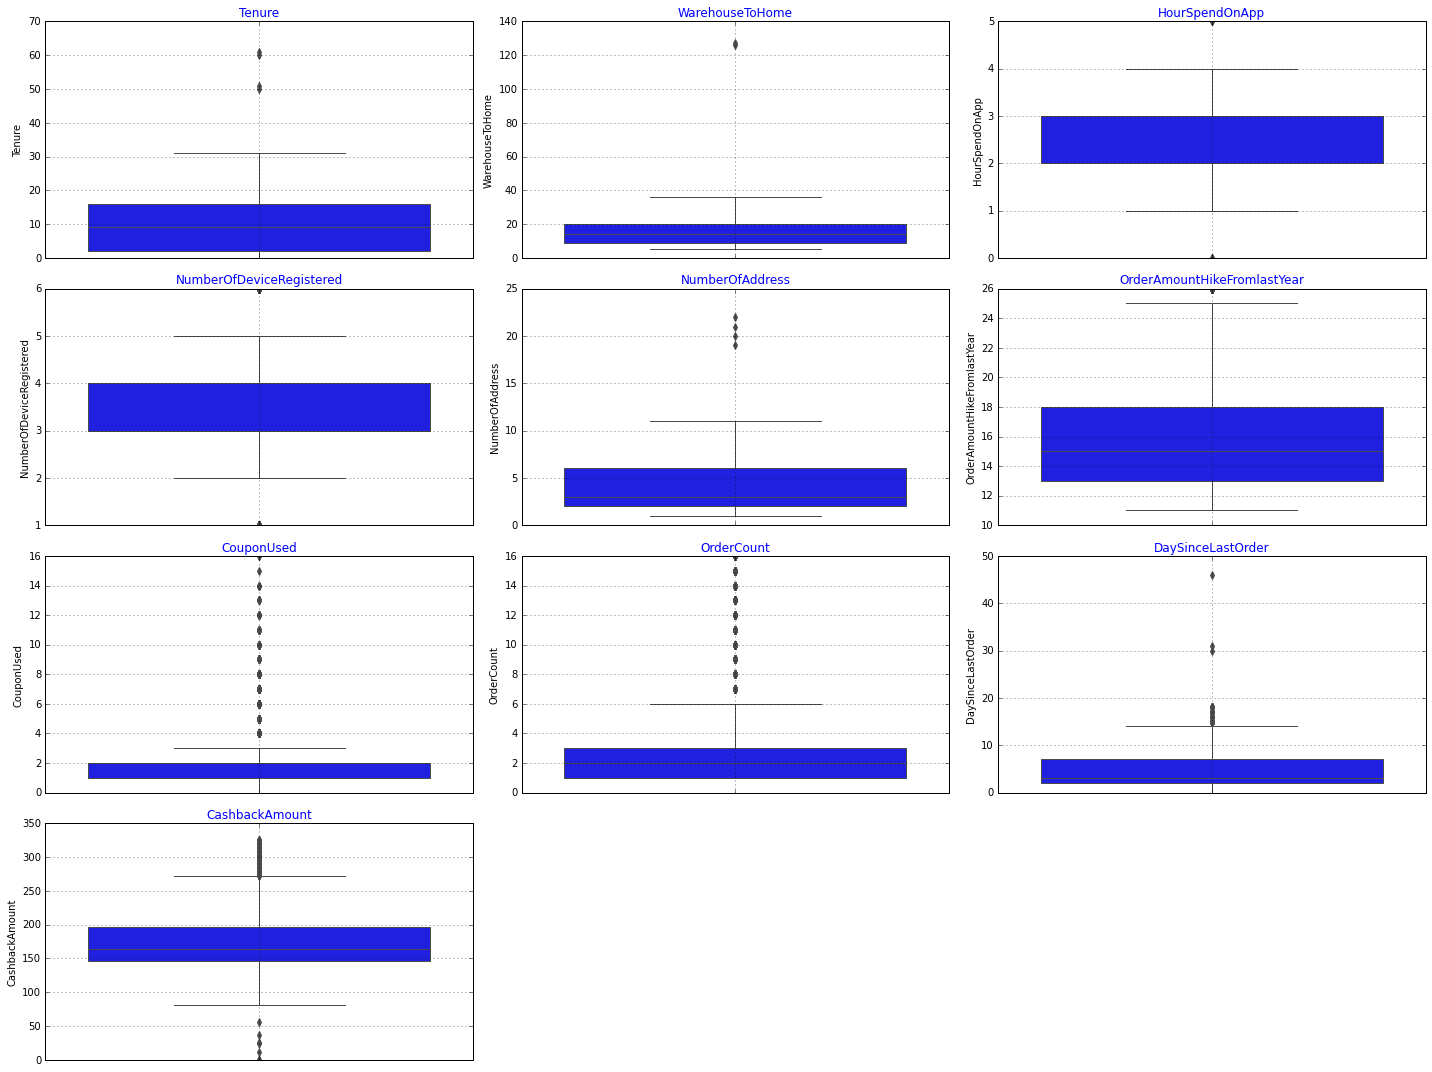

In [23]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

There are not many outliers but there are a few in all variables.

### Imputing missing values

In [24]:
churn['Tenure'] = churn['Tenure'].replace(['0', 0], np.nan)

In [25]:
churn['HourSpendOnApp'] = churn['HourSpendOnApp'].replace(['0', 0], np.nan)

Since all 10 numerical variables ahve outliers I will be trateing the outliers using median 

In [26]:
churn.isnull().sum()/len(churn)

Churn                          0.000000
Tenure                         0.137123
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045826
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

In [27]:
churn.isnull().sum()

Churn                            0
Tenure                         772
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 258
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
my_imputer.fit(churn[['Tenure']])
churn['Tenure']=my_imputer.transform(churn[["Tenure"]]).ravel()

In [29]:
churn.dropna(inplace = True)

In [30]:
churn.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Outliers Treatment

In [31]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    #print(col)
    #print(Q1)
    #print(Q3)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for feature in data_plot: 
    #print("Feature",feature)
    lr,ur=treat_outlier(churn[feature])
    #print("lr",lr)
    #print("ur",ur)
    churn[feature]=np.where(churn[feature]>ur,np.round_(ur),churn[feature])
    churn[feature]=np.where(churn[feature]<lr,np.round_(lr),churn[feature])

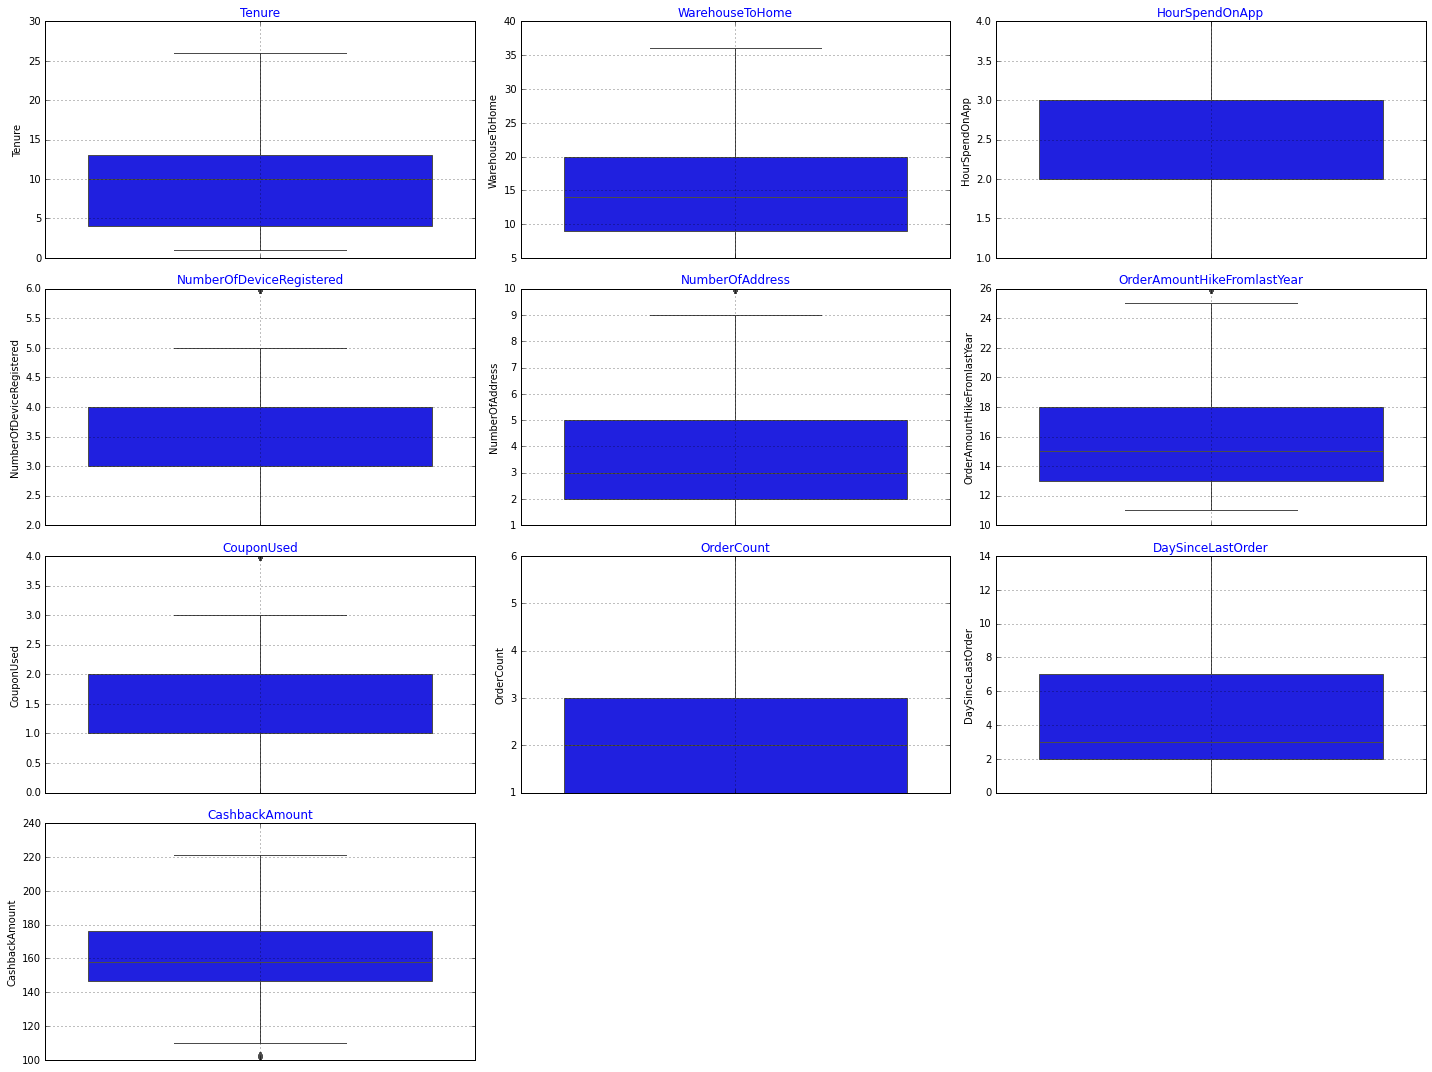

In [33]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

All the outliers are treated now

### Data Cleanining

In [34]:
churn.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [35]:
churn["PreferredLoginDevice"].replace({"Phone": "Mobile Phone"}, inplace=True)

In [36]:
churn.PreferredLoginDevice.value_counts()

Mobile Phone    2845
Computer        1192
Name: PreferredLoginDevice, dtype: int64

In [37]:
churn["PreferedOrderCat"].replace({"Mobile Phone": "Mobile"}, inplace=True)

In [38]:
churn.PreferedOrderCat.value_counts()

Laptop & Accessory    1971
Mobile                1599
Fashion                443
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64

In [39]:
churn.PreferredPaymentMode.value_counts()

Debit Card          1643
Credit Card         1132
E wallet             456
COD                  311
UPI                  308
CC                   115
Cash on Delivery      72
Name: PreferredPaymentMode, dtype: int64

In [40]:
churn["PreferredPaymentMode"].replace({"Cash on Delivery": "COD","Credit Card":"CC"}, inplace=True)

In [41]:
churn.PreferredPaymentMode.value_counts()

Debit Card    1643
CC            1247
E wallet       456
COD            383
UPI            308
Name: PreferredPaymentMode, dtype: int64

In [42]:
churn.SatisfactionScore.value_counts()

3    1221
1     837
5     799
4     765
2     415
Name: SatisfactionScore, dtype: int64

In [43]:
churn.CouponUsed.value_counts()

1.0    1643
2.0    1028
0.0     733
4.0     401
3.0     232
Name: CouponUsed, dtype: int64

### Univariate Analysis

In [44]:
churn.skew()

Churn                          1.698889
Tenure                         0.701011
WarehouseToHome                0.890269
HourSpendOnApp                -0.029766
NumberOfDeviceRegistered       0.067574
SatisfactionScore             -0.143233
NumberOfAddress                0.979950
Complain                       0.972620
OrderAmountHikeFromlastYear    0.814040
CouponUsed                     0.768223
OrderCount                     1.247462
DaySinceLastOrder              0.707823
CashbackAmount                 0.207467
dtype: float64

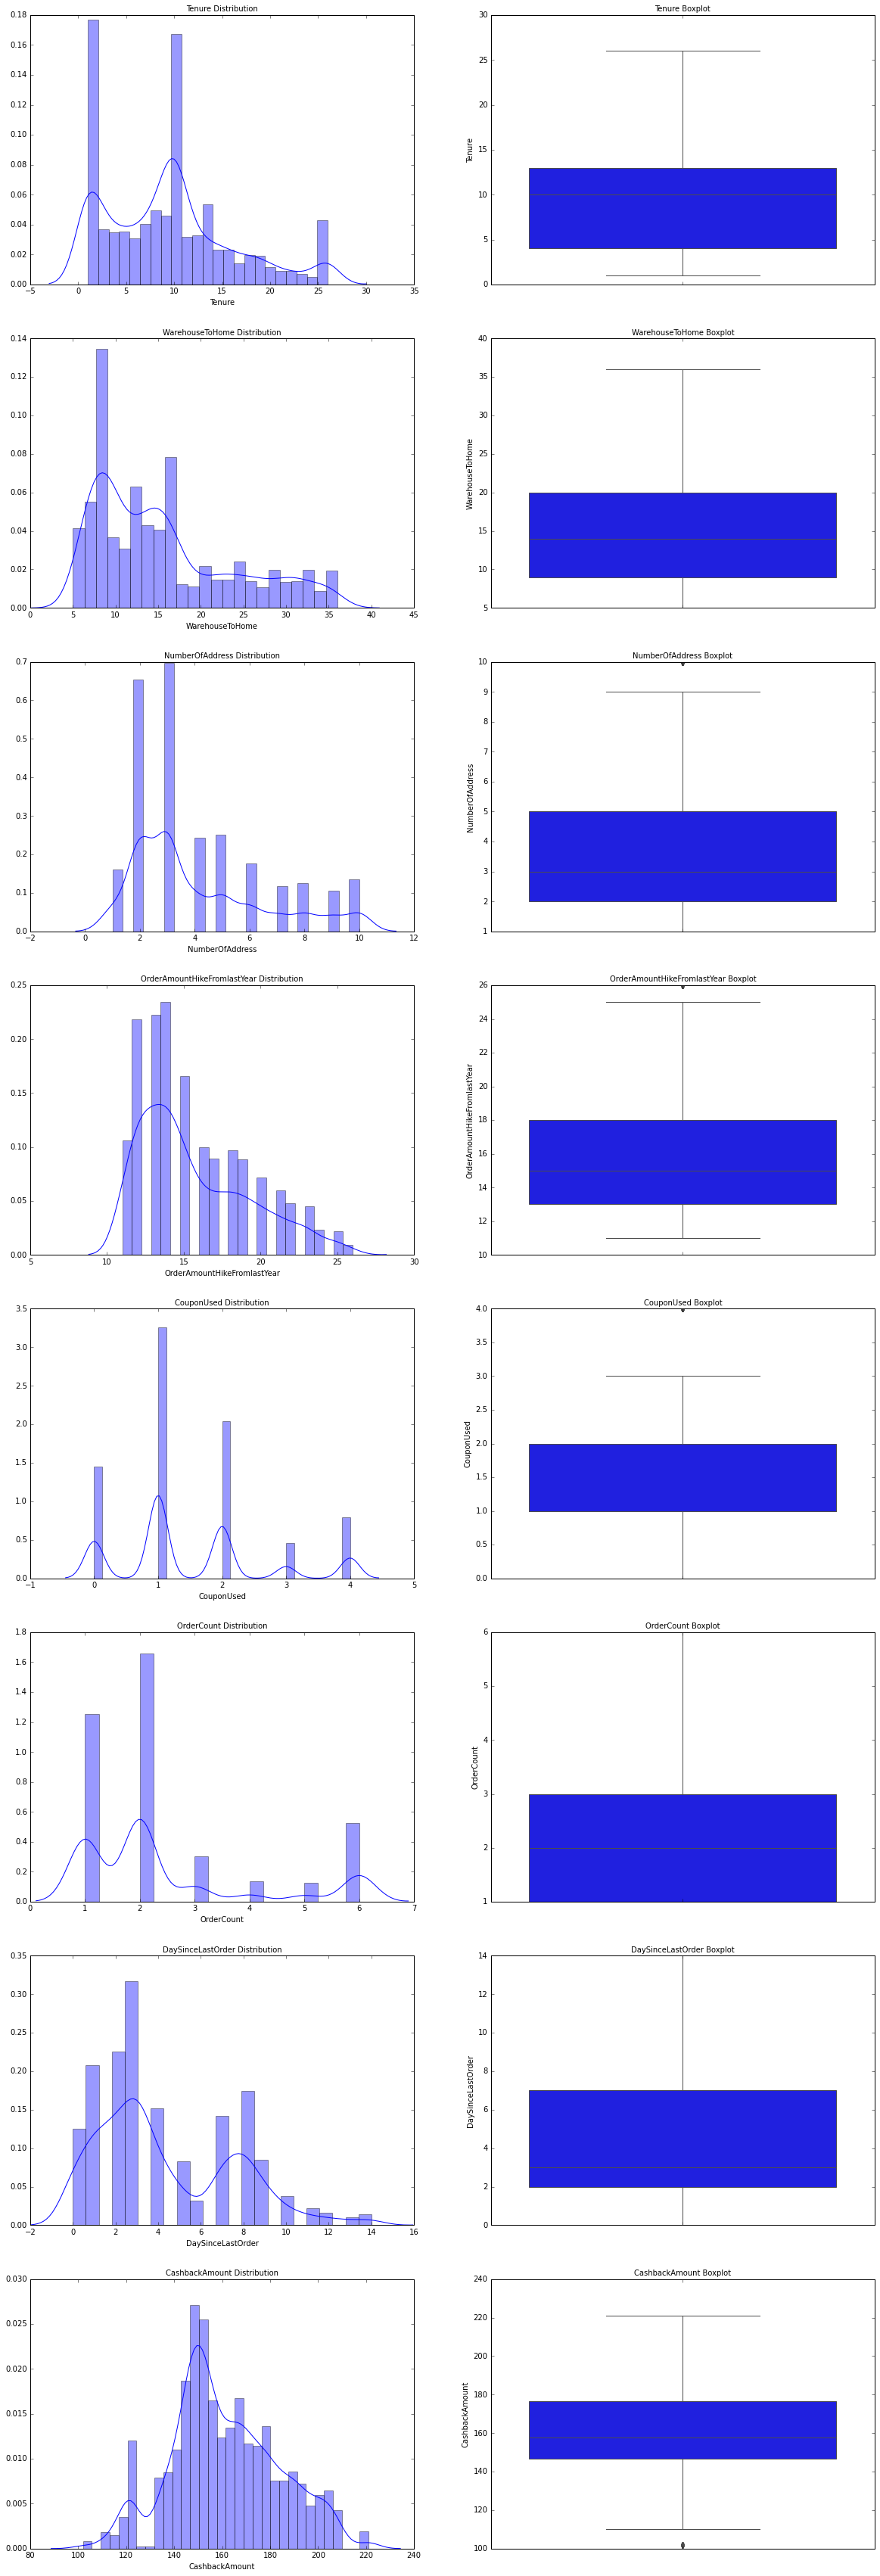

In [45]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,60)

a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)

a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(churn['WarehouseToHome'] , ax=axes[1][0])
a.set_title("WarehouseToHome Distribution",fontsize=10)

a = sns.boxplot(churn['WarehouseToHome'] , orient = "v" , ax=axes[1][1])
a.set_title("WarehouseToHome Boxplot",fontsize=10)

a = sns.distplot(churn['NumberOfAddress'] , ax=axes[2][0])
a.set_title("NumberOfAddress Distribution",fontsize=10)

a = sns.boxplot(churn['NumberOfAddress'] , orient = "v" , ax=axes[2][1])
a.set_title("NumberOfAddress Boxplot",fontsize=10)

a = sns.distplot(churn['OrderAmountHikeFromlastYear'] , ax=axes[3][0])
a.set_title("OrderAmountHikeFromlastYear Distribution",fontsize=10)

a = sns.boxplot(churn['OrderAmountHikeFromlastYear'] , orient = "v" , ax=axes[3][1])
a.set_title("OrderAmountHikeFromlastYear Boxplot",fontsize=10)

a = sns.distplot(churn['CouponUsed'] , ax=axes[4][0])
a.set_title("CouponUsed Distribution",fontsize=10)

a = sns.boxplot(churn['CouponUsed'] , orient = "v" , ax=axes[4][1])
a.set_title("CouponUsed Boxplot",fontsize=10)


a = sns.distplot(churn['OrderCount'] , ax=axes[5][0])
a.set_title("OrderCount Distribution",fontsize=10)

a = sns.boxplot(churn['OrderCount'] , orient = "v" , ax=axes[5][1])
a.set_title("OrderCount Boxplot",fontsize=10)


a = sns.distplot(churn['DaySinceLastOrder'] , ax=axes[6][0])
a.set_title("DaySinceLastOrder Distribution",fontsize=10)

a = sns.boxplot(churn['DaySinceLastOrder'] , orient = "v" , ax=axes[6][1])
a.set_title("DaySinceLastOrder Boxplot",fontsize=10)

a = sns.distplot(churn['CashbackAmount'] , ax=axes[7][0])
a.set_title("CashbackAmount Distribution",fontsize=10)

a = sns.boxplot(churn['CashbackAmount'] , orient = "v" , ax=axes[7][1])
a.set_title("CashbackAmount Boxplot",fontsize=10)

plt.show()

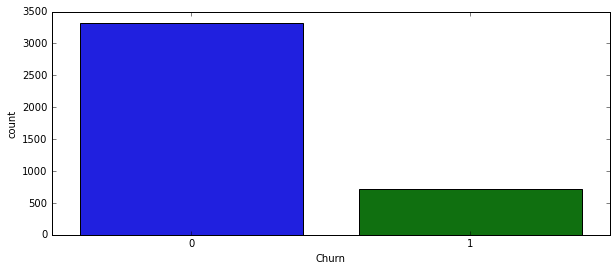

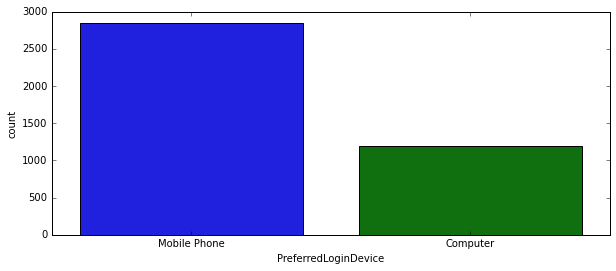

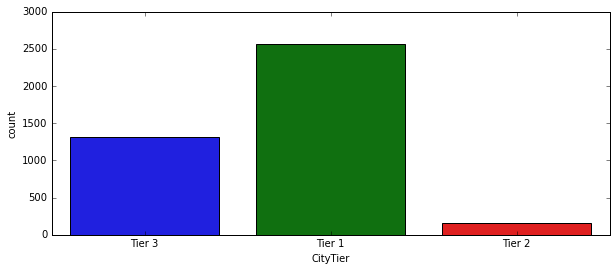

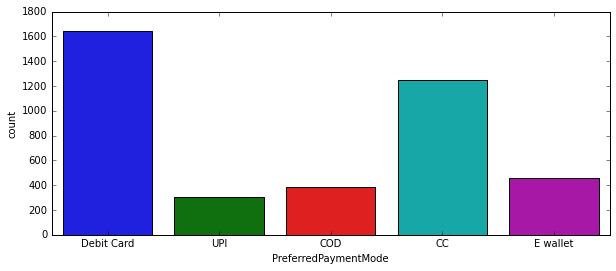

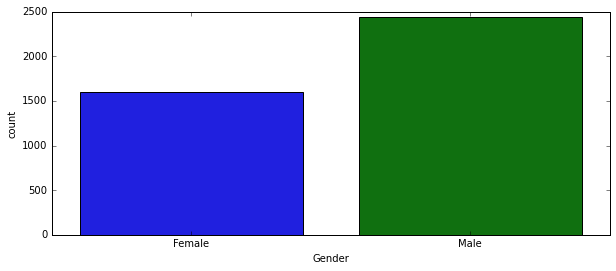

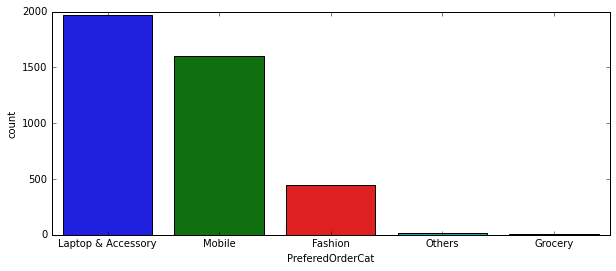

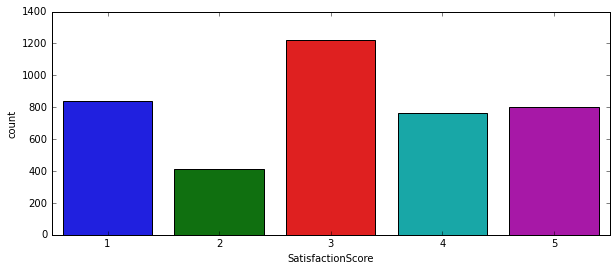

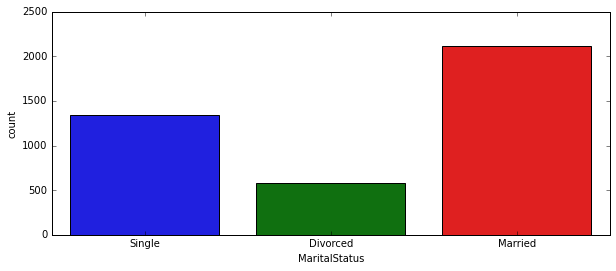

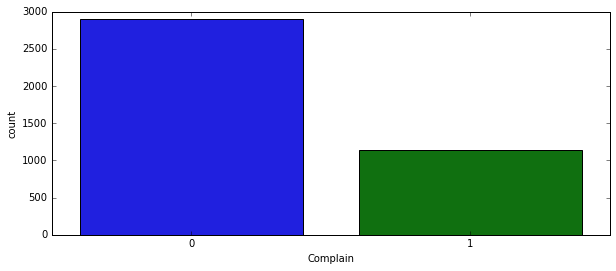

In [46]:
for column in churn[cat].columns:
    plt.figure(figsize=(10,4))
    sns.countplot(churn[column])
    plt.show()

### Bivariate Analysis

### Continous Variable with Target Variable

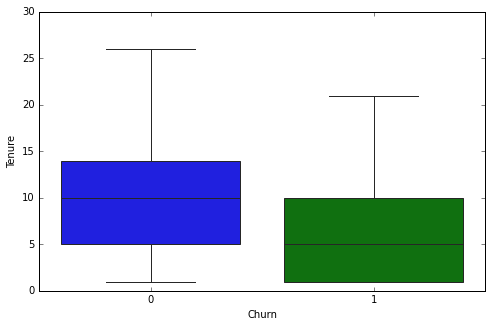

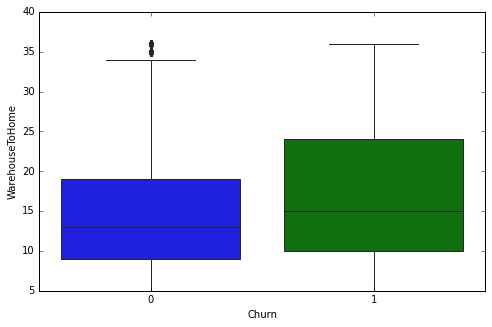

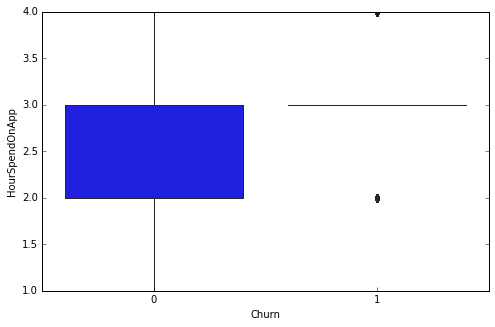

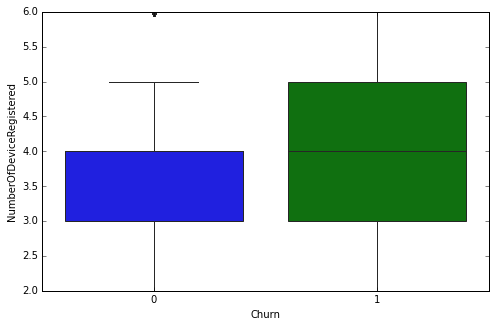

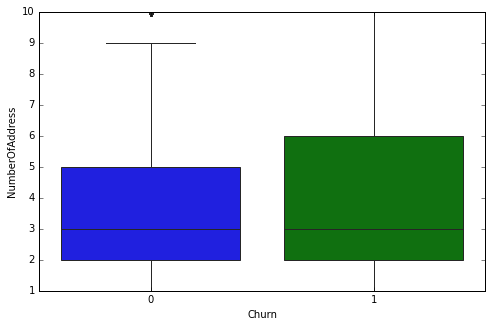

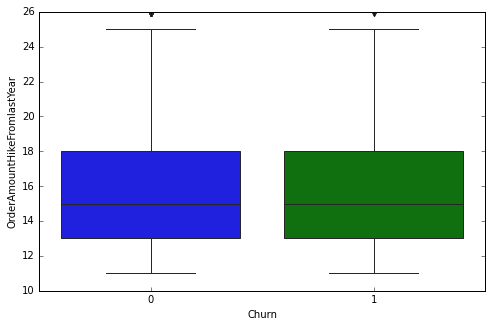

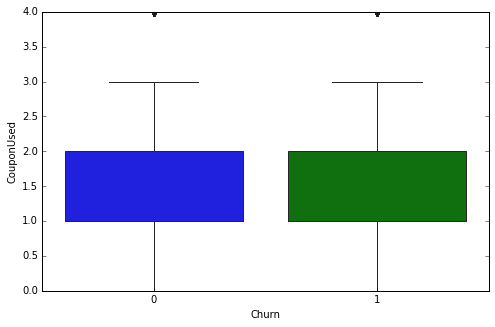

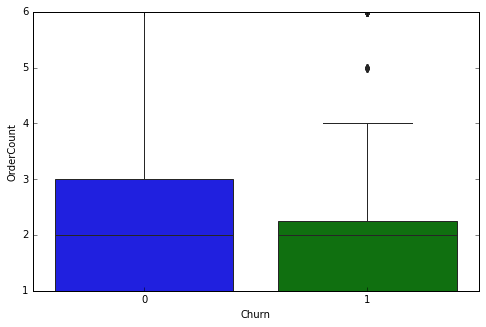

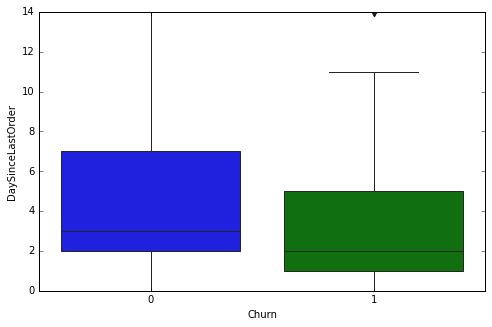

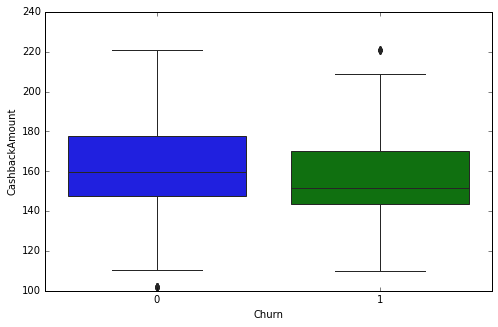

In [47]:
for column in churn[num].columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(churn["Churn"], churn[column]) 
    plt.show()

### Categorical Variable with Target Variable

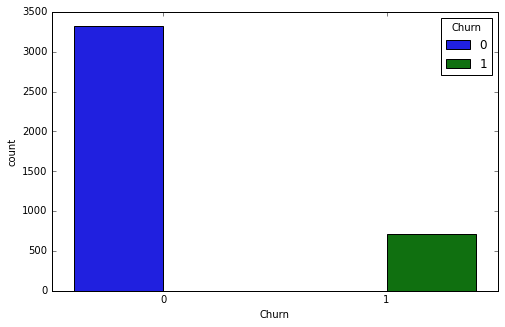

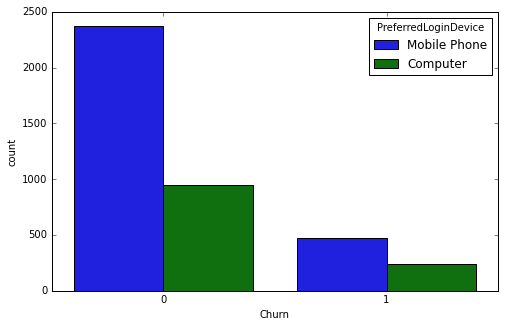

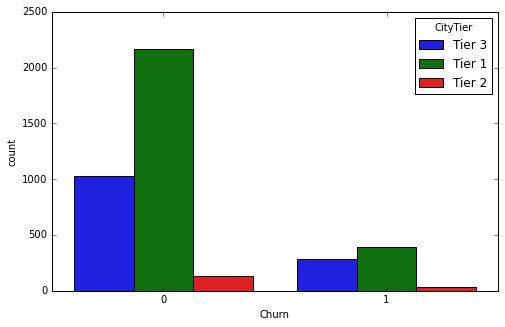

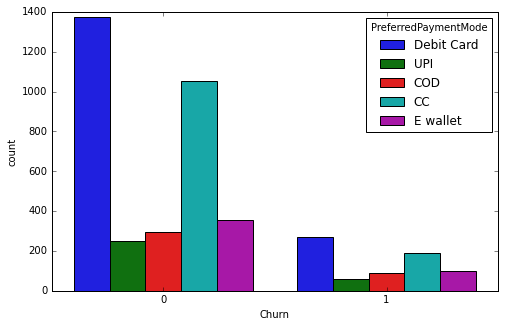

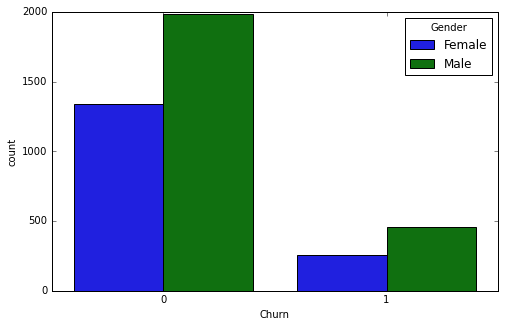

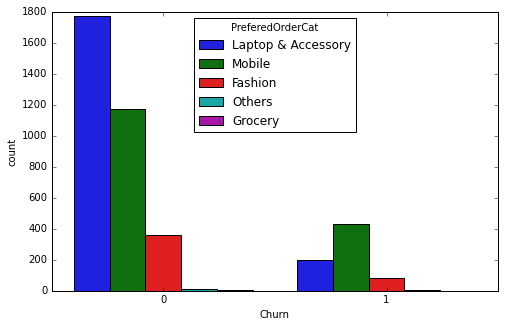

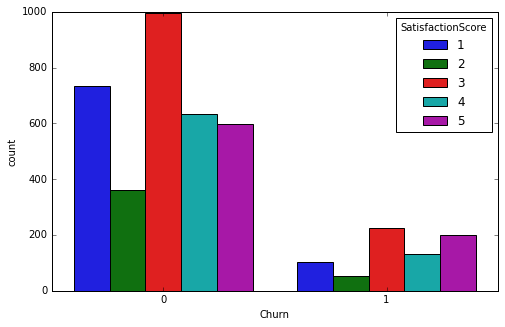

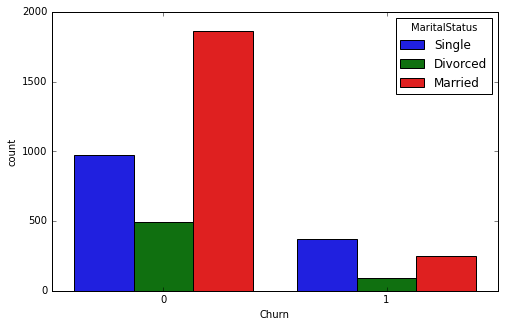

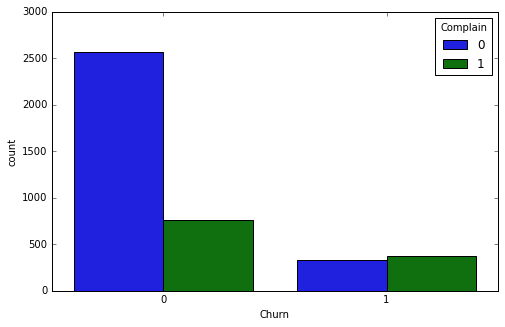

In [48]:
for column in churn[cat].columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x="Churn", hue=churn[column], data=churn)
    plt.show()

### Between Two Continous Variables

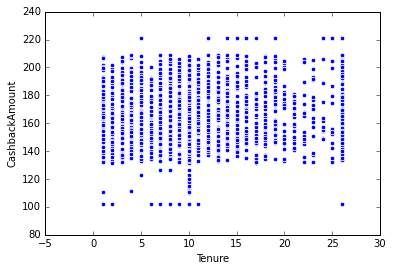

In [49]:
sns.scatterplot(data=churn, x="Tenure", y="CashbackAmount")

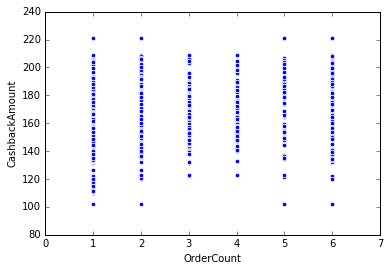

In [50]:
sns.scatterplot(data=churn, x="OrderCount", y="CashbackAmount")

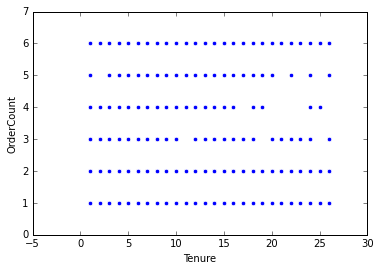

In [51]:
sns.scatterplot(data=churn, x="Tenure", y="OrderCount")

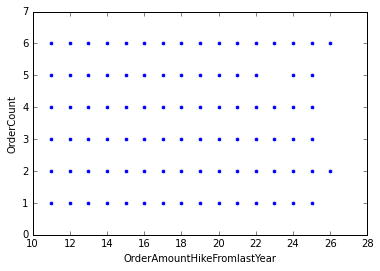

In [52]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="OrderCount")

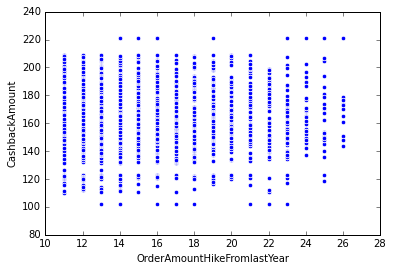

In [53]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="CashbackAmount")

### Between Categorical and Continous Variable

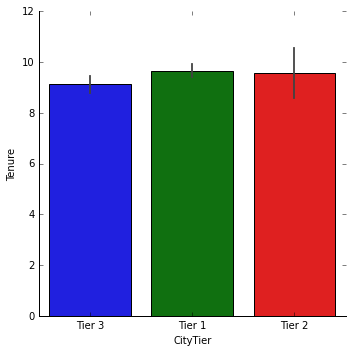

In [54]:
sns.catplot(x="CityTier", y="Tenure", data=churn,kind="bar")

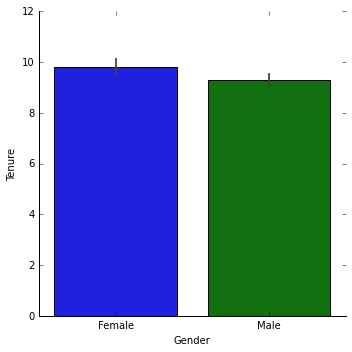

In [55]:
sns.catplot(x="Gender", y="Tenure", data=churn,kind="bar")

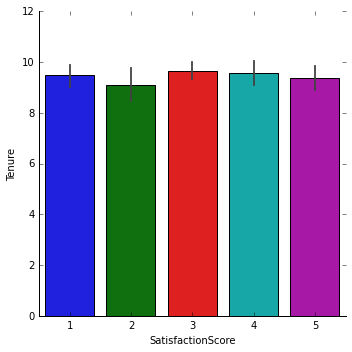

In [56]:
sns.catplot(x="SatisfactionScore", y="Tenure", data=churn,kind="bar")

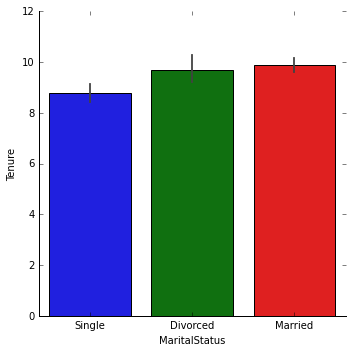

In [57]:
sns.catplot(x="MaritalStatus", y="Tenure", data=churn,kind="bar")

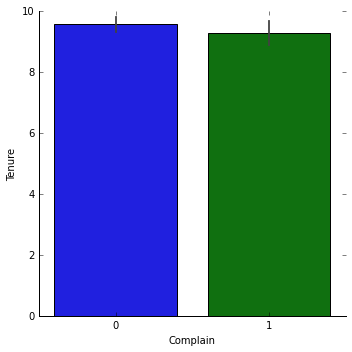

In [58]:
sns.catplot(x="Complain", y="Tenure", data=churn,kind="bar")

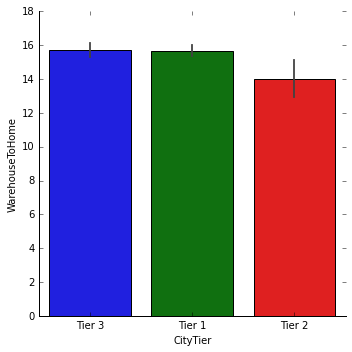

In [59]:
sns.catplot(x="CityTier", y="WarehouseToHome", data=churn,kind="bar")

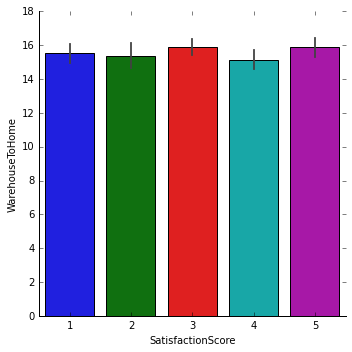

In [60]:
sns.catplot(x="SatisfactionScore", y="WarehouseToHome", data=churn,kind="bar")

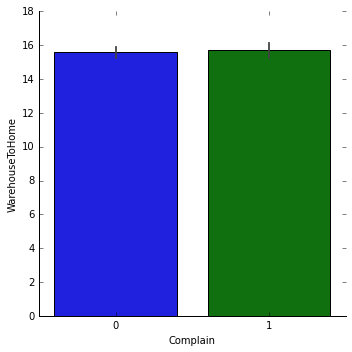

In [61]:
sns.catplot(x="Complain", y="WarehouseToHome", data=churn,kind="bar")

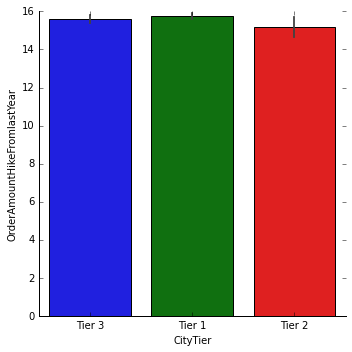

In [62]:
sns.catplot(x="CityTier", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

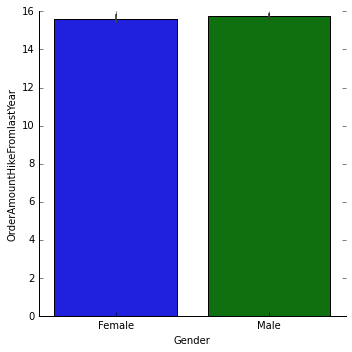

In [63]:
sns.catplot(x="Gender", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

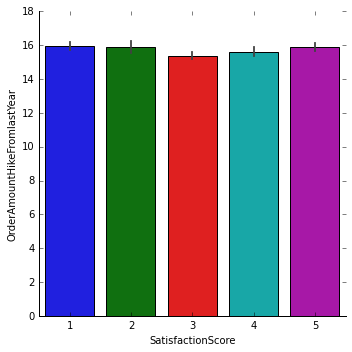

In [64]:
sns.catplot(x="SatisfactionScore", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

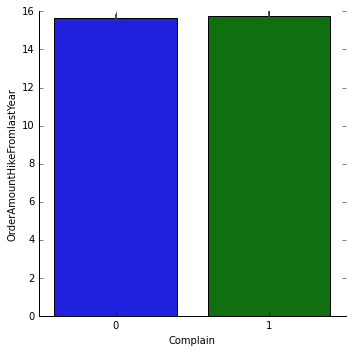

In [65]:
sns.catplot(x="Complain", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

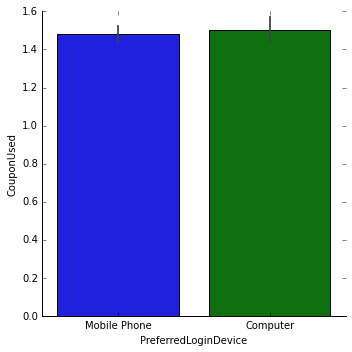

In [66]:
sns.catplot(x="PreferredLoginDevice", y="CouponUsed", data=churn,kind="bar")

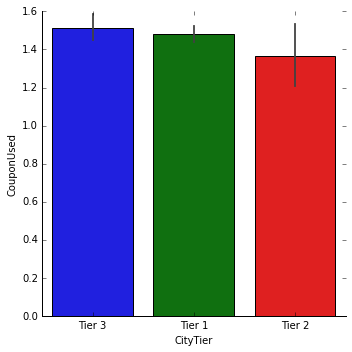

In [67]:
sns.catplot(x="CityTier", y="CouponUsed", data=churn,kind="bar")

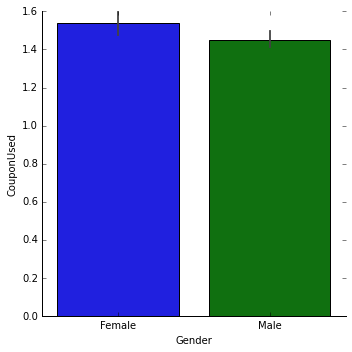

In [68]:
sns.catplot(x="Gender", y="CouponUsed", data=churn,kind="bar")

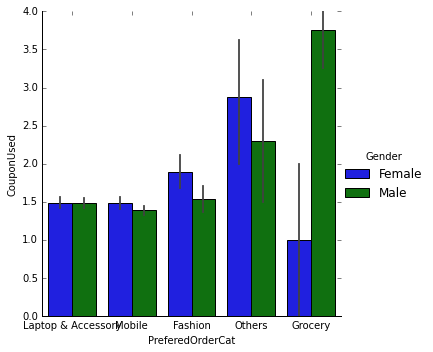

In [69]:
sns.catplot(x="PreferedOrderCat", y="CouponUsed", data=churn,kind="bar", hue="Gender")

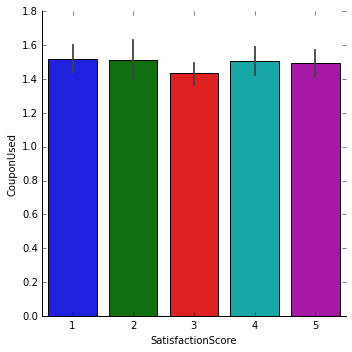

In [70]:
sns.catplot(x="SatisfactionScore", y="CouponUsed", data=churn,kind="bar")

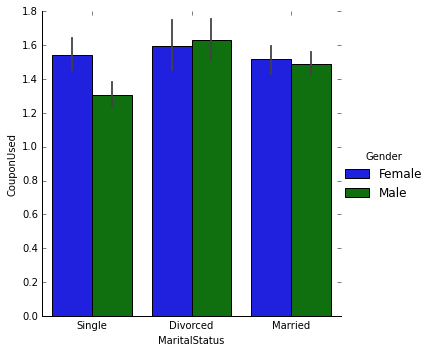

In [71]:
sns.catplot(x="MaritalStatus", y="CouponUsed", data=churn,kind="bar",hue="Gender")

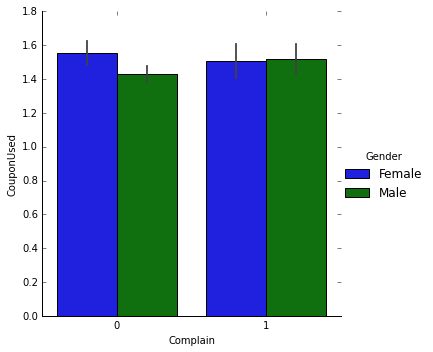

In [72]:
sns.catplot(x="Complain", y="CouponUsed", data=churn,kind="bar",hue="Gender")

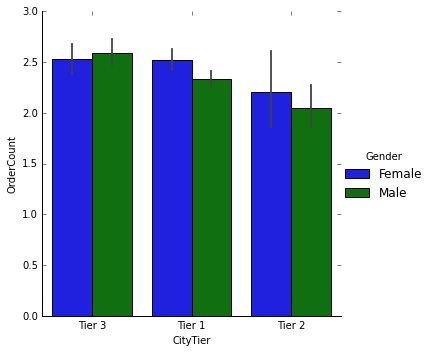

In [73]:
sns.catplot(x="CityTier", y="OrderCount", data=churn,kind="bar",hue="Gender")

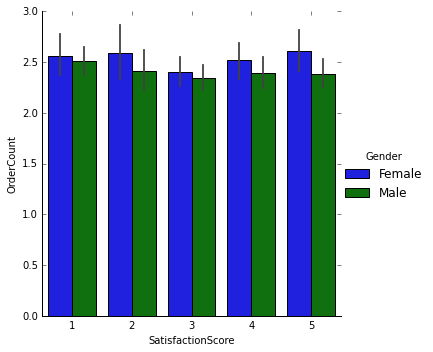

In [74]:
sns.catplot(x="SatisfactionScore", y="OrderCount", data=churn,kind="bar",hue="Gender")

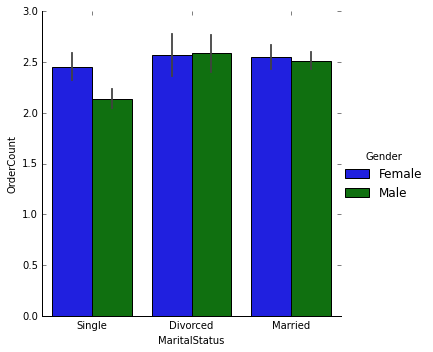

In [75]:
sns.catplot(x="MaritalStatus", y="OrderCount", data=churn,kind="bar",hue="Gender")

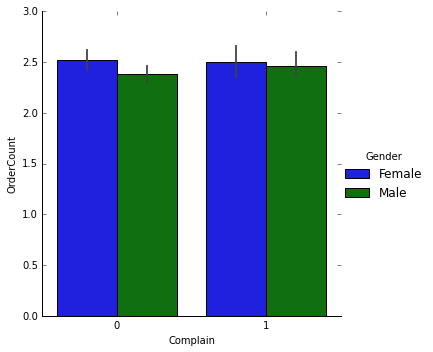

In [76]:
sns.catplot(x="Complain", y="OrderCount", data=churn,kind="bar",hue="Gender")

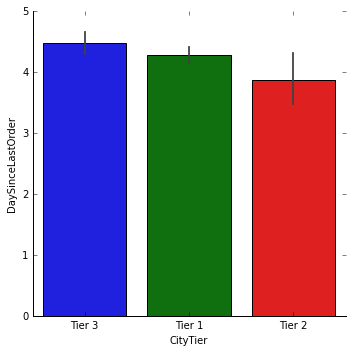

In [77]:
sns.catplot(x="CityTier", y="DaySinceLastOrder", data=churn,kind="bar")

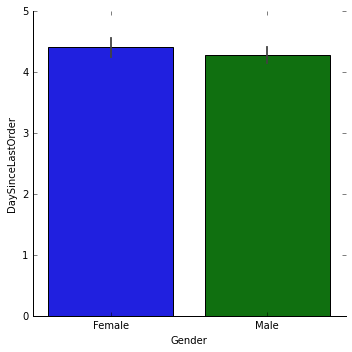

In [78]:
sns.catplot(x="Gender", y="DaySinceLastOrder", data=churn,kind="bar")

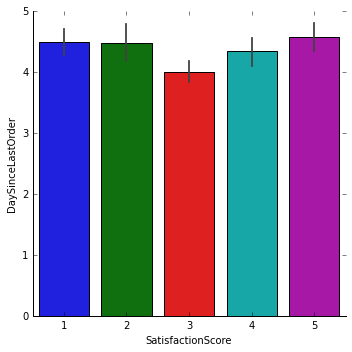

In [79]:
sns.catplot(x="SatisfactionScore", y="DaySinceLastOrder", data=churn,kind="bar")

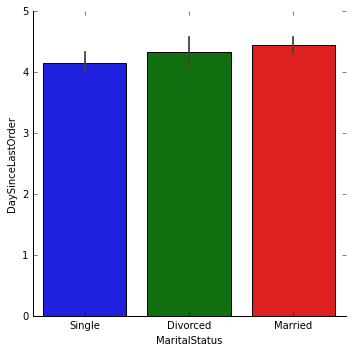

In [80]:
sns.catplot(x="MaritalStatus", y="DaySinceLastOrder", data=churn,kind="bar")

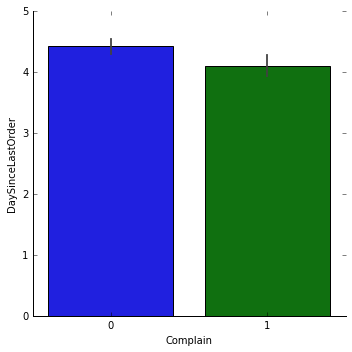

In [81]:
sns.catplot(x="Complain", y="DaySinceLastOrder", data=churn,kind="bar")

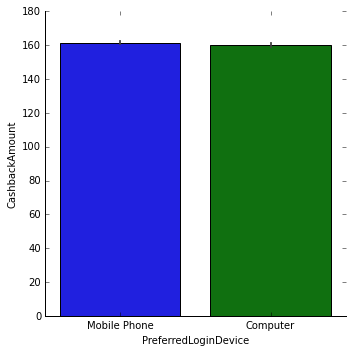

In [82]:
sns.catplot(x="PreferredLoginDevice", y="CashbackAmount", data=churn,kind="bar")

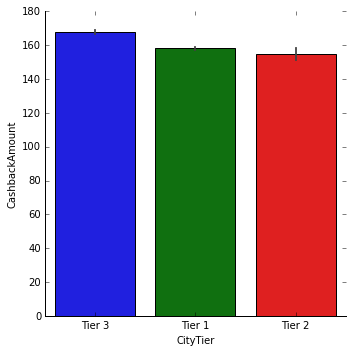

In [83]:
sns.catplot(x="CityTier", y="CashbackAmount", data=churn,kind="bar")

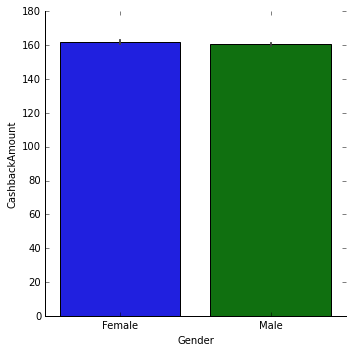

In [84]:
sns.catplot(x="Gender", y="CashbackAmount", data=churn,kind="bar")

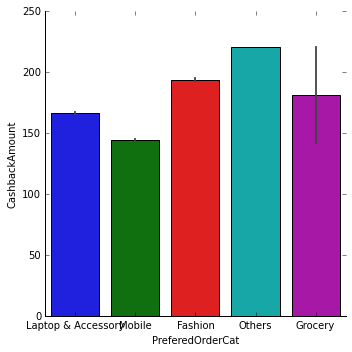

In [85]:
sns.catplot(x="PreferedOrderCat", y="CashbackAmount", data=churn,kind="bar")

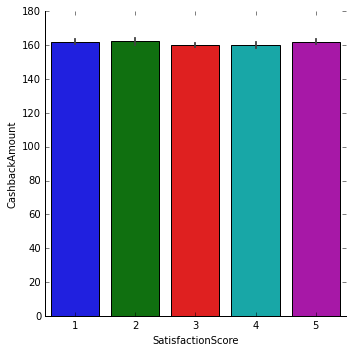

In [86]:
sns.catplot(x="SatisfactionScore", y="CashbackAmount", data=churn,kind="bar")

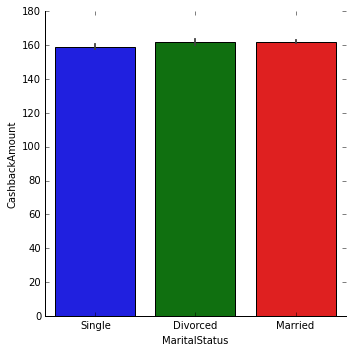

In [87]:
sns.catplot(x="MaritalStatus", y="CashbackAmount", data=churn,kind="bar")

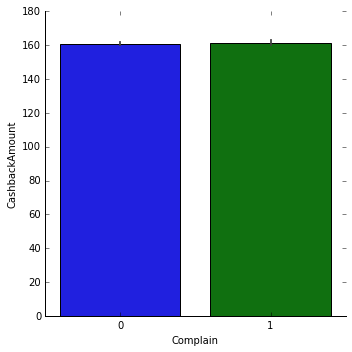

In [88]:
sns.catplot(x="Complain", y="CashbackAmount", data=churn,kind="bar")

### Between Two Categorical Variables

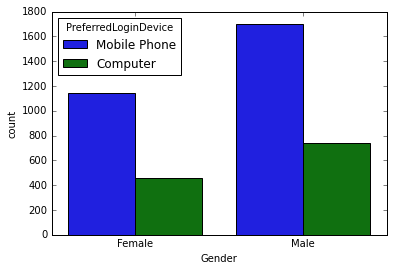

In [89]:
sns.countplot(x="Gender", hue="PreferredLoginDevice", data=churn)

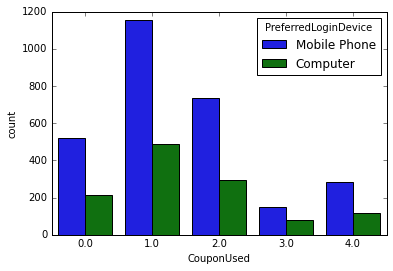

In [90]:
sns.countplot(x="CouponUsed", hue="PreferredLoginDevice", data=churn)

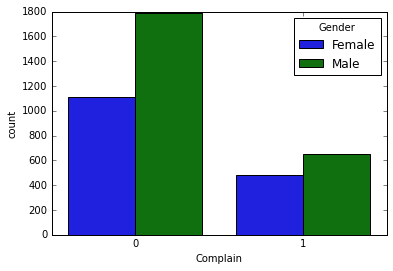

In [91]:
sns.countplot(x="Complain", hue="Gender", data=churn)

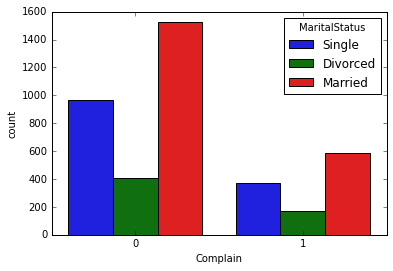

In [92]:
sns.countplot(x="Complain", hue="MaritalStatus", data=churn)

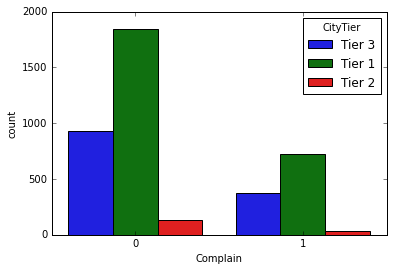

In [93]:
sns.countplot(x="Complain", hue="CityTier", data=churn)

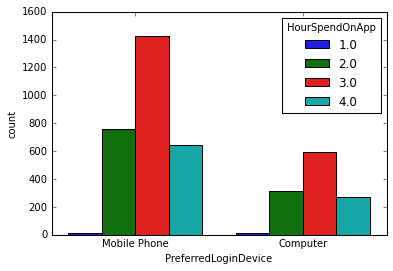

In [94]:
sns.countplot(x="PreferredLoginDevice", hue="HourSpendOnApp", data=churn)

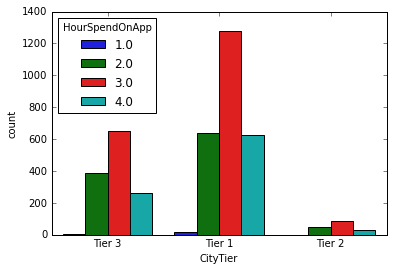

In [95]:
sns.countplot(x="CityTier", hue="HourSpendOnApp", data=churn)

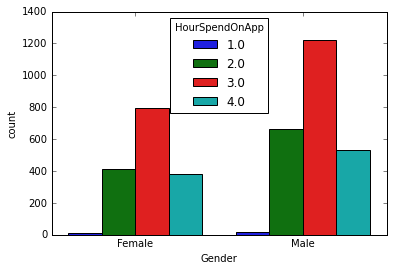

In [96]:
sns.countplot(x="Gender", hue="HourSpendOnApp", data=churn)

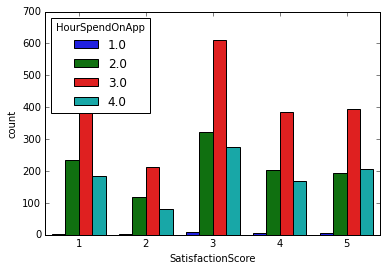

In [97]:
sns.countplot(x="SatisfactionScore", hue="HourSpendOnApp", data=churn)

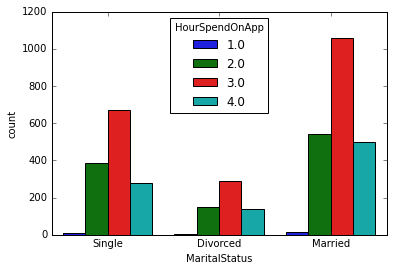

In [98]:
sns.countplot(x="MaritalStatus", hue="HourSpendOnApp", data=churn)

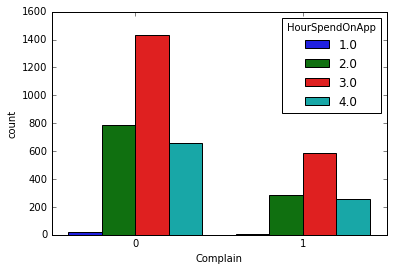

In [99]:
sns.countplot(x="Complain", hue="HourSpendOnApp", data=churn)

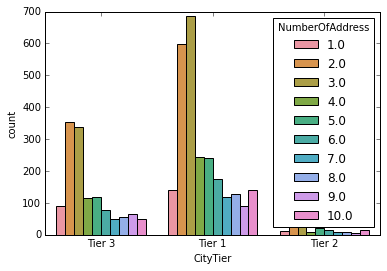

In [100]:
sns.countplot(x="CityTier", hue="NumberOfAddress", data=churn)

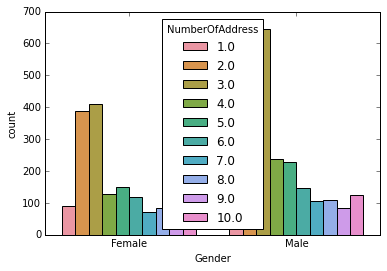

In [101]:
sns.countplot(x="Gender", hue="NumberOfAddress", data=churn)

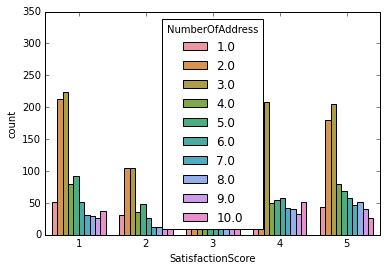

In [102]:
sns.countplot(x="SatisfactionScore", hue="NumberOfAddress", data=churn)

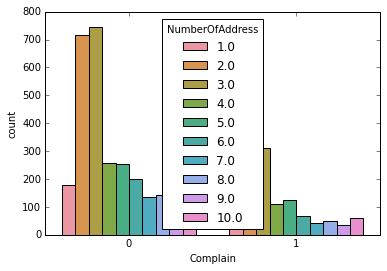

In [103]:
sns.countplot(x="Complain", hue="NumberOfAddress", data=churn)

In [104]:
#This DF will be used for cluster analysis later
churn_cluster_df = churn.copy()
churn_cluster_df.shape

(4037, 19)

In [105]:
churn_cluster_df.head(2)

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0     1     4.0         Mobile Phone   Tier 3              6.0   
1     1    10.0         Mobile Phone   Tier 1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                       3.0   
1                  UPI    Male             3.0                       4.0   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single              9.0   
1              Mobile                 3        Single              7.0   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [106]:
churn_cluster_df.to_excel('clustered_data.xlsx',index=False)

### Encoding Categorical Variables

In [109]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
churn.SatisfactionScore = le.fit_transform(churn.SatisfactionScore)
churn.Complain = le.fit_transform(churn.Complain)

In [110]:
PreferredLoginDevice = pd.get_dummies(churn.PreferredLoginDevice,drop_first=True)
PreferredPaymentMode = pd.get_dummies(churn.PreferredPaymentMode,drop_first=True)
PreferedOrderCat = pd.get_dummies(churn.PreferedOrderCat,drop_first=True)
MaritalStatus = pd.get_dummies(churn.MaritalStatus,drop_first=True)
Gender = pd.get_dummies(churn.Gender,drop_first=True)
CityTier = pd.get_dummies(churn.CityTier,drop_first=True)

In [111]:
churn = churn.drop(['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender','CityTier'],axis=1)

In [112]:
churn = pd.concat((churn,PreferredLoginDevice),axis=1)
churn = pd.concat((churn,PreferredPaymentMode),axis=1)
churn = pd.concat((churn,PreferedOrderCat),axis=1)
churn = pd.concat((churn,MaritalStatus),axis=1)
churn = pd.concat((churn,Gender),axis=1)
churn = pd.concat((churn,CityTier),axis=1)

In [113]:
churn.columns

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'COD',
       'Debit Card', 'E wallet', 'UPI', 'Grocery', 'Laptop & Accessory',
       'Mobile', 'Others', 'Married', 'Single', 'Male', 'Tier 2', 'Tier 3'],
      dtype='object')

In [114]:
churn["Churn"] = churn["Churn"].astype(int)

churn.columns = churn.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')

In [115]:
churn.head()

Churn  Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0      1     4.0              6.0             3.0                       3.0   
1      1    10.0              8.0             3.0                       4.0   
2      1    10.0             30.0             2.0                       4.0   
3      1    10.0             15.0             2.0                       4.0   
5      1    10.0             22.0             3.0                       5.0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1              9.0         1                         11.0   
1                  2              7.0         1                         15.0   
2                  2              6.0         1                         14.0   
3                  4              8.0         0                         23.0   
5                  4              2.0         1                         22.0   

   CouponUsed  ...  UPI  Grocery  Laptop & Accessory  Mobile  Others  Married  \
0         1.0  ...    0        0                   1       0       0        0   
1         0.0  ...    1        0                   0       1       0        0   
2         0.0  ...    0        0                   0       1       0        0   
3         0.0  ...    0        0                   1       0       0        0   
5         4.0  ...    0        0                   0       1       0        0   

   Single  Male  Tier 2  Tier 3  
0       1     0       0       1  
1       1     1       0       0  
2       1     1       0       0  
3       1     1       0       1  
5       1     0       0       0  

[5 rows x 27 columns]

In [116]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        4037 non-null   int32  
 1   Tenure                       4037 non-null   float64
 2   WarehouseToHome              4037 non-null   float64
 3   HourSpendOnApp               4037 non-null   float64
 4   NumberOfDeviceRegistered     4037 non-null   float64
 5   SatisfactionScore            4037 non-null   int32  
 6   NumberOfAddress              4037 non-null   float64
 7   Complain                     4037 non-null   int32  
 8   OrderAmountHikeFromlastYear  4037 non-null   float64
 9   CouponUsed                   4037 non-null   float64
 10  OrderCount                   4037 non-null   float64
 11  DaySinceLastOrder            4037 non-null   float64
 12  CashbackAmount               4037 non-null   float64
 13  Mobile Phone      

### Clustering

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
churn_std = scaler.fit_transform(churn)

1 : 108999.00000000009
2 : 99281.07266562028
3 : 94049.82353611043
4 : 89912.63962115961
5 : 85837.60404579928
6 : 82257.81203816689
7 : 79353.58217701368
8 : 77480.73187545885
9 : 74273.8027791889
10 : 70528.47252791772
11 : 69358.53825306415
12 : 69138.48239621092
13 : 67171.6344243806
14 : 65942.11468598187
15 : 64529.62983359325
16 : 64051.2118888329
17 : 63391.5062402829
18 : 62749.54697193102
19 : 62217.53201099385


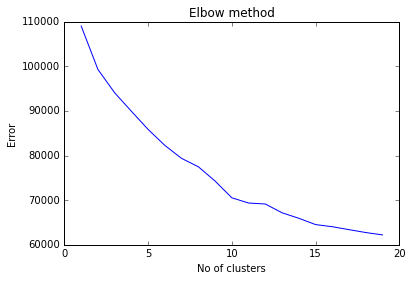

In [118]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(churn_std)
    kmeans.fit(churn_std)
    print("{} : {}".format(i,kmeans.inertia_))
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [2386]:
clt = KMeans(n_clusters=2, random_state=0, n_jobs=-1)
model = clt.fit_predict(churn_std)

In [2387]:
len(model)

4037

In [2388]:
churn_cluster_df['clusterNo'] = model

In [2389]:
churn_cluster_df.head()

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0     1     4.0         Mobile Phone   Tier 3              6.0   
1     1    10.0         Mobile Phone   Tier 1              8.0   
2     1    10.0         Mobile Phone   Tier 1             30.0   
3     1    10.0         Mobile Phone   Tier 3             15.0   
5     1    10.0             Computer   Tier 1             22.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                       3.0   
1                  UPI    Male             3.0                       4.0   
2           Debit Card    Male             2.0                       4.0   
3           Debit Card    Male             2.0                       4.0   
5           Debit Card  Female             3.0                       5.0   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single              9.0   
1              Mobile                 3        Single              7.0   
2              Mobile                 3        Single              6.0   
3  Laptop & Accessory                 5        Single              8.0   
5              Mobile                 5        Single              2.0   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   
2        1                         14.0         0.0         1.0   
3        0                         23.0         0.0         1.0   
5        1                         22.0         4.0         6.0   

   DaySinceLastOrder  CashbackAmount  clusterNo  
0                5.0          159.93          0  
1                0.0          120.90          1  
2                3.0          120.28          1  
3                3.0          134.07          0  
5                7.0          139.19          1

In [2390]:
churn_cluster_df.to_excel('clustered_data_v4.xlsx',index=False)

### Cluster Profiling

In [2391]:
churn_cluster_df.groupby('clusterNo')['PreferredLoginDevice'].value_counts().sort_index()

clusterNo  PreferredLoginDevice
0          Computer                 739
           Mobile Phone            1695
1          Computer                 453
           Mobile Phone            1150
Name: PreferredLoginDevice, dtype: int64

In [2392]:
churn_cluster_df.groupby('clusterNo')['CityTier'].value_counts().sort_index()

clusterNo  CityTier
0          Tier 1      1274
           Tier 2        62
           Tier 3      1098
1          Tier 1      1289
           Tier 2       103
           Tier 3       211
Name: CityTier, dtype: int64

In [2393]:
churn_cluster_df.groupby('clusterNo')['WarehouseToHome'].value_counts().sort_index()

clusterNo  WarehouseToHome
0          5.0                  4
           6.0                146
           7.0                155
           8.0                206
           9.0                220
                             ... 
1          32.0                17
           33.0                12
           34.0                14
           35.0                18
           36.0                12
Name: WarehouseToHome, Length: 64, dtype: int64

In [2394]:
churn_cluster_df.groupby('clusterNo')['PreferredPaymentMode'].value_counts().sort_index()

clusterNo  PreferredPaymentMode
0          CC                      675
           COD                     193
           Debit Card              985
           E wallet                404
           UPI                     177
1          CC                      572
           COD                     190
           Debit Card              658
           E wallet                 52
           UPI                     131
Name: PreferredPaymentMode, dtype: int64

In [2395]:
churn_cluster_df.groupby('clusterNo')['Gender'].value_counts().sort_index()

clusterNo  Gender
0          Female    1013
           Male      1421
1          Female     587
           Male      1016
Name: Gender, dtype: int64

In [2396]:
churn_cluster_df.groupby('clusterNo')['HourSpendOnApp'].value_counts().sort_index()

clusterNo  HourSpendOnApp
0          1.0                 21
           2.0                775
           3.0               1179
           4.0                459
1          1.0                  6
           2.0                299
           3.0                841
           4.0                457
Name: HourSpendOnApp, dtype: int64

In [2397]:
churn_cluster_df.groupby('clusterNo')['NumberOfDeviceRegistered'].value_counts().sort_index()

clusterNo  NumberOfDeviceRegistered
0          2.0                          221
           3.0                          800
           4.0                         1006
           5.0                          337
           6.0                           70
1          2.0                          148
           3.0                          345
           4.0                          742
           5.0                          308
           6.0                           60
Name: NumberOfDeviceRegistered, dtype: int64

In [2398]:
churn_cluster_df.groupby('clusterNo')['PreferedOrderCat'].value_counts().sort_index()

clusterNo  PreferedOrderCat  
0          Fashion                438
           Grocery                  6
           Laptop & Accessory    1969
           Mobile                   3
           Others                  18
1          Fashion                  5
           Laptop & Accessory       2
           Mobile                1596
Name: PreferedOrderCat, dtype: int64

In [2399]:
churn_cluster_df.groupby('clusterNo')['SatisfactionScore'].value_counts().sort_index()

clusterNo  SatisfactionScore
0          1                    524
           2                    252
           3                    732
           4                    439
           5                    487
1          1                    313
           2                    163
           3                    489
           4                    326
           5                    312
Name: SatisfactionScore, dtype: int64

In [2400]:
churn_cluster_df.groupby('clusterNo')['MaritalStatus'].value_counts().sort_index()

clusterNo  MaritalStatus
0          Divorced          356
           Married          1344
           Single            734
1          Divorced          228
           Married           767
           Single            608
Name: MaritalStatus, dtype: int64

In [2401]:
churn_cluster_df.groupby('clusterNo')['NumberOfAddress'].value_counts().sort_index()

clusterNo  NumberOfAddress
0          1.0                166
           2.0                571
           3.0                523
           4.0                266
           5.0                258
           6.0                175
           7.0                113
           8.0                118
           9.0                115
           10.0               129
1          1.0                 76
           2.0                420
           3.0                534
           4.0                101
           5.0                121
           6.0                 92
           7.0                 64
           8.0                 73
           9.0                 46
           10.0                76
Name: NumberOfAddress, dtype: int64

In [2402]:
churn_cluster_df.groupby('clusterNo')['Complain'].value_counts().sort_index()

clusterNo  Complain
0          0           1763
           1            671
1          0           1138
           1            465
Name: Complain, dtype: int64

In [2403]:
churn_cluster_df.groupby('clusterNo')['CouponUsed'].value_counts().sort_index()

clusterNo  CouponUsed
0          0.0           497
           1.0           938
           2.0           528
           3.0           147
           4.0           324
1          0.0           236
           1.0           705
           2.0           500
           3.0            85
           4.0            77
Name: CouponUsed, dtype: int64

In [2404]:
#churn_cluster_df.groupby('clusterNo')['Order_Volume'].value_counts().sort_index()

In [2405]:
churn_cluster_df.clusterNo.value_counts().sort_index()

0    2434
1    1603
Name: clusterNo, dtype: int64

In [2406]:
clust_profile=churn_cluster_df.groupby('clusterNo').mean()
clust_profile['freq']=churn_cluster_df.clusterNo.value_counts().sort_index()
clust_profile

Tenure  WarehouseToHome  HourSpendOnApp  \
clusterNo                                               
0          10.674199        15.957683        2.852917   
1           7.702433        15.102308        3.091079   

           NumberOfDeviceRegistered  NumberOfAddress  \
clusterNo                                              
0                          3.685703         4.248562   
1                          3.867124         3.920774   

           OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
clusterNo                                                        
0                            15.576007    1.532868    2.631060   
1                            15.862133    1.414847    2.172177   

           DaySinceLastOrder  CashbackAmount  freq  
clusterNo                                           
0                   5.127362      172.055345  2434  
1                   3.129757      144.410212  1603

### Checking for Correlations

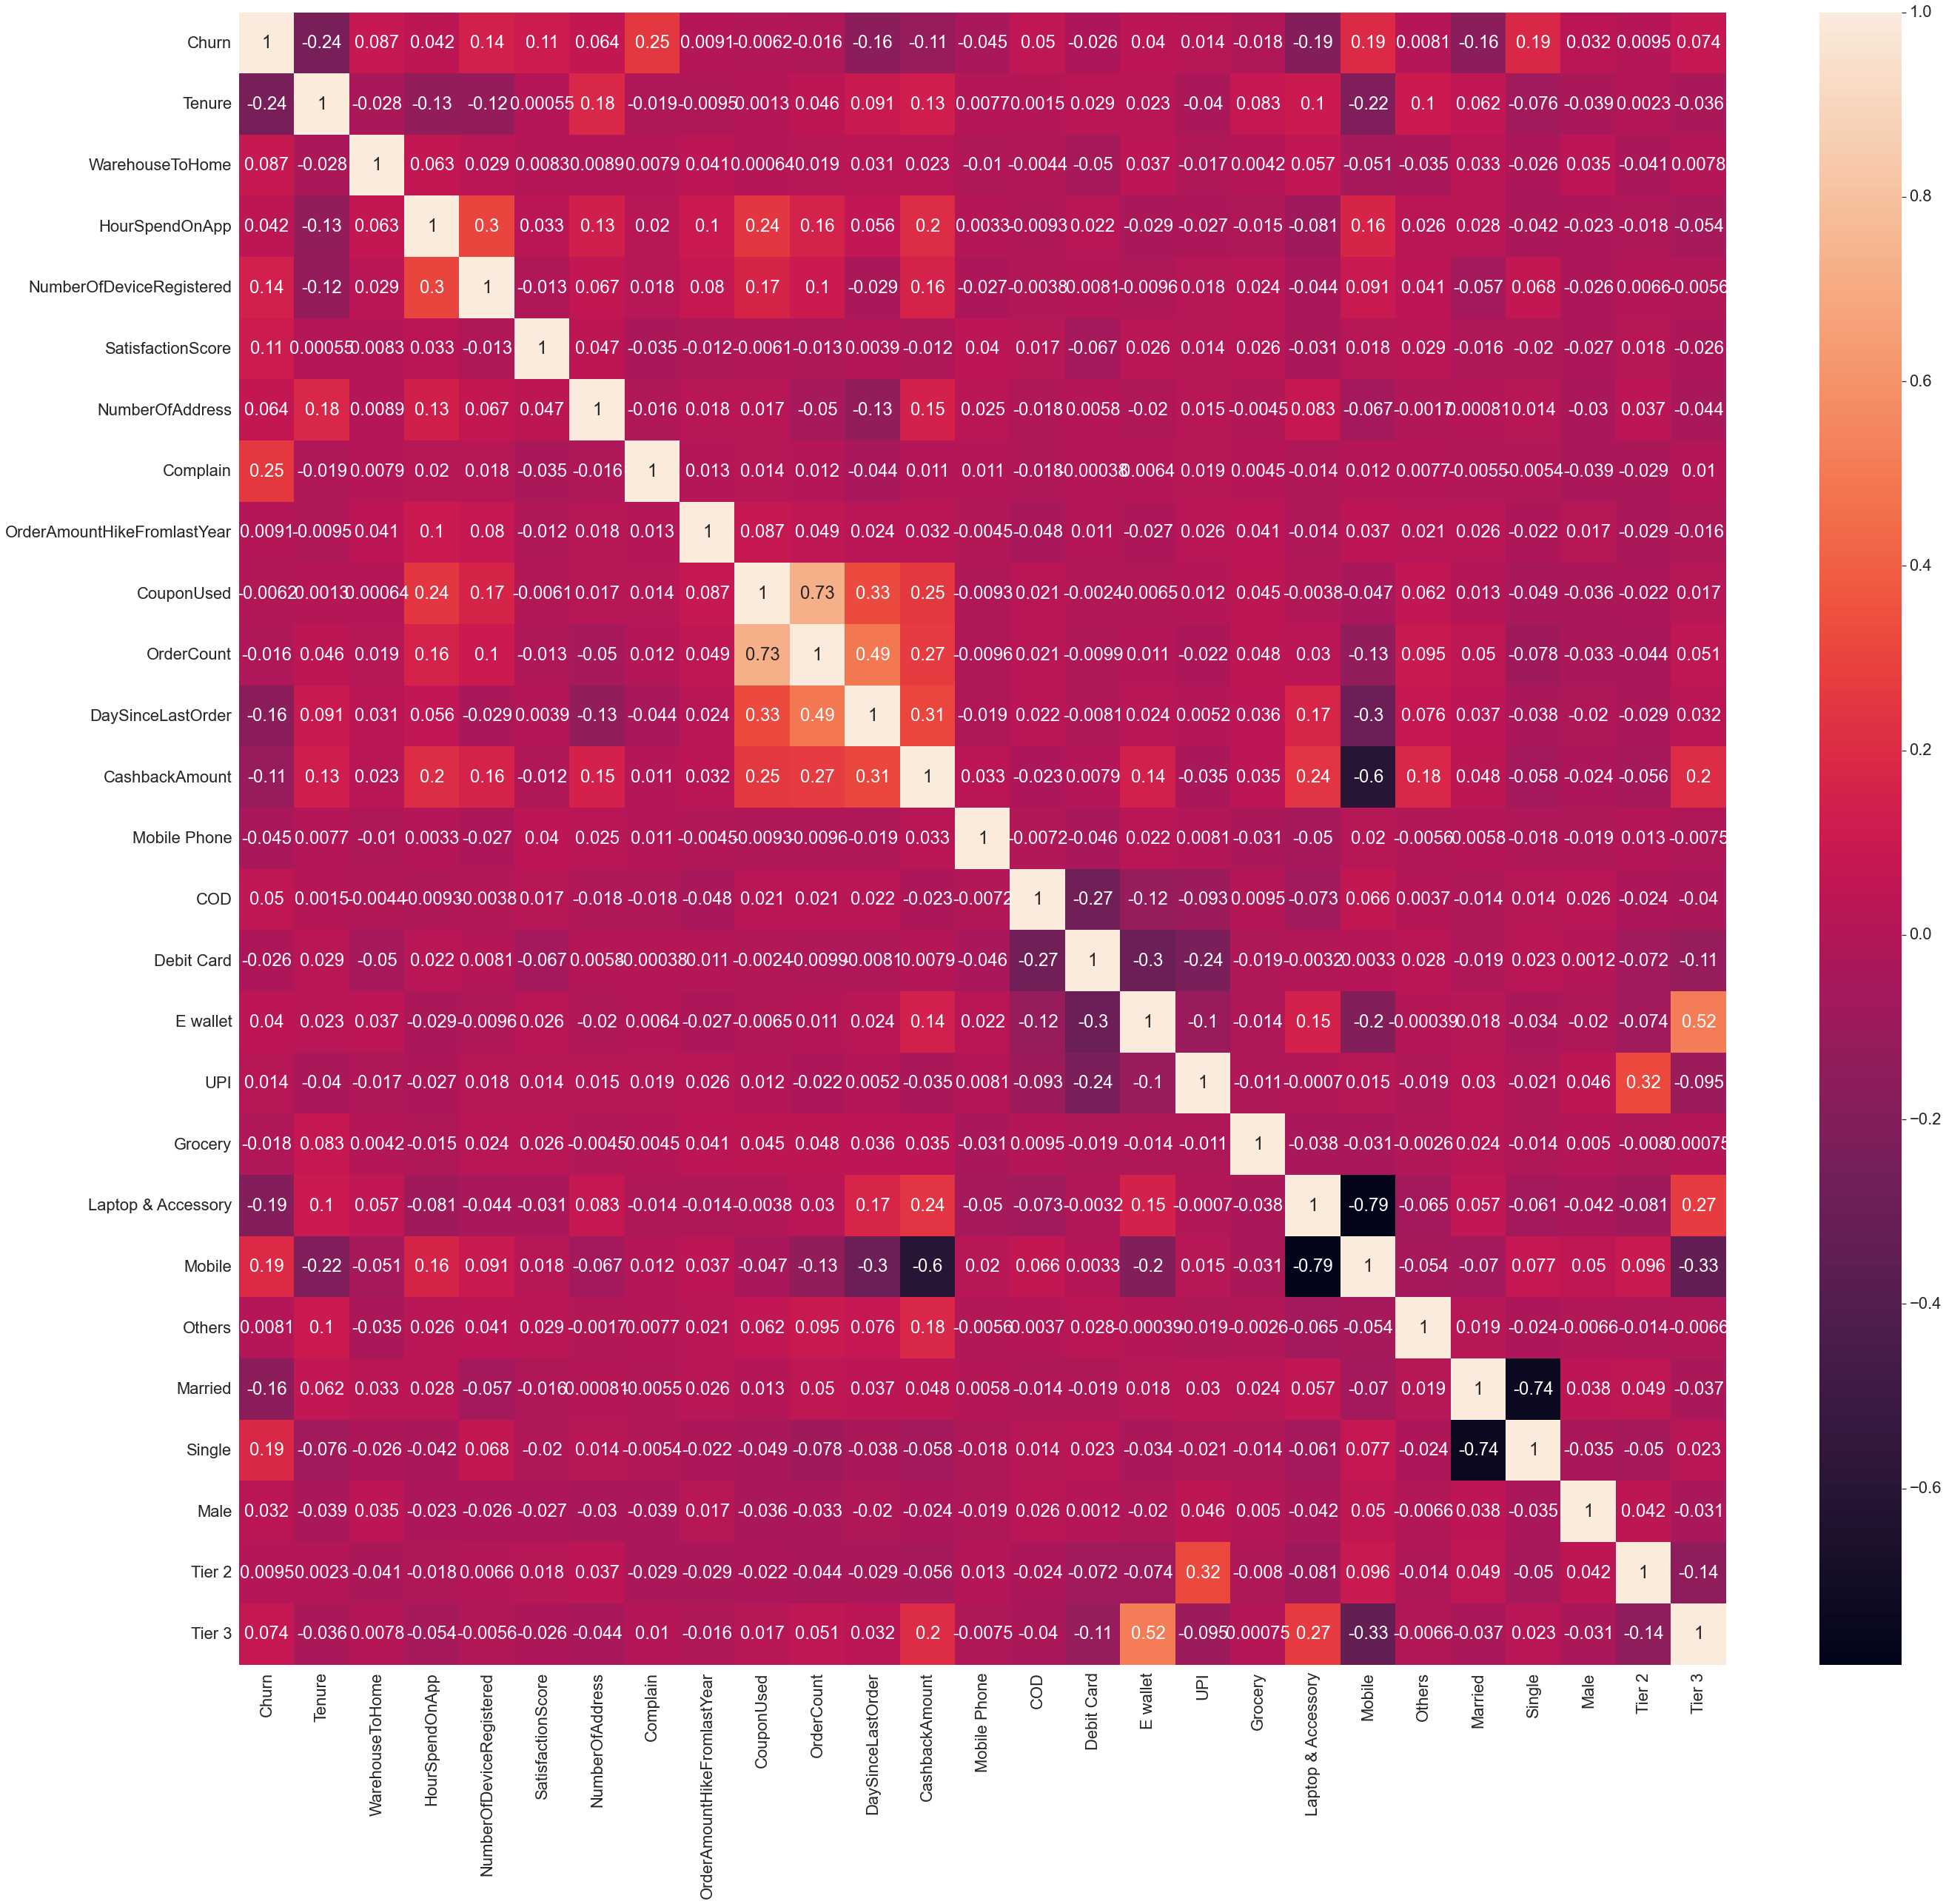

In [143]:
# construct heatmap with only continuous variables
plt.figure(figsize=(45,40))
sns.set(font_scale=2)
sns.heatmap(churn.corr(), annot=True)

In [144]:
results_path = 'results.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

<Figure size 432x288 with 0 Axes>

There is hardly any correlation between the variables

### Train Test Split

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
#Extract x and y
y = churn['Churn']
X = churn.drop(['Churn'], axis=1)

In [147]:
X.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                       3.0   
1    10.0              8.0             3.0                       4.0   
2    10.0             30.0             2.0                       4.0   
3    10.0             15.0             2.0                       4.0   
5    10.0             22.0             3.0                       5.0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1              9.0         1                         11.0   
1                  2              7.0         1                         15.0   
2                  2              6.0         1                         14.0   
3                  4              8.0         0                         23.0   
5                  4              2.0         1                         22.0   

   CouponUsed  OrderCount  ...  UPI  Grocery  Laptop & Accessory  Mobile  \
0         1.0         1.0  ...    0        0                   1       0   
1         0.0         1.0  ...    1        0                   0       1   
2         0.0         1.0  ...    0        0                   0       1   
3         0.0         1.0  ...    0        0                   1       0   
5         4.0         6.0  ...    0        0                   0       1   

   Others  Married  Single  Male  Tier 2  Tier 3  
0       0        0       1     0       0       1  
1       0        0       1     1       0       0  
2       0        0       1     1       0       0  
3       0        0       1     1       0       1  
5       0        0       1     0       0       0  

[5 rows x 26 columns]

In [148]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: Churn, dtype: int32

In [149]:
# Encode for string labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y)
y = pd.DataFrame(label_encoder.transform(y),columns = ["Churn"])

In [150]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

In [151]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (2825, 26)
y_train:  (2825, 1)
X_test:  (1212, 26)
y_test:  (1212, 1)


### Balancing The DataSet

In [168]:
from imblearn.over_sampling import SMOTE

In [169]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Get the proportions
y_train['Churn'].value_counts(normalize=True)

### Scaling the variables

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [172]:
#Scale the training data
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [173]:
X_train

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     0.343162        -1.242218       -1.431217                  0.120471   
1     1.637184         1.233882       -1.431217                 -0.994887   
2    -1.112614        -0.251778        1.513483                  0.120471   
3     0.990173        -0.870803        1.513483                  0.120471   
4     2.931207        -0.994608       -1.431217                 -0.994887   
...        ...              ...             ...                       ...   
4609 -1.112614         0.354379        1.513483                  0.120471   
4610 -1.112614        -0.994608       -1.431217                 -0.994887   
4611  0.343162         1.095559        0.041133                 -0.994887   
4612 -0.560778        -0.870803       -1.431217                 -0.994887   
4613  0.700210        -1.111078        1.513483                  1.202786   

      SatisfactionScore  NumberOfAddress  Complain  \
0              1.352968         0.736446 -0.772860   
1             -0.150104         1.977637 -0.772860   
2             -0.150104        -0.504745 -0.772860   
3              0.601432         1.150176 -0.772860   
4              0.601432         0.322715 -0.772860   
...                 ...              ...       ...   
4609           1.352968        -0.062628  0.468535   
4610           0.601432         0.322715 -0.772860   
4611          -0.315956        -1.286554  1.344558   
4612          -0.150104        -0.176161  1.344558   
4613          -0.105576         2.354597  1.344558   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  ...       UPI  \
0                        0.965155   -1.355016   -0.243666  ... -0.315217   
1                       -0.164689   -1.355016   -0.893794  ... -0.315217   
2                        0.965155   -0.423632   -0.243666  ... -0.315217   
3                       -0.729610    0.507753   -0.243666  ... -0.315217   
4                        1.812537    2.370523    2.356844  ... -0.315217   
...                           ...         ...         ...  ...       ...   
4609                     0.448973   -0.038297   -0.243666  ... -0.315217   
4610                    -1.294532   -0.487829   -0.893794  ... -0.315217   
4611                     0.464523   -1.355016    0.262989  ... -0.315217   
4612                     0.767842   -0.423632   -0.893794  ... -0.315217   
4613                    -0.447149   -0.396040   -0.243666  ... -0.315217   

        Grocery  Laptop & Accessory  Mobile    Others   Married    Single  \
0     -0.029456            1.180224 -0.9555 -0.066928 -0.952268 -0.824803   
1     -0.029456            1.180224 -0.9555 -0.066928 -0.952268  1.237274   
2     -0.029456            1.180224 -0.9555 -0.066928  1.086282 -0.824803   
3     -0.029456            1.180224 -0.9555 -0.066928 -0.952268 -0.824803   
4     33.948490           -0.857514 -0.9555 -0.066928  1.086282 -0.824803   
...         ...                 ...     ...       ...       ...       ...   
4609  -0.029456            1.180224 -0.9555 -0.066928 -0.952268  1.237274   
4610  -0.029456            1.180224 -0.9555 -0.066928  1.086282 -0.824803   
4611  -0.029456            1.180224 -0.9555 -0.066928  1.086282 -0.824803   
4612  -0.029456            1.180224 -0.9555 -0.066928 -0.337746 -0.824803   
4613  -0.029456           -0.857514 -0.9555  0.422824 -0.952268  1.176186   

          Male    Tier 2    Tier 3  
0     0.787929 -0.229241 -0.754229  
1    -1.320155 -0.229241  1.370821  
2     0.787929 -0.229241 -0.754229  
3     0.787929 -0.229241  1.370821  
4     0.787929 -0.229241  1.370821  
...        ...       ...       ...  
4609 -1.320155 -0.229241  1.370821  
4610  0.787929 -0.229241 -0.754229  
4611 -1.087545 -0.229241  1.370821  
4612 -1.320155 -0.229241  0.730224  
4613  0.787929 -0.229241 -0.754229  

[4614 rows x 26 columns]

In [174]:
# Apply the transformation on the test data
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [175]:
X_test

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0    -0.142097        -1.118413       -1.431217                 -0.994887   
1    -0.627355        -0.994608        0.041133                 -0.994887   
2     0.504914        -0.004168        0.041133                 -0.994887   
3     1.313679        -0.004168        1.513483                  0.120471   
4     2.122443         0.614857        1.513483                  0.120471   
...        ...              ...             ...                       ...   
1207  0.666667        -0.870803        0.041133                  1.235828   
1208  0.828420        -0.251778       -1.431217                 -0.994887   
1209 -0.627355        -0.623193        0.041133                 -0.994887   
1210 -0.303850        -0.623193        0.041133                  0.120471   
1211  0.019656         0.738662        1.513483                  0.120471   

      SatisfactionScore  NumberOfAddress  Complain  \
0             -1.653177         2.391367 -0.772860   
1             -0.901641         0.322715  1.344558   
2             -1.653177        -0.918476 -0.772860   
3             -1.653177        -0.504745 -0.772860   
4              0.601432         2.391367 -0.772860   
...                 ...              ...       ...   
1207           0.601432        -0.504745 -0.772860   
1208          -0.150104        -0.091015  1.344558   
1209          -1.653177        -0.918476 -0.772860   
1210           0.601432        -0.091015 -0.772860   
1211           1.352968        -0.504745 -0.772860   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  ...       UPI  \
0                        0.400233   -1.355016   -0.243666  ... -0.315217   
1                       -0.729610   -0.423632   -0.893794  ... -0.315217   
2                       -1.294532   -1.355016   -0.893794  ... -0.315217   
3                       -0.447149   -0.423632    2.356844  ... -0.315217   
4                        0.965155   -0.423632   -0.243666  ... -0.315217   
...                           ...         ...         ...  ...       ...   
1207                     2.094998    0.507753    1.056589  ... -0.315217   
1208                    -0.447149   -1.355016   -0.893794  ... -0.315217   
1209                    -1.294532   -1.355016   -0.893794  ... -0.315217   
1210                    -1.012071    0.507753   -0.243666  ... -0.315217   
1211                    -0.729610    0.507753    2.356844  ... -0.315217   

       Grocery  Laptop & Accessory    Mobile    Others   Married    Single  \
0    -0.029456            1.180224 -0.955500 -0.066928  1.086282 -0.824803   
1    -0.029456            1.180224 -0.955500 -0.066928 -0.952268  1.237274   
2    -0.029456            1.180224 -0.955500 -0.066928  1.086282 -0.824803   
3    -0.029456           -0.857514  1.057096 -0.066928 -0.952268  1.237274   
4    -0.029456            1.180224 -0.955500 -0.066928  1.086282 -0.824803   
...        ...                 ...       ...       ...       ...       ...   
1207 -0.029456           -0.857514  1.057096 -0.066928 -0.952268  1.237274   
1208 -0.029456            1.180224 -0.955500 -0.066928  1.086282 -0.824803   
1209 -0.029456            1.180224 -0.955500 -0.066928  1.086282 -0.824803   
1210 -0.029456           -0.857514  1.057096 -0.066928  1.086282 -0.824803   
1211 -0.029456            1.180224 -0.955500 -0.066928 -0.952268  1.237274   

          Male    Tier 2    Tier 3  
0     0.787929 -0.229241 -0.754229  
1     0.787929 -0.229241  1.370821  
2    -1.320155 -0.229241  1.370821  
3    -1.320155 -0.229241 -0.754229  
4     0.787929 -0.229241 -0.754229  
...        ...       ...       ...  
1207 -1.320155 -0.229241 -0.754229  
1208  0.787929 -0.229241  1.370821  
1209 -1.320155 -0.229241  1.370821  
1210 -1.320155 -0.229241  1.370821  
1211 -1.320155 -0.229241  1.370821  

[1212 rows x 26 columns]

### Basic Models

#### Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [177]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [178]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7902037277850021
[[1804  503]
 [ 465 1842]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2307
           1       0.79      0.80      0.79      2307

    accuracy                           0.79      4614
   macro avg       0.79      0.79      0.79      4614
weighted avg       0.79      0.79      0.79      4614



In [179]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_train_acc= accuracy_score(y_train, y_train_predict)
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_accuracy ',lr_train_acc)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_accuracy  0.7902037277850021
lr_train_precision  0.79
lr_train_recall  0.8
lr_train_f1  0.79


AUC: 0.868


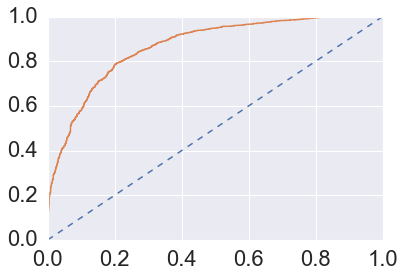

In [180]:
#AUC and ROC for the training data
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

In [181]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7797029702970297
[[796 222]
 [ 45 149]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1018
           1       0.40      0.77      0.53       194

    accuracy                           0.78      1212
   macro avg       0.67      0.77      0.69      1212
weighted avg       0.86      0.78      0.80      1212



In [182]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_test_acc= accuracy_score(y_test, y_test_predict)
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',lr_test_acc)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_accuracy  0.7797029702970297
lr_test_precision  0.4
lr_test_recall  0.77
lr_test_f1  0.53


AUC: 0.852


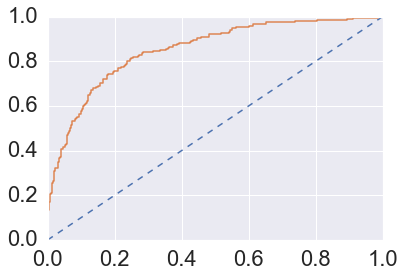

In [183]:
# AUC and ROC for the test data
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

In [184]:
#print(LR_model.coef_, LR_model.intercept_)
pd.DataFrame(zip(X_train.columns, np.transpose(LR_model.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
6                      Complain  0.752093
5               NumberOfAddress  0.556178
4             SatisfactionScore  0.499212
9                    OrderCount  0.459869
22                       Single  0.416455
3      NumberOfDeviceRegistered  0.390676
25                       Tier 3  0.328241
1               WarehouseToHome  0.300711
23                         Male  0.252359
15                     E wallet  0.155335
24                       Tier 2  0.141795
20                       Others  0.090683
13                          COD  0.047920
16                          UPI -0.055004
14                   Debit Card -0.057018
7   OrderAmountHikeFromlastYear -0.071718
2                HourSpendOnApp -0.102071
21                      Married -0.118832
12                 Mobile Phone -0.159285
17                      Grocery -0.177081
8                    CouponUsed -0.195037
10            DaySinceLastOrder -0.490601
11               CashbackAmount -0.681531
0                        Tenure -0.944057
19                       Mobile -0.954491
18           Laptop & Accessory -1.141631

In [185]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.79     0.78
AUC            0.87     0.85
Recall         0.80     0.77
Precision      0.79     0.40
F1 Score       0.79     0.53

### Decision Tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [187]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [188]:
## Performance Matrix on train data set
y_train_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2307    0]
 [   0 2307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00      2307

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [189]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_train_acc= accuracy_score(y_train, y_train_predict)
dt_train_precision=round(df.loc["1"][0],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_f1=round(df.loc["1"][2],2)
print ('dt_train_accuracy ',dt_train_acc)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_accuracy  1.0
dt_train_precision  1.0
dt_train_recall  1.0
dt_train_f1  1.0


AUC: 1.000


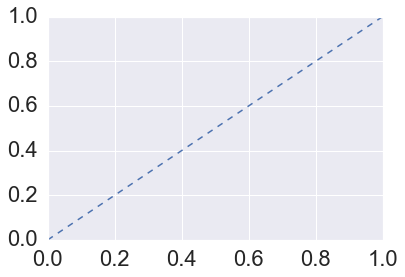

In [190]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr)

In [191]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9042904290429042
[[937  81]
 [ 35 159]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1018
           1       0.66      0.82      0.73       194

    accuracy                           0.90      1212
   macro avg       0.81      0.87      0.84      1212
weighted avg       0.92      0.90      0.91      1212



In [192]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_test_acc= accuracy_score(y_test, y_test_predict)
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('dt_test_accuracy ',dt_test_acc)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_accuracy  0.9042904290429042
dt_test_precision  0.66
dt_test_recall  0.82
dt_test_f1  0.73


AUC: 0.870


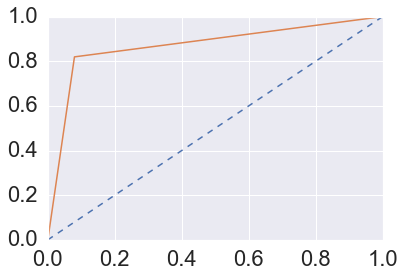

In [193]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr)

In [194]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('G:\greatlearning\Capstone_Project\CC_EC_01 - Customer Churn - E-Commerce\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [195]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame({'Variable':X_train.columns,
              'Importance':dt_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0                        Tenure    0.200475
6                      Complain    0.109593
10            DaySinceLastOrder    0.102219
8                    CouponUsed    0.080608
4             SatisfactionScore    0.059076
1               WarehouseToHome    0.058766
11               CashbackAmount    0.054385
7   OrderAmountHikeFromlastYear    0.050478
5               NumberOfAddress    0.047987
18           Laptop & Accessory    0.044879
25                       Tier 3    0.031003
22                       Single    0.028530
3      NumberOfDeviceRegistered    0.027705
9                    OrderCount    0.025455
2                HourSpendOnApp    0.024033
14                   Debit Card    0.016038
23                         Male    0.009042
13                          COD    0.006566
12                 Mobile Phone    0.005151
16                          UPI    0.004745
20                       Others    0.003630
15                     E wallet    0.003380
24                       Tier 2    0.003367
19                       Mobile    0.001878
21                      Married    0.001011
17                      Grocery    0.000000

In [196]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy        1.0     0.90
AUC             1.0     0.87
Recall          1.0     0.82
Precision       1.0     0.66
F1 Score        1.0     0.73

In [197]:
eli5.explain_weights(dt_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Tenure', weight=0.2004751806846847, std=None, value=None), FeatureWeight(feature='Complain', weight=0.10959271853128998, std=None, value=None), FeatureWeight(feature='DaySinceLastOrder', weight=0.10221913755439643, std=None, value=None), FeatureWeight(feature='CouponUsed', weight=0.08060848040562443, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.0590755372618345, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.058766244926501184, std=None, value=None), FeatureWeight(feature='CashbackAmount', weight=0.05438494219999545, std=None, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.05047766735815988, std=None, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.047986545803029315, std=None, value=None), FeatureWeight(feature='Laptop & Accessory', weight=0.04487911772342635, std=None, value=None), FeatureWeight(feature='Tier 3', weight=0.031002962974179316, std=None, value=None), FeatureWeight(feature='Single', weight=0.028529674236001046, std=None, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.02770541078242536, std=None, value=None), FeatureWeight(feature='OrderCount', weight=0.025455401784697525, std=None, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.024033350405504618, std=None, value=None), FeatureWeight(feature='Debit Card', weight=0.016037521713324607, std=None, value=None), FeatureWeight(feature='Male', weight=0.009041542373285357, std=None, value=None), FeatureWeight(feature='COD', weight=0.00656641436875507, std=None, value=None), FeatureWeight(feature='Mobile Phone', weight=0.005150640266426864, std=None, value=None), FeatureWeight(feature='UPI', weight=0.004744671603105936, std=None, value=None)], remaining=6), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[2307.0, 2307.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=4614, sample_ratio=1.0, feature_name='Tenure', feature_id=0, threshold=-0.951579749584198, left=NodeInfo(id=1, is_leaf=False, value=[223.0, 912.0], value_ratio=[0.19647577092511012, 0.8035242290748899], impurity=0.3157460847289876, samples=1135, sample_ratio=0.2459904638058084, feature_name='Complain', feature_id=6, threshold=-0.7675755321979523, left=NodeInfo(id=2, is_leaf=False, value=[181.0, 383.0], value_ratio=[0.32092198581560283, 0.6790780141843972], impurity=0.4358621296715457, samples=564, sample_ratio=0.1222366710013004, feature_name='NumberOfAddress', feature_id=5, threshold=-0.5005758851766586, left=NodeInfo(id=3, is_leaf=False, value=[154.0, 197.0], value_ratio=[0.43874643874643876, 0.5612535612535613], impurity=0.49249600246751246, samples=351, sample_ratio=0.07607282184655396, feature_name='Laptop & Accessory', feature_id=18, threshold=0.16135504841804504, left=NodeInfo(id=4, is_leaf=False, value=[102.0, 191.0], value_ratio=[0.34812286689419797, 0.6518771331058021], impurity=0.45386667287912497, samples=293, sample_ratio=0.0635023840485479, feature_name='SatisfactionScore', feature_id=4, threshold=-0.8925808370113373, left=NodeInfo(id=5, is_leaf=False, value=[34.0, 15.0], value_ratio=[0.6938775510204082, 0.30612244897959184], impurity=0.4248229904206581, samples=49, sample_ratio=0.010619852622453402, feature_name='CashbackAmount', feature_id=11, threshold=1.1788955926895142, left=NodeInfo(id=6, is_leaf=False, value=[34.0, 10.0], value_ratio=[0.7727272727272727, 0.22727272727272727], impurity=0.35123966942148765, samples=44, sample_ratio=0.00953619419159081, feature_name='DaySinceLastOrder', feature_id=10, threshold=-0.7694890201091766, left=NodeInfo(id=7, is_leaf=False, value=[7.0, 9.0], value_ratio=[0.4375, 0.5625], impurity=0

In [198]:
eli5.explain_prediction(dt_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='Tier 3', weight=0.25, std=None, value=1.3708210242145482), FeatureWeight(feature='Complain', weight=0.1195321540559785, std=None, value=-0.7728597247494505), FeatureWeight(feature='Laptop & Accessory', weight=0.11413454270597123, std=None, value=1.1802240403289563), FeatureWeight(feature='Tenure', weight=0.09902270767461918, std=None, value=1.6371841817098796), FeatureWeight(feature='SatisfactionScore', weight=0.05599386368617143, std=None, value=-0.1501043744598836), FeatureWeight(feature='CouponUsed', weight=0.025643044460460396, std=None, value=-1.3550164872487735)], neg=[FeatureWeight(feature='DaySinceLastOrder', weight=-0.16432631258320074, std=None, value=-0.9345736779195675)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### RandomForestClassifier

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rf_model = RandomForestClassifier(n_estimators = 501)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=501)

In [201]:
## Performance Matrix on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2307    0]
 [   0 2307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00      2307

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [202]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_train_acc= accuracy_score(y_train, y_train_predict)
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_accuracy ',rf_train_acc)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_accuracy  1.0
rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


AUC: 1.000


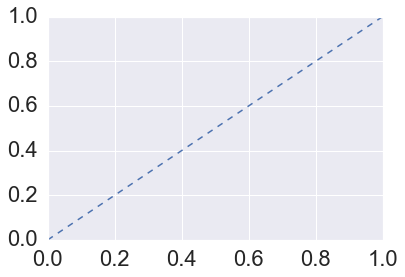

In [203]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [204]:
## Performance Matrix on test data set
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9603960396039604
[[1002   16]
 [  32  162]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1018
           1       0.91      0.84      0.87       194

    accuracy                           0.96      1212
   macro avg       0.94      0.91      0.92      1212
weighted avg       0.96      0.96      0.96      1212



In [205]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_test_acc= accuracy_score(y_test, y_test_predict)
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',rf_test_acc)
print ('lr_test_precision ',rf_test_precision)
print ('lr_test_recall ',rf_test_recall)
print ('lr_test_f1 ',rf_test_f1)

lr_test_accuracy  0.9603960396039604
lr_test_precision  0.91
lr_test_recall  0.84
lr_test_f1  0.87


AUC: 0.984


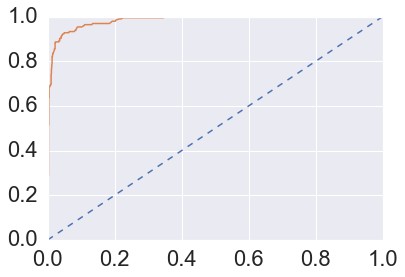

In [206]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [207]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0                        Tenure    0.133659
6                      Complain    0.086373
10            DaySinceLastOrder    0.082837
5               NumberOfAddress    0.068519
11               CashbackAmount    0.065240
3      NumberOfDeviceRegistered    0.061591
1               WarehouseToHome    0.061138
4             SatisfactionScore    0.060865
7   OrderAmountHikeFromlastYear    0.050185
8                    CouponUsed    0.042905
9                    OrderCount    0.038231
2                HourSpendOnApp    0.036195
25                       Tier 3    0.029663
22                       Single    0.029264
18           Laptop & Accessory    0.025392
21                      Married    0.024109
19                       Mobile    0.023034
23                         Male    0.020242
14                   Debit Card    0.016231
12                 Mobile Phone    0.014713
15                     E wallet    0.008771
13                          COD    0.007935
16                          UPI    0.006671
24                       Tier 2    0.005245
20                       Others    0.000965
17                      Grocery    0.000028

In [208]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy        1.0     0.96
AUC             1.0     0.98
Recall          1.0     0.84
Precision       1.0     0.91
F1 Score        1.0     0.87

In [209]:
eli5.explain_weights(rf_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Tenure', weight=0.13365879319898039, std=0.038097156334642, value=None), FeatureWeight(feature='Complain', weight=0.08637330177341748, std=0.029730356550299604, value=None), FeatureWeight(feature='DaySinceLastOrder', weight=0.08283672416951053, std=0.031047831679146567, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.0685185488277814, std=0.02079932569693808, value=None), FeatureWeight(feature='CashbackAmount', weight=0.06523984534814489, std=0.015274880575542738, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.06159105742278123, std=0.032854943869840995, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.061137617194431185, std=0.013312614732281696, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.06086460082710278, std=0.015066557290193695, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.05018488044463595, std=0.012005406462374368, value=None), FeatureWeight(feature='CouponUsed', weight=0.04290524138905915, std=0.018888719851855695, value=None), FeatureWeight(feature='OrderCount', weight=0.038231223477284235, std=0.019496467984192925, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.0361953800819549, std=0.020385828435297886, value=None), FeatureWeight(feature='Tier 3', weight=0.02966310157832961, std=0.01545058744544465, value=None), FeatureWeight(feature='Single', weight=0.029263606374060207, std=0.016808477143131717, value=None), FeatureWeight(feature='Laptop & Accessory', weight=0.02539187328864008, std=0.018410419406598984, value=None), FeatureWeight(feature='Married', weight=0.024108999329116282, std=0.01792791524175689, value=None), FeatureWeight(feature='Mobile', weight=0.023033613158256996, std=0.021288901241591808, value=None), FeatureWeight(feature='Male', weight=0.020241751819621207, std=0.007580362731461934, value=None), FeatureWeight(feature='Debit Card', weight=0.016230981966632935, std=0.007303115992449662, value=None), FeatureWeight(feature='Mobile Phone', weight=0.014713476018818037, std=0.005643340100459466, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [210]:
eli5.explain_prediction(rf_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.499957172780577, std=None, value=1.0), FeatureWeight(feature='Tenure', weight=0.24620389842689144, std=None, value=1.6371841817098796), FeatureWeight(feature='Complain', weight=0.07619508724010225, std=None, value=-0.7728597247494505), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.05024431634950244, std=None, value=-0.9948868537502756), FeatureWeight(feature='Male', weight=0.044122371918137324, std=None, value=-1.320154909099304), FeatureWeight(feature='Laptop & Accessory', weight=0.040874761561235776, std=None, value=1.1802240403289563), FeatureWeight(feature='Mobile', weight=0.030683841177783038, std=None, value=-0.9554999847390884), FeatureWeight(feature='WarehouseToHome', weight=0.030287531498216315, std=None, value=1.2338823878621812), FeatureWeight(feature='HourSpendOnApp', weight=0.02888186299225469, std=None, value=-1.4312166811683293), FeatureWeight(feature='OrderCount', weight=0.025795537258435634, std=None, value=-0.8937940163215503), FeatureWeight(feature='SatisfactionScore', weight=0.024034095342257304, std=None, value=-0.1501043744598836), FeatureWeight(feature='CashbackAmount', weight=0.020045054209496167, std=None, value=-0.46446920350739596), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.015098193764400093, std=None, value=-0.16468850204967214), FeatureWeight(feature='Mobile Phone', weight=0.0074627937927491065, std=None, value=0.674546204015511), FeatureWeight(feature='UPI', weight=0.0055121498324973385, std=None, value=-0.31521703153123837), FeatureWeight(feature='Debit Card', weight=0.005438500460980573, std=None, value=1.3186225819145891), FeatureWeight(feature='COD', weight=0.005331604301498595, std=None, value=-0.3317983491997608), FeatureWeight(feature='E wallet', weight=0.0052382250564849036, std=None, value=-0.4021381074341274), FeatureWeight(feature='Others', weight=0.00011753016676279382, std=None, value=-0.06692802978731151), FeatureWeight(feature='Tier 2', weight=8.253333087062448e-05, std=None, value=-0.22924056493577966)], neg=[FeatureWeight(feature='DaySinceLastOrder', weight=-0.07447962564883666, std=None, value=-0.9345736779195675), FeatureWeight(feature='Tier 3', weight=-0.0474930493079948, std=None, value=1.3708210242145482), FeatureWeight(feature='Single', weight=-0.035732795376963646, std=None, value=1.2372738175880464), FeatureWeight(feature='NumberOfAddress', weight=-0.022408399963896968, std=None, value=1.97763682696158), FeatureWeight(feature='Married', weight=-0.01392721581161585, std=None, value=-0.9522675258212505), FeatureWeight(feature='CouponUsed', weight=-0.0014981110803679286, std=None, value=-1.3550164872487735)], pos

#### Linear Discriminant Analysis

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [212]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.788469874295622
[[1785  522]
 [ 454 1853]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2307
           1       0.78      0.80      0.79      2307

    accuracy                           0.79      4614
   macro avg       0.79      0.79      0.79      4614
weighted avg       0.79      0.79      0.79      4614



In [213]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_train_acc= accuracy_score(y_train, y_train_predict)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_acc ',lda_train_acc)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_acc  0.788469874295622
lda_train_precision  0.78
lda_train_recall  0.8
lda_train_f1  0.79


AUC: 0.867


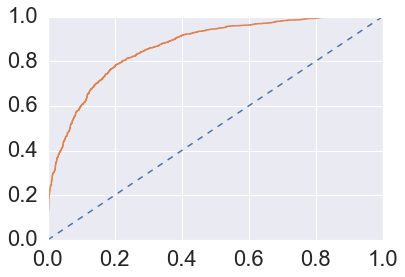

In [214]:
#AUC and ROC for the training data
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [215]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7747524752475248
[[785 233]
 [ 40 154]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1018
           1       0.40      0.79      0.53       194

    accuracy                           0.77      1212
   macro avg       0.67      0.78      0.69      1212
weighted avg       0.86      0.77      0.80      1212



In [216]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_test_acc= accuracy_score(y_test, y_test_predict)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_acc ',lda_test_acc)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_acc  0.7747524752475248
lda_test_precision  0.4
lda_test_recall  0.79
lda_test_f1  0.53


AUC: 0.853


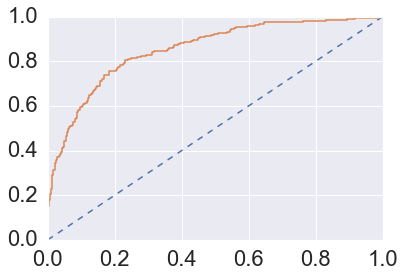

In [217]:
# AUC and ROC for the test data
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [218]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LDA_model).fit(X, y)

In [219]:
selected_feat= X_train.columns[(selector.get_support())]
len(selected_feat)

8

In [220]:
print(selected_feat)

Index(['Complain', 'COD', 'Grocery', 'Laptop & Accessory', 'Mobile', 'Others',
       'Single', 'Tier 3'],
      dtype='object')


In [221]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.79      0.77
AUC             0.87      0.85
Recall          0.80      0.79
Precision       0.78      0.40
F1 Score        0.79      0.53

#### KNN Model

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [223]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9547030775899437
[[2105  202]
 [   7 2300]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2307
           1       0.92      1.00      0.96      2307

    accuracy                           0.95      4614
   macro avg       0.96      0.95      0.95      4614
weighted avg       0.96      0.95      0.95      4614



In [224]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_train_acc= accuracy_score(y_train, y_train_predict)
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_acc ',knn_train_acc)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_acc  0.9547030775899437
knn_train_precision  0.92
knn_train_recall  1.0
knn_train_f1  0.96


AUC: 0.999


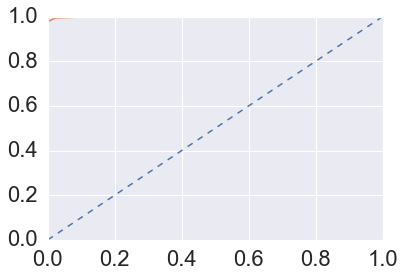

In [225]:
#AUC and ROC for the training data
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

In [226]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8556105610561056
[[860 158]
 [ 17 177]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1018
           1       0.53      0.91      0.67       194

    accuracy                           0.86      1212
   macro avg       0.75      0.88      0.79      1212
weighted avg       0.91      0.86      0.87      1212



In [227]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_test_acc= accuracy_score(y_test, y_test_predict)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_acc ',knn_test_acc)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_acc  0.8556105610561056
knn_test_precision  0.53
knn_test_recall  0.91
knn_test_f1  0.67


AUC: 0.950


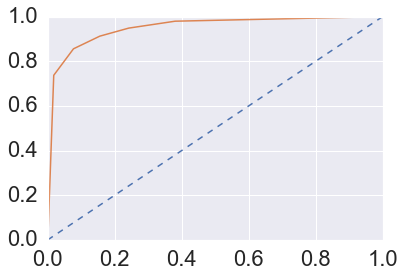

In [228]:
# AUC and ROC for the test data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

In [229]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.95      0.86
AUC             1.00      0.95
Recall          1.00      0.91
Precision       0.92      0.53
F1 Score        0.96      0.67

#### Naive Bayes Model

In [230]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [231]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [232]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.5047680970957954
[[  33 2274]
 [  11 2296]]
              precision    recall  f1-score   support

           0       0.75      0.01      0.03      2307
           1       0.50      1.00      0.67      2307

    accuracy                           0.50      4614
   macro avg       0.63      0.50      0.35      4614
weighted avg       0.63      0.50      0.35      4614



In [233]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_train_acc= accuracy_score(y_train, y_train_predict)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_acc ',nb_train_acc)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_acc  0.5047680970957954
nb_train_precision  0.5
nb_train_recall  1.0
nb_train_f1  0.67


AUC: 0.805


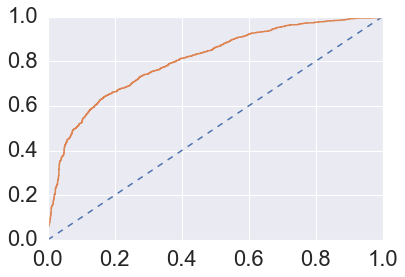

In [234]:
#AUC and ROC for the training data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [235]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.16831683168316833
[[  12 1006]
 [   2  192]]
              precision    recall  f1-score   support

           0       0.86      0.01      0.02      1018
           1       0.16      0.99      0.28       194

    accuracy                           0.17      1212
   macro avg       0.51      0.50      0.15      1212
weighted avg       0.75      0.17      0.06      1212



In [236]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_test_acc= accuracy_score(y_test, y_test_predict)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_acc ',nb_test_acc)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_acc  0.16831683168316833
nb_test_precision  0.16
nb_test_recall  0.99
nb_test_f1  0.28


AUC: 0.762


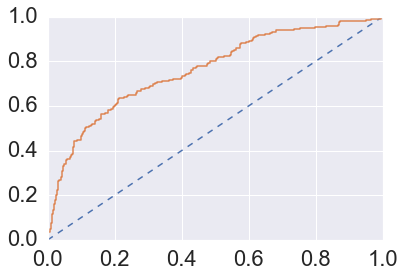

In [237]:
# AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [238]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'nb Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'nb Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index
       )
round(data,2)

nb Train  nb Test
Accuracy       0.50     0.17
AUC            0.81     0.76
Recall         1.00     0.99
Precision      0.50     0.16
F1 Score       0.67     0.28

#### SVM 

In [239]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [240]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.959037711313394
[[2162  145]
 [  44 2263]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2307
           1       0.94      0.98      0.96      2307

    accuracy                           0.96      4614
   macro avg       0.96      0.96      0.96      4614
weighted avg       0.96      0.96      0.96      4614



In [241]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_train_acc= accuracy_score(y_train, y_train_predict)
svm_train_precision=round(df.loc["1"][0],2)
svm_train_recall=round(df.loc["1"][1],2)
svm_train_f1=round(df.loc["1"][2],2)
print ('svm_train_acc ',svm_train_acc)
print ('svm_train_precision ',svm_train_precision)
print ('svm_train_recall ',svm_train_recall)
print ('svm_train_f1 ',svm_train_f1)

svm_train_acc  0.959037711313394
svm_train_precision  0.94
svm_train_recall  0.98
svm_train_f1  0.96


AUC: 0.990


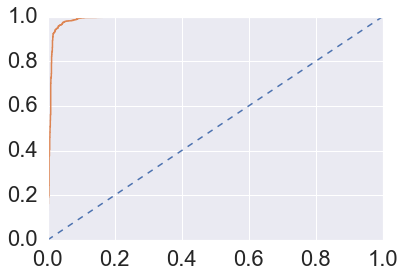

In [242]:
#AUC and ROC for the training data
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_train_auc)
# calculate roc curve
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr)

In [243]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9018151815181518
[[925  93]
 [ 26 168]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1018
           1       0.64      0.87      0.74       194

    accuracy                           0.90      1212
   macro avg       0.81      0.89      0.84      1212
weighted avg       0.92      0.90      0.91      1212



In [244]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_test_acc= accuracy_score(y_test, y_test_predict)
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
print ('svm_test_acc ',svm_test_acc)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)

svm_test_acc  0.9018151815181518
svm_test_precision  0.64
svm_test_recall  0.87
svm_test_f1  0.74


AUC: 0.945


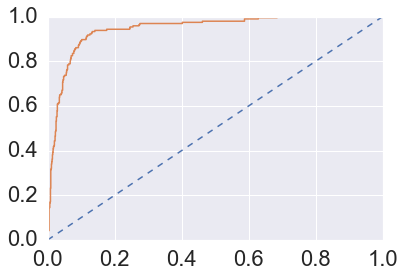

In [245]:
# AUC and ROC for the test data
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)

In [246]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'svm Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'svm Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1]},index=index
       )
round(data,2)

svm Train  svm Test
Accuracy        0.96      0.90
AUC             0.99      0.95
Recall          0.98      0.87
Precision       0.94      0.64
F1 Score        0.96      0.74

### Cross Validation

In [2349]:
from sklearn.model_selection import cross_val_score

In [2355]:
SVM_accuracies = cross_val_score(estimator = SVM_model, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [2356]:
print("Mean_SVM_Acc : ", SVM_accuracies.mean())

Mean_SVM_Acc :  0.8335591944287597


### Neural Network

In [247]:
from sklearn.neural_network import MLPClassifier

In [248]:
ann_model = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
ann_model.fit(X_train, y_train)

Iteration 1, loss = 0.71383653
Iteration 2, loss = 0.68736520
Iteration 3, loss = 0.66236173
Iteration 4, loss = 0.64118098
Iteration 5, loss = 0.62339037
Iteration 6, loss = 0.60769668
Iteration 7, loss = 0.59409596
Iteration 8, loss = 0.58192886
Iteration 9, loss = 0.57118617
Iteration 10, loss = 0.56152580
Iteration 11, loss = 0.55293689
Iteration 12, loss = 0.54516854
Iteration 13, loss = 0.53807191
Iteration 14, loss = 0.53144441
Iteration 15, loss = 0.52539327
Iteration 16, loss = 0.51986064
Iteration 17, loss = 0.51486425
Iteration 18, loss = 0.51001602
Iteration 19, loss = 0.50559678
Iteration 20, loss = 0.50136621
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [249]:
## Performance Matrix on train data set
y_train_predict = ann_model.predict(X_train)
model_score = ann_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7674469007368877
[[1761  546]
 [ 527 1780]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2307
           1       0.77      0.77      0.77      2307

    accuracy                           0.77      4614
   macro avg       0.77      0.77      0.77      4614
weighted avg       0.77      0.77      0.77      4614



In [250]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_train_acc= accuracy_score(y_train, y_train_predict)
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_acc ',ann_train_acc)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_acc  0.7674469007368877
ann_train_precision  0.77
ann_train_recall  0.77
ann_train_f1  0.77


AUC: 0.847


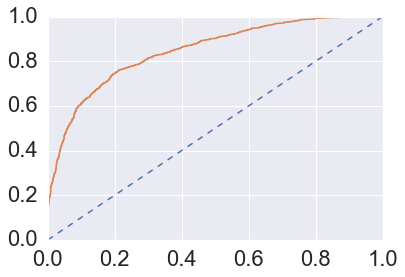

In [251]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

In [252]:
## Performance Matrix on test data set
y_test_predict = ann_model.predict(X_test)
model_score = ann_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.75
[[768 250]
 [ 53 141]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1018
           1       0.36      0.73      0.48       194

    accuracy                           0.75      1212
   macro avg       0.65      0.74      0.66      1212
weighted avg       0.84      0.75      0.78      1212



In [253]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_test_acc= accuracy_score(y_test, y_test_predict)
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_acc ',ann_test_acc)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_acc  0.75
ann_test_precision  0.36
ann_test_recall  0.73
ann_test_f1  0.48


AUC: 0.814


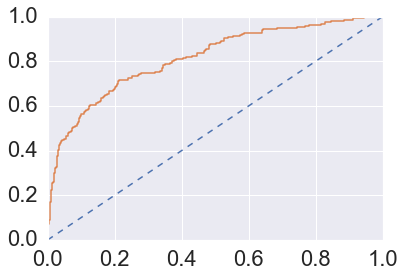

In [254]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)

In [255]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.77      0.75
AUC             0.85      0.81
Recall          0.77      0.73
Precision       0.77      0.36
F1 Score        0.77      0.48

#### Basic Bagging and Boosting Models

#### Bagging

In [256]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [257]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9993498049414824
[[2306    1]
 [   2 2305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00      2307

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [258]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_train_acc= accuracy_score(y_train, y_train_predict)
bag_train_precision=round(df.loc["1"][0],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_f1=round(df.loc["1"][2],2)
print ('bag_train_acc ',bag_train_acc)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

bag_train_acc  0.9993498049414824
bag_train_precision  1.0
bag_train_recall  1.0
bag_train_f1  1.0


AUC: 1.000


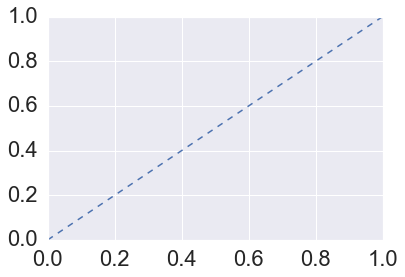

In [259]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

In [260]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9521452145214522
[[998  20]
 [ 38 156]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1018
           1       0.89      0.80      0.84       194

    accuracy                           0.95      1212
   macro avg       0.92      0.89      0.91      1212
weighted avg       0.95      0.95      0.95      1212



In [261]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_test_acc= accuracy_score(y_test, y_test_predict)
bag_test_precision=round(df.loc["1"][0],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_f1=round(df.loc["1"][2],2)
print ('bag_test_acc ',bag_test_acc)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

bag_test_acc  0.9521452145214522
bag_test_precision  0.89
bag_test_recall  0.8
bag_test_f1  0.84


AUC: 0.974


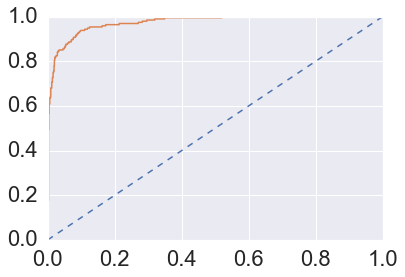

In [262]:
# AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

In [263]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1]},index=index
       )
round(data,2)

bag Train  bag Test
Accuracy         1.0      0.95
AUC              1.0      0.97
Recall           1.0      0.80
Precision        1.0      0.89
F1 Score         1.0      0.84

#### Ada Boost

In [264]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [265]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8931512787169484
[[2059  248]
 [ 245 2062]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2307
           1       0.89      0.89      0.89      2307

    accuracy                           0.89      4614
   macro avg       0.89      0.89      0.89      4614
weighted avg       0.89      0.89      0.89      4614



In [266]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_train_acc= accuracy_score(y_train, y_train_predict)
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_acc ',adb_train_acc)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)


adb_train_acc  0.8931512787169484
adb_train_precision  0.89
adb_train_recall  0.89
adb_train_f1  0.89


AUC: 0.961


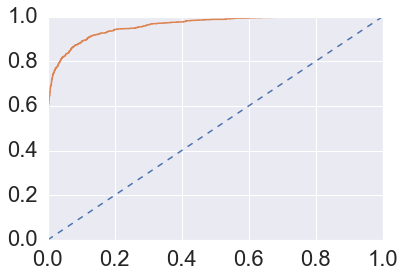

In [267]:
#AUC and ROC for the training data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)

In [268]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8613861386138614
[[908 110]
 [ 58 136]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1018
           1       0.55      0.70      0.62       194

    accuracy                           0.86      1212
   macro avg       0.75      0.80      0.77      1212
weighted avg       0.88      0.86      0.87      1212



In [269]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_test_acc= accuracy_score(y_test, y_test_predict)
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_acc ',adb_test_acc)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_acc  0.8613861386138614
adb_test_precision  0.55
adb_test_recall  0.7
adb_test_f1  0.62


AUC: 0.871


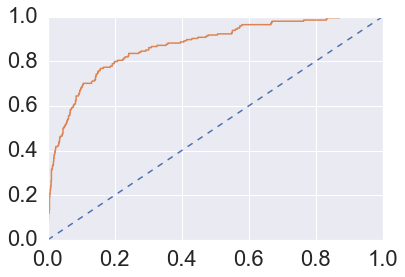

In [270]:
# AUC and ROC for the test data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)

In [271]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':ADB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
2                HourSpendOnApp        0.16
8                    CouponUsed        0.16
5               NumberOfAddress        0.12
0                        Tenure        0.10
10            DaySinceLastOrder        0.10
3      NumberOfDeviceRegistered        0.08
4             SatisfactionScore        0.06
9                    OrderCount        0.04
21                      Married        0.04
18           Laptop & Accessory        0.04
1               WarehouseToHome        0.02
23                         Male        0.02
22                       Single        0.02
25                       Tier 3        0.02
6                      Complain        0.02
14                   Debit Card        0.00
15                     E wallet        0.00
16                          UPI        0.00
17                      Grocery        0.00
12                 Mobile Phone        0.00
19                       Mobile        0.00
20                       Others        0.00
11               CashbackAmount        0.00
7   OrderAmountHikeFromlastYear        0.00
24                       Tier 2        0.00
13                          COD        0.00

In [272]:
eli5.explain_weights(ADB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='AdaBoostClassifier(random_state=1)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CouponUsed', weight=0.16, std=0.3666060555964671, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.16, std=0.36660605559646714, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.12, std=0.32496153618543844, value=None), FeatureWeight(feature='DaySinceLastOrder', weight=0.1, std=0.2999999999999999, value=None), FeatureWeight(feature='Tenure', weight=0.1, std=0.29999999999999977, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.08, std=0.2712931993250109, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.06, std=0.2374868417407584, value=None), FeatureWeight(feature='OrderCount', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Laptop & Accessory', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Married', weight=0.04, std=0.19595917942265428, value=None), FeatureWeight(feature='Tier 3', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Single', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Complain', weight=0.02, std=0.13999999999999985, value=None), FeatureWeight(feature='Male', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Tier 2', weight=0.0, std=0.0, value=None), FeatureWeight(feature='Debit Card', weight=0.0, std=0.0, value=None), FeatureWeight(feature='Others', weight=0.0, std=0.0, value=None), FeatureWeight(feature='Mobile Phone', weight=0.0, std=0.0, value=None), FeatureWeight(feature='COD', weight=0.0, std=0.0, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [273]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'AdaBoost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'AdBoost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1]},index=index
       )
round(data,2)

AdaBoost Train  AdBoost Test
Accuracy             0.89          0.86
AUC                  0.96          0.87
Recall               0.89          0.70
Precision            0.89          0.55
F1 Score             0.89          0.62

#### XGBoost

In [274]:
##!pip install xgboost

In [275]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(n_estimators=50,random_state=1)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9995665366276549
[[2307    0]
 [   2 2305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00      2307

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



In [277]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_train_acc= accuracy_score(y_train, y_train_predict)
xgb_train_precision=round(df.loc["1"][0],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_f1=round(df.loc["1"][2],2)
print ('xgb_train_acc ',xgb_train_acc)
print ('xgb_train_precision ',xgb_train_precision)
print ('xgb_train_recall ',xgb_train_recall)
print ('xgb_train_f1 ',xgb_train_f1)

xgb_train_acc  0.9995665366276549
xgb_train_precision  1.0
xgb_train_recall  1.0
xgb_train_f1  1.0


AUC: 1.000


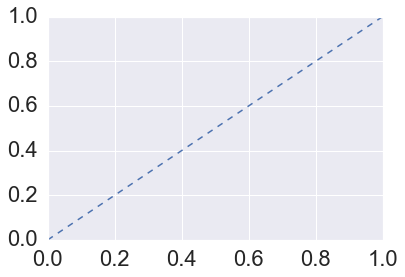

In [278]:
#AUC and ROC for the training data
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

In [279]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9504950495049505
[[988  30]
 [ 30 164]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1018
           1       0.85      0.85      0.85       194

    accuracy                           0.95      1212
   macro avg       0.91      0.91      0.91      1212
weighted avg       0.95      0.95      0.95      1212



In [280]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_test_acc= accuracy_score(y_test, y_test_predict)
xgb_test_precision=round(df.loc["1"][0],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_f1=round(df.loc["1"][2],2)
print ('xgb_test_acc ',xgb_test_acc)
print ('xgb_test_precision ',xgb_test_precision)
print ('xgb_test_recall ',xgb_test_recall)
print ('xgb_test_f1 ',xgb_test_f1)

xgb_test_acc  0.9504950495049505
xgb_test_precision  0.85
xgb_test_recall  0.85
xgb_test_f1  0.85


AUC: 0.973


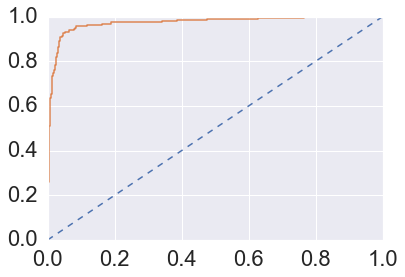

In [281]:
# AUC and ROC for the test data
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

In [282]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':XGB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
6                      Complain    0.118169
0                        Tenure    0.086184
19                       Mobile    0.083397
18           Laptop & Accessory    0.058339
22                       Single    0.057078
10            DaySinceLastOrder    0.056153
8                    CouponUsed    0.055911
21                      Married    0.052384
3      NumberOfDeviceRegistered    0.049875
25                       Tier 3    0.042574
5               NumberOfAddress    0.041813
24                       Tier 2    0.037078
23                         Male    0.035408
4             SatisfactionScore    0.033767
14                   Debit Card    0.031632
2                HourSpendOnApp    0.024303
16                          UPI    0.021980
1               WarehouseToHome    0.020507
9                    OrderCount    0.019482
15                     E wallet    0.018029
7   OrderAmountHikeFromlastYear    0.015824
11               CashbackAmount    0.015490
12                 Mobile Phone    0.013441
13                          COD    0.011182
17                      Grocery    0.000000
20                       Others    0.000000

In [283]:
eli5.explain_weights(XGB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Complain', weight=0.11816932, std=None, value=None), FeatureWeight(feature='Tenure', weight=0.08618403, std=None, value=None), FeatureWeight(feature='Mobile', weight=0.08339667, std=None, value=None), FeatureWeight(feature='Laptop & Accessory', weight=0.05833948, std=None, value=None), FeatureWeight(feature='Single', weight=0.05707773, std=None, value=None), FeatureWeight(feature='DaySinceLastOrder', weight=0.05615261, std=None, value=None), FeatureWeight(feature='CouponUsed', weight=0.05591112, std=None, value=None), FeatureWeight(feature='Married', weight=0.052384432, std=None, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.049875222, std=None, value=None), FeatureWeight(feature='Tier 3', weight=0.04257418, std=None, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.04181264, std=None, value=None), FeatureWeight(feature='Tier 2', weight=0.037078, std=None, value=None), FeatureWeight(feature='Male', weight=0.0354079, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.033767205, std=None, value=None), FeatureWeight(feature='Debit Card', weight=0.03163152, std=None, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.02430318, std=None, value=None), FeatureWeight(feature='UPI', weight=0.021980366, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.02050694, std=None, value=None), FeatureWeight(feature='OrderCount', weight=0.019481609, std=None, value=None), FeatureWeight(feature='E wallet', weight=0.018029423, std=None, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [284]:
eli5.explain_prediction(XGB_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Tenure', weight=2.2074307426498323, std=None, value=1.6371841817098796), FeatureWeight(feature='Complain', weight=0.6193273694116899, std=None, value=-0.7728597247494505), FeatureWeight(feature='Male', weight=0.555132716064584, std=None, value=-1.320154909099304), FeatureWeight(feature='OrderCount', weight=0.44782525827055436, std=None, value=-0.8937940163215503), FeatureWeight(feature='HourSpendOnApp', weight=0.25592302808357353, std=None, value=-1.4312166811683293), FeatureWeight(feature='Laptop & Accessory', weight=0.20933221385309742, std=None, value=1.1802240403289563), FeatureWeight(feature='Debit Card', weight=0.20888424220863716, std=None, value=1.3186225819145891), FeatureWeight(feature='SatisfactionScore', weight=0.11860424092026473, std=None, value=-0.1501043744598836), FeatureWeight(feature='CashbackAmount', weight=0.09883333429059454, std=None, value=-0.46446920350739596), FeatureWeight(feature='E wallet', weight=0.09226865264025258, std=None, value=-0.4021381074341274), FeatureWeight(feature='UPI', weight=0.0869268531912514, std=None, value=-0.31521703153123837), FeatureWeight(feature='COD', weight=0.0628782309709768, std=None, value=-0.3317983491997608), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.025578752168957795, std=None, value=-0.9948868537502756), FeatureWeight(feature='WarehouseToHome', weight=0.009085439383201343, std=None, value=1.2338823878621812)], neg=[FeatureWeight(feature='DaySinceLastOrder', weight=-0.3891867028023386, std=None, value=-0.9345736779195675), FeatureWeight(feature='Tier 3', weight=-0.32669649349137014, std=None, value=1.3708210242145482), FeatureWeight(feature='Single', weight=-0.214344801974782, std=None, value=1.2372738175880464), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=-0.1786747501682045, std=None, value=-0.16468850204967214), FeatureWeight(feature='CouponUsed', weight=-0.04856368460532014, std=None, value=-1.3550164872487735), FeatureWeight(feature='Married', weight=-0.04785832929466297, std=None, value=-0.9522675258212505), FeatureWeight(feature='NumberOfAddress', weight=-0.041138188882531374, std=

In [285]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGBoost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGBoost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

XGBoost Train  XGBoost Test
Accuracy             1.0          0.95
AUC                  1.0          0.97
Recall               1.0          0.85
Precision            1.0          0.85
F1 Score             1.0          0.85

### Comparisson of basic models

In [286]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1],             
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.79     0.78       1.0     0.90       1.0     0.96       0.79   
AUC            0.87     0.85       1.0     0.87       1.0     0.98       0.87   
Recall         0.80     0.77       1.0     0.82       1.0     0.84       0.80   
Precision      0.79     0.40       1.0     0.66       1.0     0.91       0.78   
F1 Score       0.79     0.53       1.0     0.73       1.0     0.87       0.79   

           LDA Test  KNN Train  KNN Test  ...  SVM Train  SVM Test  ANN Train  \
Accuracy       0.77       0.95      0.86  ...       0.96      0.90       0.77   
AUC            0.85       1.00      0.95  ...       0.99      0.95       0.85   
Recall         0.79       1.00      0.91  ...       0.98      0.87       0.77   
Precision      0.40       0.92      0.53  ...       0.94      0.64       0.77   
F1 Score       0.53       0.96      0.67  ...       0.96      0.74       0.77   

           ANN Test  Bag Train  Bag Test  ADB Train  ADB Test  XGB Train  \
Accuracy       0.75        1.0      0.95       0.89      0.86        1.0   
AUC            0.81        1.0      0.97       0.96      0.87        1.0   
Recall         0.73        1.0      0.80       0.89      0.70        1.0   
Precision      0.36        1.0      0.89       0.89      0.55        1.0   
F1 Score       0.48        1.0      0.84       0.89      0.62        1.0   

           XGB Test  
Accuracy       0.95  
AUC            0.97  
Recall         0.85  
Precision      0.85  
F1 Score       0.85  

[5 rows x 22 columns]

In [287]:
data.to_excel('basic_model_comparisson.xlsx',index=False)

### ROC Curve for all the basic models on the Training data

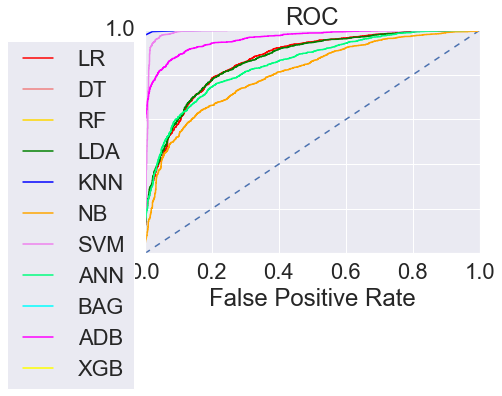

In [288]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(dt_train_fpr, dt_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_train_fpr, rf_train_tpr,color='gold',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='orange',label="NB")
plt.plot(svm_train_fpr,svm_train_tpr,color='violet',label="SVM")
plt.plot(ann_train_fpr,ann_train_tpr,color='springgreen',label="ANN")
plt.plot(bag_train_fpr,bag_train_tpr,color='cyan',label="BAG")
plt.plot(adb_train_fpr,adb_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the basic models on the Test data

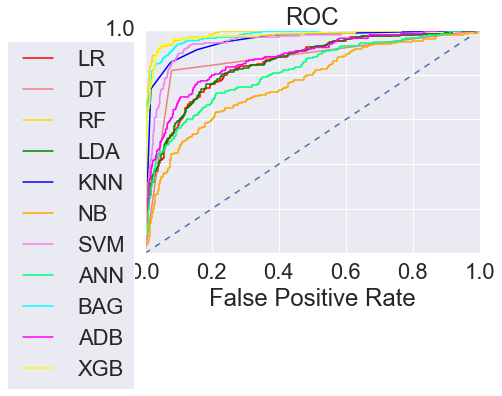

In [289]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(dt_test_fpr, dt_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_test_fpr, rf_test_tpr,color='gold',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='orange',label="NB")
plt.plot(svm_test_fpr,svm_test_tpr,color='violet',label="SVM")
plt.plot(ann_test_fpr,ann_test_tpr,color='springgreen',label="ANN")
plt.plot(bag_test_fpr,bag_test_tpr,color='cyan',label="BAG")
plt.plot(adb_test_fpr,adb_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Model Tuninig

In [293]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Logistic Regression

In [791]:
X_train_fs = X_train[['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'COD',
       'Debit Card', 'E wallet', 'UPI', 'Grocery', 'Laptop & Accessory',
       'Mobile', 'Others', 'Married', 'Single', 'Male', 'Tier 2', 'Tier 3']]

X_test_fs = X_test[['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'COD',
       'Debit Card', 'E wallet', 'UPI', 'Grocery', 'Laptop & Accessory',
       'Mobile', 'Others', 'Married', 'Single', 'Male', 'Tier 2', 'Tier 3']]

In [792]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression(random_state = 1)

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2","l1"],
              "tol" : [0.001,0.01,0.001],
              "max_iter": [3,4,5],
              "C" :[1,2,5],
              "intercept_scaling": [2,3,4],
              "solver":['liblinear']}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [793]:
# Fit the Logistic Regression model
#lr_model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=1)
#model = LogisticRegression()
gsLRM.fit(X_train_fs, y_train)
lr_model_tun = gsLRM.best_estimator_
lr_model_tun

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 102 tasks      | elapsed:    1.0s
[Parallel(n_jobs=7)]: Done 702 tasks      | elapsed:    5.7s
[Parallel(n_jobs=7)]: Done 810 out of 810 | elapsed:    6.4s finished


LogisticRegression(C=1, intercept_scaling=3, max_iter=4, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.001)

In [794]:
## Performance Matrix on train data set
y_train_predict = lr_model_tun.predict(X_train_fs)
model_score = lr_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7902037277850021
[[1798  509]
 [ 459 1848]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2307
           1       0.78      0.80      0.79      2307

    accuracy                           0.79      4614
   macro avg       0.79      0.79      0.79      4614
weighted avg       0.79      0.79      0.79      4614



In [795]:
lr_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lr_tuned_train_precision=round(df.loc["1"][0],2)
lr_tuned_train_recall=round(df.loc["1"][1],2)
lr_tuned_train_f1=round(df.loc["1"][2],2)
print ('lr_tuned_train_acc ',lr_tuned_train_acc)
print ('lr_tuned_train_precision ',lr_tuned_train_precision)
print ('lr_tuned_train_recall ',lr_tuned_train_recall)
print ('lr_tuned_train_f1 ',lr_tuned_train_f1)

lr_tuned_train_acc  0.7902037277850021
lr_tuned_train_precision  0.78
lr_tuned_train_recall  0.8
lr_tuned_train_f1  0.79


AUC: 0.866


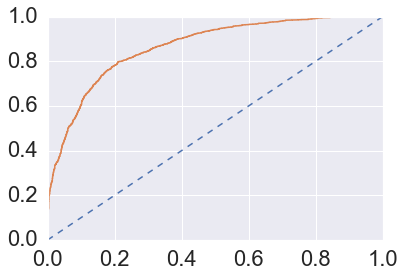

In [796]:
#AUC and ROC for the training data
# predict probabilities
probs = lr_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_tun_train_auc)
# calculate roc curve
lr_tun_train_fpr, lr_tun_train_tpr, lr_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr)

In [797]:
## Performance Matrix on test data set
y_test_predict = lr_model_tun.predict(X_test_fs)
model_score = lr_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7797029702970297
[[794 224]
 [ 43 151]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1018
           1       0.40      0.78      0.53       194

    accuracy                           0.78      1212
   macro avg       0.68      0.78      0.69      1212
weighted avg       0.86      0.78      0.80      1212



In [798]:
lr_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lr_tuned_test_precision=round(df.loc["1"][0],2)
lr_tuned_test_recall=round(df.loc["1"][1],2)
lr_tuned_test_f1=round(df.loc["1"][2],2)
print ('lr_tuned_test_acc ',lr_tuned_test_acc)
print ('lr_tuned_test_precision ',lr_tuned_test_precision)
print ('lr_tuned_test_recall ',lr_tuned_test_recall)
print ('lr_tuned_test_f1 ',lr_tuned_test_f1)

lr_tuned_test_acc  0.7797029702970297
lr_tuned_test_precision  0.4
lr_tuned_test_recall  0.78
lr_tuned_test_f1  0.53


AUC: 0.849


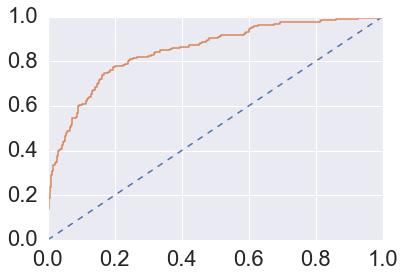

In [799]:
# AUC and ROC for the test data
# predict probabilities
probs = lr_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_tun_test_auc)
# calculate roc curve
lr_tun_test_fpr, lr_tun_test_tpr, lr_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr)

In [800]:
pd.DataFrame(zip(X_train_fs.columns, np.transpose(lr_model_tun.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
6                      Complain  0.712470
4             SatisfactionScore  0.477533
5               NumberOfAddress  0.476413
9                    OrderCount  0.408307
22                       Single  0.340903
25                       Tier 3  0.335907
3      NumberOfDeviceRegistered  0.332085
1               WarehouseToHome  0.293786
23                         Male  0.222404
15                     E wallet  0.144003
24                       Tier 2  0.131003
20                       Others  0.079669
13                          COD  0.045758
16                          UPI -0.030820
14                   Debit Card -0.049716
7   OrderAmountHikeFromlastYear -0.080550
17                      Grocery -0.087931
21                      Married -0.154309
12                 Mobile Phone -0.155184
2                HourSpendOnApp -0.174679
8                    CouponUsed -0.217141
11               CashbackAmount -0.374182
19                       Mobile -0.383483
10            DaySinceLastOrder -0.471084
18           Laptop & Accessory -0.749355
0                        Tenure -0.866464

In [801]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.79     0.78
AUC            0.87     0.85
Recall         0.80     0.78
Precision      0.78     0.40
F1 Score       0.79     0.53

In [788]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lr_model_tun).fit(X_train_fs, y_train)

In [789]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

4

In [790]:
print(selected_feat)

Index(['Tenure', 'Complain', 'Laptop & Accessory', 'Mobile'], dtype='object')


### Cross Validation

In [478]:
from sklearn.model_selection import cross_val_score

In [569]:
LR_accuracies = cross_val_score(estimator = lr_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [570]:
print("Mean_XGB_Acc : ", LR_accuracies.mean())

Mean_XGB_Acc :  0.7858516845473369


### Decision Tree

In [947]:
X_train_fs = X_train[['Tenure', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 
       'Mobile']]

X_test_fs = X_test[['Tenure', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 
       'Mobile']]

In [948]:
# Decision Tree Parameters tunning 
dt = DecisionTreeClassifier(random_state = 1)

## Search grid for optimal parameters
dt_param_grid = {'max_depth': [3,4,5],
                 'max_features': [7,8,9],
                 'min_samples_split':[2,3,5],
                 'min_samples_leaf':[2,3,5],
                 'criterion':['gini','entropy']}


gsDT = GridSearchCV(dt, dt_param_grid, scoring="recall", n_jobs= 7, verbose = 1)

In [949]:
gsDT.fit(X_train_fs, y_train)
dt_model_tun = gsDT.best_estimator_
dt_model_tun

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=7)]: Done 810 out of 810 | elapsed:    2.6s finished


DecisionTreeClassifier(max_depth=5, max_features=8, min_samples_leaf=5,
                       random_state=1)

In [950]:
y_train_predict = dt_model_tun.predict(X_train_fs)
model_score = dt_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7921543129605548
[[1803  504]
 [ 455 1852]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2307
           1       0.79      0.80      0.79      2307

    accuracy                           0.79      4614
   macro avg       0.79      0.79      0.79      4614
weighted avg       0.79      0.79      0.79      4614



In [951]:
dt_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_train_acc= accuracy_score(y_train, y_train_predict)
dt_tuned_train_precision=round(df.loc["1"][0],2)
dt_tuned_train_recall=round(df.loc["1"][1],2)
dt_tuned_train_f1=round(df.loc["1"][2],2)
print ('dt_tuned_train_acc ',dt_tuned_train_acc)
print ('dt_tuned_train_precision ',dt_tuned_train_precision)
print ('dt_tuned_train_recall ',dt_tuned_train_recall)
print ('dt_tuned_train_f1 ',dt_tuned_train_f1)

dt_tuned_train_acc  0.7921543129605548
dt_tuned_train_precision  0.79
dt_tuned_train_recall  0.8
dt_tuned_train_f1  0.79


AUC: 0.870


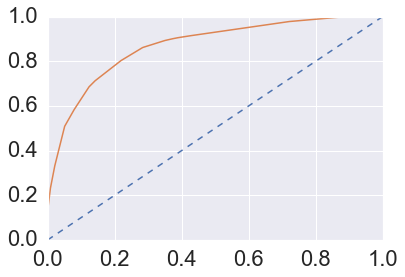

In [952]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_tun_train_auc)
# calculate roc curve
dt_tun_train_fpr, dt_tun_train_tpr, dt_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr)

In [953]:
y_test_predict = dt_model_tun.predict(X_test_fs)
model_score = dt_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.778052805280528
[[795 223]
 [ 46 148]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1018
           1       0.40      0.76      0.52       194

    accuracy                           0.78      1212
   macro avg       0.67      0.77      0.69      1212
weighted avg       0.86      0.78      0.80      1212



In [954]:
dt_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_test_acc= accuracy_score(y_test, y_test_predict)
dt_tuned_test_precision=round(df.loc["1"][0],2)
dt_tuned_test_recall=round(df.loc["1"][1],2)
dt_tuned_test_f1=round(df.loc["1"][2],2)
print ('dt_tuned_test_acc ',dt_tuned_test_acc)
print ('dt_tuned_test_precision ',dt_tuned_test_precision)
print ('dt_tuned_test_recall ',dt_tuned_test_recall)
print ('dt_tuned_test_f1 ',dt_tuned_test_f1)

dt_tuned_test_acc  0.778052805280528
dt_tuned_test_precision  0.4
dt_tuned_test_recall  0.76
dt_tuned_test_f1  0.52


AUC: 0.839


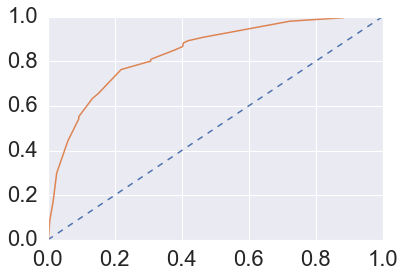

In [955]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_tun_test_auc)
# calculate roc curve
dt_tun_test_fpr, dt_tun_test_tpr, dt_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr)

In [956]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('G:\greatlearning\Capstone_Project\CC_EC_01 - Customer Churn - E-Commerce\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_tun, out_file=Credit_Tree_File, feature_names = list(X_train_fs), class_names = list(train_char_label))

Credit_Tree_File.close()

In [957]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':dt_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0                    Tenure    0.439357
5                  Complain    0.226615
7         DaySinceLastOrder    0.137347
4           NumberOfAddress    0.088684
3         SatisfactionScore    0.041320
6                OrderCount    0.023958
9                    Mobile    0.023586
2  NumberOfDeviceRegistered    0.016157
1            HourSpendOnApp    0.002976
8            CashbackAmount    0.000000

In [958]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy       0.79     0.78
AUC            0.87     0.84
Recall         0.80     0.76
Precision      0.79     0.40
F1 Score       0.79     0.52

### Cross Validation

In [959]:
from sklearn.model_selection import cross_val_score

In [960]:
DT_accuracies = cross_val_score(estimator = dt_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [961]:
print("Mean_XGB_Acc : ", DT_accuracies.mean())

Mean_XGB_Acc :  0.7555768868812347


### Random Forest

In [1797]:
X_train_fs = X_train[['Tenure','Complain','NumberOfDeviceRegistered']]

X_test_fs = X_test[['Tenure','Complain','NumberOfDeviceRegistered']]

In [1798]:
rf = RandomForestClassifier(random_state = 1)

## Search grid for optimal parameters
rf_param_grid = {'n_estimators': [2,3,4],
                 'max_depth':[2,3,4],
                 'max_features':[1,2,3]}


gsRF = GridSearchCV(rf, rf_param_grid, scoring="recall", n_jobs= 7, verbose = 1,cv =5)

In [1799]:
gsRF.fit(X_train_fs, y_train)
rf_model_tun = gsRF.best_estimator_
rf_model_tun

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 135 out of 135 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=4, max_features=1, n_estimators=2,
                       random_state=1)

In [1800]:
## Performance Matrix on train data set
y_train_predict = rf_model_tun.predict(X_train_fs)
model_score = rf_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7405721716514955
[[1494  813]
 [ 384 1923]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.71      2307
           1       0.70      0.83      0.76      2307

    accuracy                           0.74      4614
   macro avg       0.75      0.74      0.74      4614
weighted avg       0.75      0.74      0.74      4614



In [1801]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_train_acc= accuracy_score(y_train, y_train_predict)
rf_tun_train_precision=round(df.loc["1"][0],2)
rf_tun_train_recall=round(df.loc["1"][1],2)
rf_tun_train_f1=round(df.loc["1"][2],2)
print ('rf_tun_train_acc ',rf_tun_train_acc)
print ('rf_tun_train_precision ',rf_tun_train_precision)
print ('rf_tun_train_recall ',rf_tun_train_recall)
print ('rf_tun_train_f1 ',rf_tun_train_f1)

rf_tun_train_acc  0.7405721716514955
rf_tun_train_precision  0.7
rf_tun_train_recall  0.83
rf_tun_train_f1  0.76


AUC: 1.000


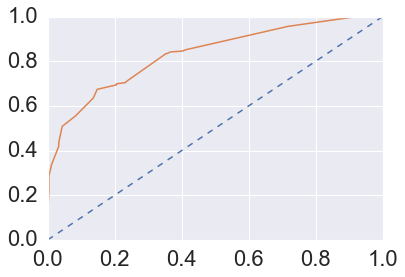

In [1802]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_tun_train_fpr, rf_tun_train_tpr, rf_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr)

In [1803]:
## Performance Matrix on test data set
y_test_predict = rf_model_tun.predict(X_test_fs)
model_score = rf_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.665016501650165
[[648 370]
 [ 36 158]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1018
           1       0.30      0.81      0.44       194

    accuracy                           0.67      1212
   macro avg       0.62      0.73      0.60      1212
weighted avg       0.84      0.67      0.71      1212



In [1804]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_test_acc= accuracy_score(y_test, y_test_predict)
rf_tun_test_precision=round(df.loc["1"][0],2)
rf_tun_test_recall=round(df.loc["1"][1],2)
rf_tun_test_f1=round(df.loc["1"][2],2)
print ('rf_tun_test_acc ',rf_tun_test_acc)
print ('rf_tun_test_precision ',rf_tun_test_precision)
print ('rf_tun_test_recall ',rf_tun_test_recall)
print ('rf_tun_test_f1 ',rf_tun_test_f1)

rf_tun_test_acc  0.665016501650165
rf_tun_test_precision  0.3
rf_tun_test_recall  0.81
rf_tun_test_f1  0.44


AUC: 0.808


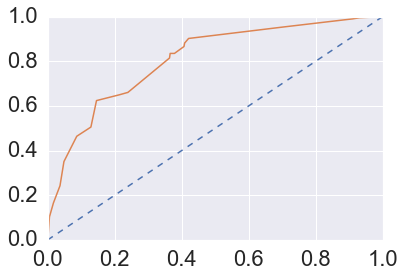

In [1805]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_tun_test_auc)
# calculate roc curve
rf_tun_test_fpr, rf_tun_test_tpr, rf_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr)

In [1806]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':rf_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0                    Tenure    0.509789
1                  Complain    0.366037
2  NumberOfDeviceRegistered    0.124173

In [1807]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy       0.74     0.67
AUC            0.83     0.81
Recall         0.83     0.81
Precision      0.70     0.30
F1 Score       0.76     0.44

### Cross Validation

In [1808]:
from sklearn.model_selection import cross_val_score

In [1809]:
RF_accuracies = cross_val_score(estimator = rf_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [1810]:
print("Mean_RF_Acc : ", RF_accuracies.mean())

Mean_RF_Acc :  0.7772143798230754


#### Linear Discriminant Analysis

In [1892]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'Laptop & Accessory',
       'Married']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'Laptop & Accessory',
       'Married']]

In [1893]:
LDAM = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.1,0.01,0.0001,0.0002,0.0003]
}

gsLDAM = GridSearchCV(LDAM, param_grid = lda_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [1894]:
gsLDAM.fit(X_train_fs, y_train)
lda_model_tun = gsLDAM.best_estimator_
lda_model_tun

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  75 out of  75 | elapsed:    0.2s finished


LinearDiscriminantAnalysis(tol=0.1)

In [1895]:
## Performance Matrix on train data set
y_train_predict = lda_model_tun.predict(X_train_fs)
model_score = lda_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7384048547897702
[[1681  626]
 [ 581 1726]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2307
           1       0.73      0.75      0.74      2307

    accuracy                           0.74      4614
   macro avg       0.74      0.74      0.74      4614
weighted avg       0.74      0.74      0.74      4614



In [1896]:
lda_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lda_tuned_train_precision=round(df.loc["1"][0],2)
lda_tuned_train_recall=round(df.loc["1"][1],2)
lda_tuned_train_f1=round(df.loc["1"][2],2)
print ('lda_tuned_train_acc ',lda_tuned_train_acc)
print ('lda_tuned_train_precision ',lda_tuned_train_precision)
print ('lda_tuned_train_recall ',lda_tuned_train_recall)
print ('lda_tuned_train_f1 ',lda_tuned_train_f1)


lda_tuned_train_acc  0.7384048547897702
lda_tuned_train_precision  0.73
lda_tuned_train_recall  0.75
lda_tuned_train_f1  0.74


AUC: 0.822


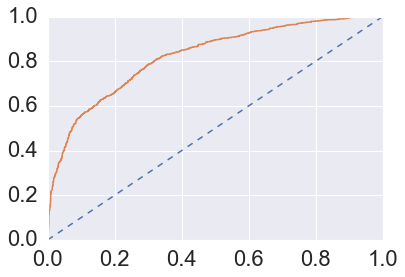

In [1897]:
#AUC and ROC for the training data
# predict probabilities
probs = lda_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tun_train_auc)
# calculate roc curve
lda_tun_train_fpr, lda_tun_train_tpr, lda_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_train_fpr, lda_tun_train_tpr)

In [1898]:
## Performance Matrix on test data set
y_test_predict = lda_model_tun.predict(X_test_fs)
model_score = lda_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.731023102310231
[[741 277]
 [ 49 145]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1018
           1       0.34      0.75      0.47       194

    accuracy                           0.73      1212
   macro avg       0.64      0.74      0.65      1212
weighted avg       0.84      0.73      0.76      1212



In [1899]:
lda_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lda_tuned_test_precision=round(df.loc["1"][0],2)
lda_tuned_test_recall=round(df.loc["1"][1],2)
lda_tuned_test_f1=round(df.loc["1"][2],2)
print ('lda_tuned_test_acc ',lda_tuned_test_acc)
print ('lda_tuned_test_precision ',lda_tuned_test_precision)
print ('lda_tuned_test_recall ',lda_tuned_test_recall)
print ('lda_tuned_test_f1 ',lda_tuned_test_f1)

lda_tuned_test_acc  0.731023102310231
lda_tuned_test_precision  0.34
lda_tuned_test_recall  0.75
lda_tuned_test_f1  0.47


AUC: 0.815


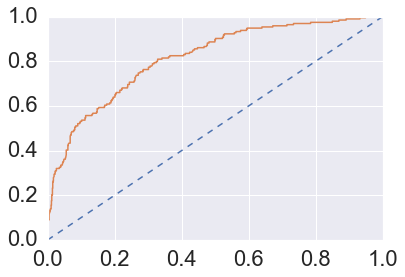

In [1900]:
# AUC and ROC for the test data
# predict probabilities
probs = lda_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tun_test_auc)
# calculate roc curve
lda_tun_test_fpr, lda_tun_test_tpr, lda_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_test_fpr, lda_tun_test_tpr)

In [1901]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lda_model_tun).fit(X_train_fs, y_train)

In [1902]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

2

In [1903]:
print(selected_feat)

Index(['Tenure', 'Complain'], dtype='object')


In [1904]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.74      0.73
AUC             0.82      0.81
Recall          0.75      0.75
Precision       0.73      0.34
F1 Score        0.74      0.47

### Cross Validation

In [1905]:
from sklearn.model_selection import cross_val_score

In [1906]:
LDA_accuracies = cross_val_score(estimator = lda_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [1907]:
print("Mean_LDA_Acc : ", LDA_accuracies.mean())

Mean_LDA_Acc :  0.745544889892716


#### KNN Model

In [2009]:
X_train_fs = X_train[['Tenure','Complain','SatisfactionScore','NumberOfDeviceRegistered']]

X_test_fs = X_test[['Tenure','Complain','SatisfactionScore','NumberOfDeviceRegistered']]

In [2010]:
KNNM = KNeighborsClassifier()

knn_param_grid = {
'n_neighbors': [5,6,7],
'leaf_size' : [1,2,3] ,
'p' : [1,2]
}

gsKNNM = GridSearchCV(KNNM, param_grid = knn_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [2011]:
gsKNNM.fit(X_train_fs, y_train)
knn_model_tun = gsKNNM.best_estimator_
knn_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    1.1s finished


KNeighborsClassifier(leaf_size=2)

In [2012]:
## Performance Matrix on train data set
y_train_predict = knn_model_tun.predict(X_train_fs)
model_score = knn_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8684438664932813
[[2028  279]
 [ 328 1979]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2307
           1       0.88      0.86      0.87      2307

    accuracy                           0.87      4614
   macro avg       0.87      0.87      0.87      4614
weighted avg       0.87      0.87      0.87      4614



In [2013]:
knn_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_train_acc= accuracy_score(y_train, y_train_predict)
knn_tun_train_precision=round(df.loc["1"][0],2)
knn_tun_train_recall=round(df.loc["1"][1],2)
knn_tun_train_f1=round(df.loc["1"][2],2)
print ('knn_tun_train_acc ',knn_tun_train_acc)
print ('knn_tun_train_precision ',knn_tun_train_precision)
print ('knn_tun_train_recall ',knn_tun_train_recall)
print ('knn_tun_train_f1 ',knn_tun_train_f1)

knn_tun_train_acc  0.8684438664932813
knn_tun_train_precision  0.88
knn_tun_train_recall  0.86
knn_tun_train_f1  0.87


AUC: 0.940


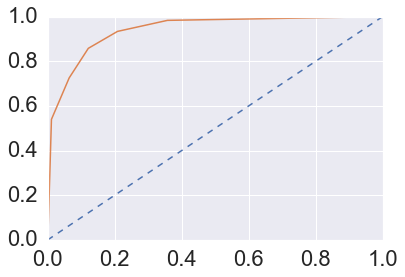

In [2014]:
#AUC and ROC for the training data
# predict probabilities
probs = knn_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_tun_train_auc)
# calculate roc curve
knn_tun_train_fpr, knn_tun_train_tpr, knn_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_train_fpr, knn_tun_train_tpr)

In [2015]:
## Performance Matrix on test data set
y_test_predict = knn_model_tun.predict(X_test_fs)
model_score = knn_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8118811881188119
[[851 167]
 [ 61 133]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1018
           1       0.44      0.69      0.54       194

    accuracy                           0.81      1212
   macro avg       0.69      0.76      0.71      1212
weighted avg       0.85      0.81      0.83      1212



In [2348]:
knn_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_test_acc= accuracy_score(y_test, y_test_predict)
knn_tun_test_precision=round(df.loc["1"][0],2)
knn_tun_test_recall=round(df.loc["1"][1],2)
knn_tun_test_f1=round(df.loc["1"][2],2)
print ('knn_tun_test_acc ',knn_tun_test_acc)
print ('knn_tun_test_precision ',knn_tun_test_precision)
print ('knn_tun_test_recall ',knn_tun_test_recall)
print ('knn_tun_test_f1 ',knn_tun_test_f1)

knn_tun_test_acc  0.8325082508250825
knn_tun_test_precision  0.49
knn_tun_test_recall  0.77
knn_tun_test_f1  0.59


AUC: 0.805


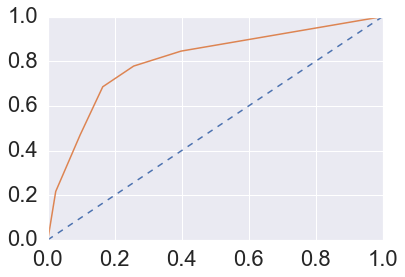

In [2017]:
# AUC and ROC for the test data
# predict probabilities
probs = knn_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_tun_test_auc)
# calculate roc curve
knn_tun_test_fpr, knn_tun_test_tpr, knn_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_test_fpr, knn_tun_test_tpr)

In [2018]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.87      0.81
AUC             0.94      0.80
Recall          0.86      0.69
Precision       0.88      0.44
F1 Score        0.87      0.54

### Cross Validation

In [2019]:
from sklearn.model_selection import cross_val_score

In [2020]:
KNN_accuracies = cross_val_score(estimator = knn_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [2021]:
print("Mean_KNN_Acc : ", KNN_accuracies.mean())

Mean_KNN_Acc :  0.7725014116318464


#### Naive Bayes Model

There are no parameters to tune for Naive Bayes

#### SVM 

In [2042]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Single']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Married']]

In [2043]:
SVMM= svm.SVC(random_state=1,probability=True)

svm_param_grid = {
'C': [0.01, 0.1],
'kernel': ['linear'],
'gamma': [0.1,0.01],
'tol' : [0.1,0.01]
}


gsSVMM = GridSearchCV(SVMM, param_grid = svm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [2044]:
gsSVMM.fit(X_train_fs, y_train)
svm_model_tun = gsSVMM.best_estimator_
svm_model_tun

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 out of  40 | elapsed:    8.3s finished


SVC(C=0.01, gamma=0.1, kernel='linear', probability=True, random_state=1,
    tol=0.01)

In [2045]:
## Performance Matrix on train data set
y_train_predict = svm_model_tun.predict(X_train_fs)
model_score = svm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7483745123537061
[[1757  550]
 [ 611 1696]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2307
           1       0.76      0.74      0.75      2307

    accuracy                           0.75      4614
   macro avg       0.75      0.75      0.75      4614
weighted avg       0.75      0.75      0.75      4614



In [2046]:
svm_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_tun_metrics).transpose()
df
svm_tun_train_acc= accuracy_score(y_train, y_train_predict)
svm_tun_train_precision=round(df.loc["1"][0],2)
svm_tun_train_recall=round(df.loc["1"][1],2)
svm_tun_train_f1=round(df.loc["1"][2],2)
print ('svm_tun_train_acc ',svm_tun_train_acc)
print ('svm_tun_train_precision ',svm_tun_train_precision)
print ('svm_tun_train_recall ',svm_tun_train_recall)
print ('svm_tun_train_f1 ',svm_tun_train_f1)

svm_tun_train_acc  0.7483745123537061
svm_tun_train_precision  0.76
svm_tun_train_recall  0.74
svm_tun_train_f1  0.75


AUC: 0.827


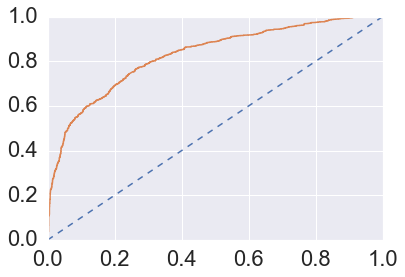

In [2047]:
#AUC and ROC for the training data
# predict probabilities
probs = svm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_tun_train_auc)
# calculate roc curve
svm_tun_train_fpr, svm_tun_train_tpr, svm_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_train_fpr, svm_tun_train_tpr)

In [2048]:
## Performance Matrix on test data set
y_test_predict = svm_model_tun.predict(X_test_fs)
model_score = svm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6996699669966997
[[721 297]
 [ 67 127]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1018
           1       0.30      0.65      0.41       194

    accuracy                           0.70      1212
   macro avg       0.61      0.68      0.60      1212
weighted avg       0.82      0.70      0.74      1212



In [2049]:
svm_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_tuned_metrics).transpose()
df
svm_tun_test_acc= accuracy_score(y_test, y_test_predict)
svm_tun_test_precision=round(df.loc["1"][0],2)
svm_tun_test_recall=round(df.loc["1"][1],2)
svm_tun_test_f1=round(df.loc["1"][2],2)
print ('svm_tun_test_acc ',svm_tun_test_acc)
print ('svm_tun_test_precision ',svm_tun_test_precision)
print ('svm_tun_test_recall ',svm_tun_test_recall)
print ('svm_tun_test_f1 ',svm_tun_test_f1)

svm_tun_test_acc  0.6996699669966997
svm_tun_test_precision  0.3
svm_tun_test_recall  0.65
svm_tun_test_f1  0.41


AUC: 0.748


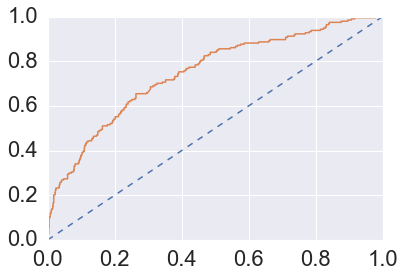

In [2050]:
# AUC and ROC for the test data
# predict probabilities
probs = svm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_tun_test_auc)
# calculate roc curve
svm_tun_test_fpr, svm_tun_test_tpr, svm_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_test_fpr, svm_tun_test_tpr)

In [2352]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1]},index=index
       )
round(data,2)

SVM Train  SVM Test
Accuracy        0.75      0.70
AUC             0.83      0.75
Recall          0.74      0.65
Precision       0.76      0.30
F1 Score        0.75      0.41

### Cross Validation

In [2358]:
from sklearn.model_selection import cross_val_score

In [2359]:
SVM_Tuned_accuracies = cross_val_score(estimator = svm_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [2360]:
print("Mean_SVM_Tuend_Acc : ", SVM_Tuned_accuracies.mean())

Mean_SVM_Tuend_Acc :  0.7520459250894034


### Tuned Neural Network

In [1138]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

In [1139]:
parameters = {'solver': ['lbfgs','sgd'], 
              'max_iter': [500,1000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':[50,100,200],
              'tol': [0.01,0.1]}

gsANNM = GridSearchCV(MLPClassifier(random_state=21), parameters, n_jobs=7,verbose=1)

In [1140]:
gsANNM.fit(X_train_fs, y_train)
ann_model_tun = gsANNM.best_estimator_
ann_model_tun

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=7)]: Done 247 tasks      | elapsed:   15.7s
[Parallel(n_jobs=7)]: Done 497 tasks      | elapsed:   32.4s
[Parallel(n_jobs=7)]: Done 847 tasks      | elapsed:   55.6s
[Parallel(n_jobs=7)]: Done 1080 out of 1080 | elapsed:  1.2min finished


MLPClassifier(alpha=0.1, hidden_layer_sizes=50, max_iter=500, random_state=21,
              solver='lbfgs', tol=0.01)

In [1141]:
## Performance Matrix on train data set
y_train_predict = ann_model_tun.predict(X_train_fs)
model_score = ann_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7516254876462939
[[1768  539]
 [ 607 1700]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2307
           1       0.76      0.74      0.75      2307

    accuracy                           0.75      4614
   macro avg       0.75      0.75      0.75      4614
weighted avg       0.75      0.75      0.75      4614



In [1142]:
ann_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_tun_metrics).transpose()
df
ann_tun_train_acc= accuracy_score(y_train, y_train_predict)
ann_tun_train_precision=round(df.loc["1"][0],2)
ann_tun_train_recall=round(df.loc["1"][1],2)
ann_tun_train_f1=round(df.loc["1"][2],2)
print ('ann_tun_train_acc ',ann_tun_train_acc)
print ('ann_tun_train_precision ',ann_tun_train_precision)
print ('ann_tun_train_recall ',ann_tun_train_recall)
print ('ann_tun_train_f1 ',ann_tun_train_f1)

ann_tun_train_acc  0.7516254876462939
ann_tun_train_precision  0.76
ann_tun_train_recall  0.74
ann_tun_train_f1  0.75


AUC: 0.837


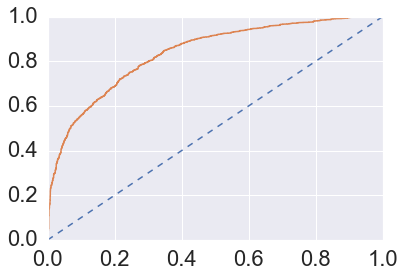

In [1143]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_tun_train_auc)
# calculate roc curve
ann_tun_train_fpr, ann_tun_train_tpr, ann_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_train_fpr, ann_tun_train_tpr)

In [1144]:
## Performance Matrix on test data set
y_test_predict = ann_model_tun.predict(X_test_fs)
model_score = ann_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7516501650165016
[[771 247]
 [ 54 140]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1018
           1       0.36      0.72      0.48       194

    accuracy                           0.75      1212
   macro avg       0.65      0.74      0.66      1212
weighted avg       0.84      0.75      0.78      1212



In [1145]:
ann_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_tuned_metrics).transpose()
df
ann_tun_test_acc= accuracy_score(y_test, y_test_predict)
ann_tun_test_precision=round(df.loc["1"][0],2)
ann_tun_test_recall=round(df.loc["1"][1],2)
ann_tun_test_f1=round(df.loc["1"][2],2)
print ('ann_tun_test_acc ',ann_tun_test_acc)
print ('ann_tun_test_precision ',ann_tun_test_precision)
print ('ann_tun_test_recall ',ann_tun_test_recall)
print ('ann_tun_test_f1 ',ann_tun_test_f1)

ann_tun_test_acc  0.7516501650165016
ann_tun_test_precision  0.36
ann_tun_test_recall  0.72
ann_tun_test_f1  0.48


AUC: 0.823


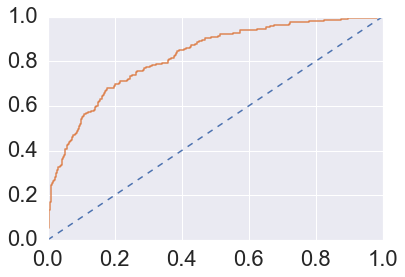

In [1146]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_tun_test_auc)
# calculate roc curve
ann_tun_test_fpr, ann_tun_test_tpr, ann_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_test_fpr, ann_tun_test_tpr)

In [1147]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.75      0.75
AUC             0.84      0.82
Recall          0.74      0.72
Precision       0.76      0.36
F1 Score        0.75      0.48

### Cross Validation

In [1148]:
from sklearn.model_selection import cross_val_score

In [1212]:
ANN_accuracies = cross_val_score(estimator = ann_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [1213]:
print("Mean_ANN_Acc : ", ANN_accuracies.mean())

Mean_ANN_Acc :  0.7355674760022586


### Tuned Bagging and Boosting models

#### Bagging Model

In [1171]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

In [1172]:
# create the classifier
params = {'n_estimators': [10,20,30], 
          'base_estimator__max_leaf_nodes':[25,35], 
          'base_estimator__max_depth':[5,10,15]}

dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='recall', cv=5, n_jobs=7,verbose=1)

In [1173]:
bc_grid.fit(X_train_fs, y_train)
bagging_model_tun = bc_grid.best_estimator_
bagging_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    3.1s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        max_leaf_nodes=35),
                  n_estimators=30, oob_score=True, random_state=1)

In [1174]:
## Performance Matrix on train data set
y_train_predict = bagging_model_tun.predict(X_train_fs)
model_score =bagging_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8636757693974859
[[2024  283]
 [ 346 1961]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2307
           1       0.87      0.85      0.86      2307

    accuracy                           0.86      4614
   macro avg       0.86      0.86      0.86      4614
weighted avg       0.86      0.86      0.86      4614



In [1175]:
bagging_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bagging_tun_metrics).transpose()
df
bag_tun_train_acc= accuracy_score(y_train, y_train_predict)
bag_tun_train_precision=round(df.loc["1"][0],2)
bag_tun_train_recall=round(df.loc["1"][1],2)
bag_tun_train_f1=round(df.loc["1"][2],2)
print ('bag_tun_train_acc ',bag_tun_train_acc)
print ('bag_tun_train_precision ',bag_tun_train_precision)
print ('bag_tun_train_recall ',bag_tun_train_recall)
print ('bag_tun_train_f1 ',bag_tun_train_f1)

bag_tun_train_acc  0.8636757693974859
bag_tun_train_precision  0.87
bag_tun_train_recall  0.85
bag_tun_train_f1  0.86


AUC: 0.939


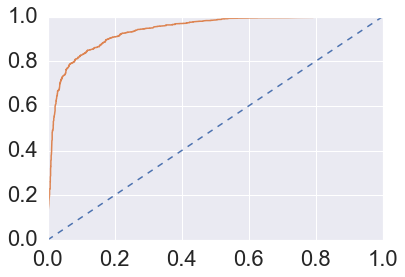

In [1176]:
#AUC and ROC for the training data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_tun_train_auc)
# calculate roc curve
bag_tun_train_fpr, bag_tun_train_tpr, bag_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_train_fpr, bag_tun_train_tpr)

In [1177]:
## Performance Matrix on test data set
y_test_predict = bagging_model_tun.predict(X_test_fs)
model_score = bagging_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8341584158415841
[[864 154]
 [ 47 147]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1018
           1       0.49      0.76      0.59       194

    accuracy                           0.83      1212
   macro avg       0.72      0.80      0.74      1212
weighted avg       0.87      0.83      0.85      1212



In [1178]:
bag_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_tuned_metrics).transpose()
df
bag_tun_test_acc= accuracy_score(y_test, y_test_predict)
bag_tun_test_precision=round(df.loc["1"][0],2)
bag_tun_test_recall=round(df.loc["1"][1],2)
bag_tun_test_f1=round(df.loc["1"][2],2)
print ('bag_tun_test_acc ',bag_tun_test_acc)
print ('bag_tun_test_precision ',bag_tun_test_precision)
print ('bag_tun_test_recall ',bag_tun_test_recall)
print ('bag_tun_test_f1 ',bag_tun_test_f1)

bag_tun_test_acc  0.8341584158415841
bag_tun_test_precision  0.49
bag_tun_test_recall  0.76
bag_tun_test_f1  0.59


AUC: 0.888


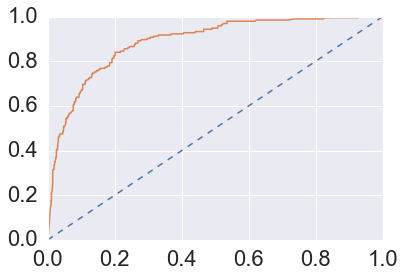

In [1179]:
# AUC and ROC for the test data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_tun_test_auc)
# calculate roc curve
bag_tun_test_fpr, bag_tun_test_tpr, bag_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_test_fpr, bag_tun_test_tpr)

In [1180]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1]},index=index
       )
round(data,2)

Bag Train  Bag Test
Accuracy        0.86      0.83
AUC             0.94      0.89
Recall          0.85      0.76
Precision       0.87      0.49
F1 Score        0.86      0.59

### Cross Validation

In [1181]:
from sklearn.model_selection import cross_val_score

In [1210]:
Bagging_accuracies = cross_val_score(estimator = bagging_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [1211]:
print("Mean_Bagging_Acc : ", Bagging_accuracies.mean())

Mean_Bagging_Acc :  0.8262111801242236


### AdaBoost

In [2202]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain']]

In [2223]:
from sklearn.ensemble import AdaBoostClassifier

ABCM = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),random_state = 1)

abcm_param_grid = {"base_estimator__max_depth" :[5,6,7],
                   "n_estimators" :[2,3],
                   "learning_rate":  [0.02]}

gsABCM = GridSearchCV(ABCM, param_grid = abcm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [2224]:
gsABCM.fit(X_train_fs, y_train)
abcm_model_tun = gsABCM.best_estimator_
abcm_model_tun

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  30 out of  30 | elapsed:    0.2s finished


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=1),
                   learning_rate=0.02, n_estimators=3, random_state=1)

In [2225]:
## Performance Matrix on train data set
y_train_predict = abcm_model_tun.predict(X_train_fs)
model_score = abcm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.846987429562202
[[1962  345]
 [ 361 1946]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2307
           1       0.85      0.84      0.85      2307

    accuracy                           0.85      4614
   macro avg       0.85      0.85      0.85      4614
weighted avg       0.85      0.85      0.85      4614



In [2226]:
adb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_tun_metrics).transpose()
df
adb_tun_train_acc= accuracy_score(y_train, y_train_predict)
adb_tun_train_precision=round(df.loc["1"][0],2)
adb_tun_train_recall=round(df.loc["1"][1],2)
adb_tun_train_f1=round(df.loc["1"][2],2)
print ('adb_tun_train_acc ',adb_tun_train_acc)
print ('adb_tun_train_precision ',adb_tun_train_precision)
print ('adb_tun_train_recall ',adb_tun_train_recall)
print ('adb_tun_train_f1 ',adb_tun_train_f1)

adb_tun_train_acc  0.846987429562202
adb_tun_train_precision  0.85
adb_tun_train_recall  0.84
adb_tun_train_f1  0.85


AUC: 0.926


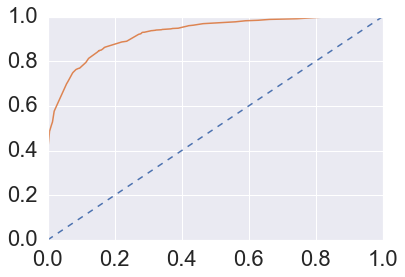

In [2227]:
#AUC and ROC for the training data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_tun_train_auc)
# calculate roc curve
adb_tun_train_fpr, adb_tun_train_tpr, adb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_train_fpr, adb_tun_train_tpr)

In [2228]:
## Performance Matrix on test data set
y_test_predict = abcm_model_tun.predict(X_test_fs)
model_score = abcm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8151815181518152
[[853 165]
 [ 59 135]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1018
           1       0.45      0.70      0.55       194

    accuracy                           0.82      1212
   macro avg       0.69      0.77      0.72      1212
weighted avg       0.86      0.82      0.83      1212



In [2229]:
adb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_tuned_metrics).transpose()
df
adb_tun_test_acc= accuracy_score(y_test, y_test_predict)
adb_tun_test_precision=round(df.loc["1"][0],2)
adb_tun_test_recall=round(df.loc["1"][1],2)
adb_tun_test_f1=round(df.loc["1"][2],2)
print ('adb_tun_test_acc ',adb_tun_test_acc)
print ('adb_tun_test_precision ',adb_tun_test_precision)
print ('adb_tun_test_recall ',adb_tun_test_recall)
print ('adb_tun_test_f1 ',adb_tun_test_f1)

adb_tun_test_acc  0.8151815181518152
adb_tun_test_precision  0.45
adb_tun_test_recall  0.7
adb_tun_test_f1  0.55


AUC: 0.830


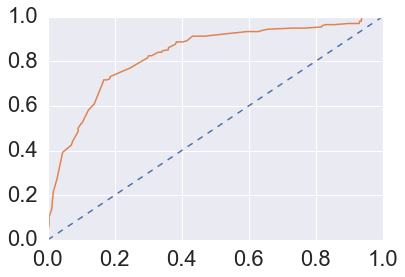

In [2230]:
# AUC and ROC for the test data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_tun_test_auc)
# calculate roc curve
adb_tun_test_fpr, adb_tun_test_tpr, adb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_test_fpr, adb_tun_test_tpr)

In [2231]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':abcm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0                    Tenure    0.447037
3                  Complain    0.238214
1  NumberOfDeviceRegistered    0.170027
2         SatisfactionScore    0.144722

In [2232]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1]},index=index
       )
round(data,2)

ADB Train  ADB Test
Accuracy        0.85      0.82
AUC             0.93      0.83
Recall          0.84      0.70
Precision       0.85      0.45
F1 Score        0.85      0.55

### Cross Validation

In [2233]:
from sklearn.model_selection import cross_val_score

In [2234]:
ADB_accuracies = cross_val_score(estimator = abcm_model_tun, X = X_train_fs, y = y_train, cv = 10, scoring="recall")

In [2235]:
print("Mean_ADB_Acc : ", ADB_accuracies.mean())

Mean_ADB_Acc :  0.8154206662902315


#### XGBoost

In [2300]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain']]

In [2301]:
import xgboost as xgb

XGBM = xgb.XGBClassifier(random_state=1)

xgbm_param_grid = {'n_estimators': [40,50,60],
                    'max_depth': [9,10,11],
                   'learning_rate':[0.1,0.01]}

gsXGBM = GridSearchCV(XGBM, param_grid = xgbm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [2302]:
gsXGBM.fit(X_train_fs, y_train)
xgbm_model_tun = gsXGBM.best_estimator_
xgbm_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.6s
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    3.7s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [2303]:
## Performance Matrix on train data set
y_train_predict = xgbm_model_tun.predict(X_train_fs)
model_score = xgbm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9104898136107499
[[2075  232]
 [ 181 2126]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2307
           1       0.90      0.92      0.91      2307

    accuracy                           0.91      4614
   macro avg       0.91      0.91      0.91      4614
weighted avg       0.91      0.91      0.91      4614



In [2304]:
xgb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_tun_metrics).transpose()
df
xgb_tun_train_acc= accuracy_score(y_train, y_train_predict)
xgb_tun_train_precision=round(df.loc["1"][0],2)
xgb_tun_train_recall=round(df.loc["1"][1],2)
xgb_tun_train_f1=round(df.loc["1"][2],2)
print ('xgb_tun_train_acc ',xgb_tun_train_acc)
print ('xgb_tun_train_precision ',xgb_tun_train_precision)
print ('xgb_tun_train_recall ',xgb_tun_train_recall)
print ('xgb_tun_train_f1 ',xgb_tun_train_f1)

xgb_tun_train_acc  0.9104898136107499
xgb_tun_train_precision  0.9
xgb_tun_train_recall  0.92
xgb_tun_train_f1  0.91


AUC: 0.976


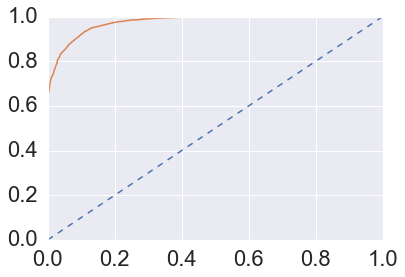

In [2305]:
#AUC and ROC for the training data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_tun_train_auc)
# calculate roc curve
xgb_tun_train_fpr, xgb_tun_train_tpr, xgb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_train_fpr, xgb_tun_train_tpr)

In [2306]:
## Performance Matrix on test data set
y_test_predict = xgbm_model_tun.predict(X_test_fs)
model_score = xgbm_model_tun.score(X_test_fs, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8498349834983498
[[899 119]
 [ 63 131]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1018
           1       0.52      0.68      0.59       194

    accuracy                           0.85      1212
   macro avg       0.73      0.78      0.75      1212
weighted avg       0.87      0.85      0.86      1212



In [2307]:
xgb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_tuned_metrics).transpose()
df
xgb_tun_test_acc= accuracy_score(y_test, y_test_predict)
xgb_tun_test_precision=round(df.loc["1"][0],2)
xgb_tun_test_recall=round(df.loc["1"][1],2)
xgb_tun_test_f1=round(df.loc["1"][2],2)
print ('xgb_tun_test_acc ',xgb_tun_test_acc)
print ('xgb_tun_test_precision ',xgb_tun_test_precision)
print ('xgb_tun_test_recall ',xgb_tun_test_recall)
print ('xgb_tun_test_f1 ',xgb_tun_test_f1)

xgb_tun_test_acc  0.8498349834983498
xgb_tun_test_precision  0.52
xgb_tun_test_recall  0.68
xgb_tun_test_f1  0.59


AUC: 0.858


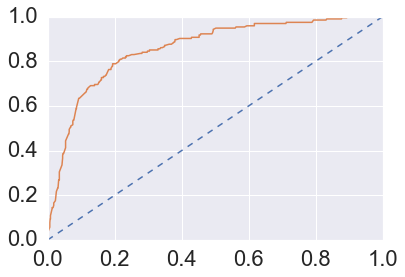

In [2308]:
# AUC and ROC for the test data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_tun_test_auc)
# calculate roc curve
xgb_tun_test_fpr, xgb_tun_test_tpr, xgb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_test_fpr, xgb_tun_test_tpr)

In [2309]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':xgbm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
3                  Complain    0.477008
0                    Tenure    0.215861
1  NumberOfDeviceRegistered    0.174534
2         SatisfactionScore    0.132597

In [2310]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

XGB Train  XGB Test
Accuracy        0.91      0.85
AUC             0.98      0.86
Recall          0.92      0.68
Precision       0.90      0.52
F1 Score        0.91      0.59

In [2311]:
eli5.explain_weights(xgbm_model_tun,feature_names=list(X_train_fs.columns))

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.1, max_delta_step=0, max_depth=11,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Complain', weight=0.47700801, std=None, value=None), FeatureWeight(feature='Tenure', weight=0.2158611, std=None, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.17453381, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.13259709, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [2312]:
eli5.explain_prediction(xgbm_model_tun, X_train_fs.iloc[1], feature_names = list(X_train_fs.columns)) 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.1, max_delta_step=0, max_depth=11,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Tenure', weight=2.0089319815852544, std=None, value=1.6371841817098796), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.6884747079348484, std=None, value=-0.9948868537502756), FeatureWeight(feature='Complain', weight=0.6376995359684456, std=None, value=-0.7728597247494505), FeatureWeight(feature='SatisfactionScore', weight=0.335584987253582, std=None, value=-0.1501043744598836)], neg=[FeatureWeight(feature='<BIAS>', weight=-0.01253546068313108, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9748679, score=-3.6581557520590002, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Cross Validation

In [2313]:
from sklearn.model_selection import cross_val_score

In [2314]:
XGB_accuracies = cross_val_score(estimator = xgbm_model_tun, X = X_train_fs, y = y_train, cv = 10)

In [2315]:
print("Mean_XGB_Acc : ", XGB_accuracies.mean())

Mean_XGB_Acc :  0.8817045571926265


## Comparison of Tuned Models

In [2316]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1],
        'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.79     0.78      0.79     0.78      0.74     0.67       0.74   
AUC            0.87     0.85      0.87     0.84      0.83     0.81       0.82   
Recall         0.80     0.78      0.80     0.76      0.83     0.81       0.75   
Precision      0.78     0.40      0.79     0.40      0.70     0.30       0.73   
F1 Score       0.79     0.53      0.79     0.52      0.76     0.44       0.74   

           LDA Test  KNN Train  KNN Test  SVM Train  SVM Test  Bag Train  \
Accuracy       0.73       0.87      0.81       0.75      0.70       0.86   
AUC            0.81       0.94      0.80       0.83      0.75       0.94   
Recall         0.75       0.86      0.69       0.74      0.65       0.85   
Precision      0.34       0.88      0.44       0.76      0.30       0.87   
F1 Score       0.47       0.87      0.54       0.75      0.41       0.86   

           Bag Test  ADB Train  ADB Test  XGB Train  XGB Test  
Accuracy       0.83       0.85      0.82       0.91      0.85  
AUC            0.89       0.93      0.83       0.98      0.86  
Recall         0.76       0.84      0.70       0.92      0.68  
Precision      0.49       0.85      0.45       0.90      0.52  
F1 Score       0.59       0.85      0.55       0.91      0.59

### ROC Curve for all the tuned models on the Training data

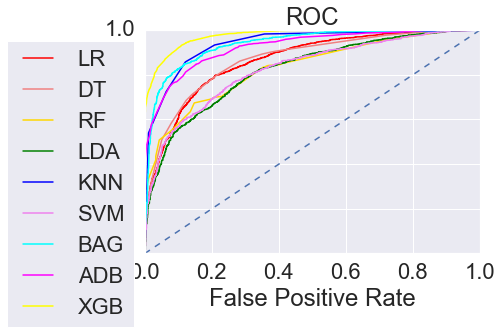

In [2317]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr,color='red',label="LR")
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr,color='gold',label="RF")
plt.plot(lda_tun_train_fpr,lda_tun_train_tpr,color='green',label="LDA")
plt.plot(knn_tun_train_fpr,knn_tun_train_tpr,color='blue',label="KNN")
plt.plot(svm_tun_train_fpr,svm_tun_train_tpr,color='violet',label="SVM")
plt.plot(bag_tun_train_fpr,bag_tun_train_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_train_fpr,adb_tun_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_train_fpr,xgb_tun_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the tuned models on the Test data

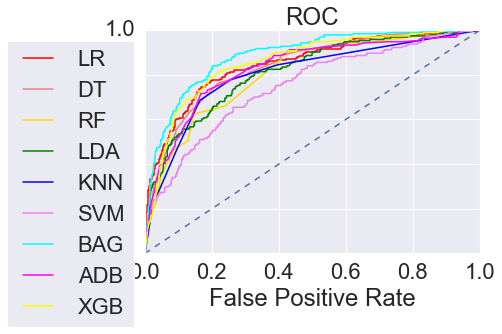

In [2318]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr,color='red',label="LR")
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr,color='gold',label="RF")
plt.plot(lda_tun_test_fpr,lda_tun_test_tpr,color='green',label="LDA")
plt.plot(knn_tun_test_fpr,knn_tun_test_tpr,color='blue',label="KNN")
plt.plot(svm_tun_test_fpr,svm_tun_test_tpr,color='violet',label="SVM")
plt.plot(bag_tun_test_fpr,bag_tun_test_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_test_fpr,adb_tun_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_test_fpr,xgb_tun_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Comparisson between Basic and Tuned Models

In [2363]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LR Tuned Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Tuned Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'DT Tuned Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Tuned Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'RF Tuned Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Tuned Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Tuned Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Tuned Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'KNN Tuned Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Tuned Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'SVM Tuned Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Tuned Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1],
        'ANN Tuned Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Tuned Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1],
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'Bag Tuned Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Tuned Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'ADB Tuned Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Tuned Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'XGB Tuned Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Tuned Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  LR Tuned Train  LR Tuned Test  DT Train  \
Accuracy       0.79     0.78            0.79           0.78       1.0   
AUC            0.87     0.85            0.87           0.85       1.0   
Recall         0.80     0.77            0.80           0.78       1.0   
Precision      0.79     0.40            0.78           0.40       1.0   
F1 Score       0.79     0.53            0.79           0.53       1.0   

           DT Test  DT Tuned Train  DT Tuned Test  RF Train  RF Test  ...  \
Accuracy      0.90            0.79           0.78       1.0     0.96  ...   
AUC           0.87            0.87           0.84       1.0     0.98  ...   
Recall        0.82            0.80           0.76       1.0     0.84  ...   
Precision     0.66            0.79           0.40       1.0     0.91  ...   
F1 Score      0.73            0.79           0.52       1.0     0.87  ...   

           Bag Tuned Train  Bag Tuned Test  ADB Train  ADB Test  \
Accuracy              0.86            0.83       0.89      0.86   
AUC                   0.94            0.89       0.96      0.87   
Recall                0.85            0.76       0.89      0.70   
Precision             0.87            0.49       0.89      0.55   
F1 Score              0.86            0.59       0.89      0.62   

           ADB Tuned Train  ADB Tuned Test  XGB Train  XGB Test  \
Accuracy              0.85            0.82        1.0      0.95   
AUC                   0.93            0.83        1.0      0.97   
Recall                0.84            0.70        1.0      0.85   
Precision             0.85            0.45        1.0      0.85   
F1 Score              0.85            0.55        1.0      0.85   

           XGB Tuned Train  XGB Tuned Test  
Accuracy              0.91            0.85  
AUC                   0.98            0.86  
Recall                0.92            0.68  
Precision             0.90            0.52  
F1 Score              0.91            0.59  

[5 rows x 40 columns]

In [2364]:
data.to_excel('model_comparisson_v4.xlsx',index=False)

### Cross Validation

In [2322]:
index=['Cross Validation Score']
data = pd.DataFrame({'LR Score':[LR_accuracies.mean()],
        'DT Score':[DT_accuracies.mean()],
        'RF Score':[RF_accuracies.mean()],
        'LDA Score':[LDA_accuracies.mean()],
       'KNN Score':[KNN_accuracies.mean()],      
        'SVM Score':[SVM_accuracies.mean()],        
        'Bag Score':[Bagging_accuracies.mean()],        
        'ADB Score':[ADB_accuracies.mean()],        
        'XGB Score':[XGB_accuracies.mean()]},index=index
       )
round(data,2)

LR Score  DT Score  RF Score  LDA Score  KNN Score  \
Cross Validation Score      0.79      0.76      0.78       0.75       0.77   

                        SVM Score  Bag Score  ADB Score  XGB Score  
Cross Validation Score       0.74       0.83       0.82       0.88

### Stacking model from the  6 best fitted model

Since the problem is to find the churned customers, the most mportant metric we should consider is recall for churn. Most of the basic and tuned models were highly overfitted with a huge difference between the train and test recall. I have chosen 6 models which I think were the most optimum without any over or under fitting and tried to build a stacking model from it.

1. LR Tuned model
2. DT Tuned model
3. RF Tuend model
4. LDA model
5. ANN Tuned model
6. Bag Tuned model

In [2323]:
X_train_fs = X_train[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

X_test_fs = X_test[['Tenure','NumberOfDeviceRegistered', 'SatisfactionScore', 
       'Complain','DaySinceLastOrder', 'CashbackAmount', 'Laptop & Accessory',
       'Mobile', 'Married', 'Single']]

In [2324]:
from sklearn.ensemble import StackingClassifier

In [2326]:
# define the base models
level0 = list()
level0.append(('lr', lr_model_tun))
level0.append(('dt', dt_model_tun))
level0.append(('rf', rf_model_tun))
level0.append(('lda', LDA_model))
level0.append(('ann', ann_model_tun))
level0.append(('bag', bagging_model_tun))

In [2327]:
# define meta learner model
level1 = LogisticRegression()

In [2328]:
# define the stacking ensemble
stk_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

In [2329]:
# fit the model on all available data
stk_model.fit(X_train_fs, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=1, intercept_scaling=3,
                                                   max_iter=4, penalty='l1',
                                                   random_state=1,
                                                   solver='liblinear',
                                                   tol=0.001)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features=8,
                                                       min_samples_leaf=5,
                                                       random_state=1)),
                               ('rf',
                                RandomForestClassifier(max_depth=4,
                                                       max_features=1,
                                                       n_estimators=2,
       

In [2330]:
## Performance Matrix on train data set
y_train_predict = stk_model.predict(X_train_fs)
model_score = stk_model.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8680104031209362
[[2014  293]
 [ 316 1991]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2307
           1       0.87      0.86      0.87      2307

    accuracy                           0.87      4614
   macro avg       0.87      0.87      0.87      4614
weighted avg       0.87      0.87      0.87      4614



In [2331]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_train_acc= accuracy_score(y_train, y_train_predict)
stk_train_precision=round(df.loc["1"][0],2)
stk_train_recall=round(df.loc["1"][1],2)
stk_train_f1=round(df.loc["1"][2],2)
print ('stk_train_acc ',stk_train_acc)
print ('stk_train_precision ',stk_train_precision)
print ('stk_train_recall ',stk_train_recall)
print ('stk_train_f1 ',stk_train_f1)

stk_train_acc  0.8680104031209362
stk_train_precision  0.87
stk_train_recall  0.86
stk_train_f1  0.87


AUC: 0.940


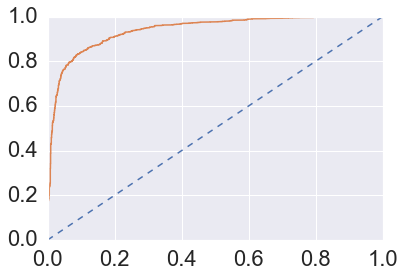

In [2332]:
#AUC and ROC for the training data
# predict probabilities
probs = stk_model.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % stk_train_auc)
# calculate roc curve
stk_train_fpr, stk_train_tpr, stk_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_train_fpr, stk_train_tpr)

In [2333]:
## Performance Matrix on test data set
y_test_predict = stk_model.predict(X_test_fs)
model_score = stk_model.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8325082508250825
[[860 158]
 [ 45 149]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1018
           1       0.49      0.77      0.59       194

    accuracy                           0.83      1212
   macro avg       0.72      0.81      0.74      1212
weighted avg       0.88      0.83      0.85      1212



In [2334]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_test_acc= accuracy_score(y_test, y_test_predict)
stk_test_precision=round(df.loc["1"][0],2)
stk_test_recall=round(df.loc["1"][1],2)
stk_test_f1=round(df.loc["1"][2],2)
print ('stk_test_acc ',stk_test_acc)
print ('stk_test_precision ',stk_test_precision)
print ('stk_test_recall ',stk_test_recall)
print ('stk_test_f1 ',stk_test_f1)

stk_test_acc  0.8325082508250825
stk_test_precision  0.49
stk_test_recall  0.77
stk_test_f1  0.59


AUC: 0.884


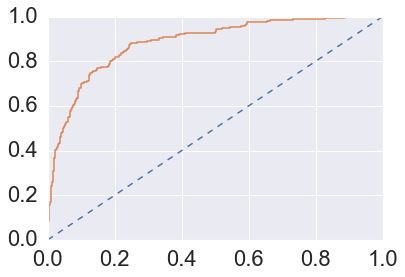

In [2335]:
# AUC and ROC for the test data
# predict probabilities
probs = stk_model.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % stk_test_auc)
# calculate roc curve
stk_test_fpr, stk_test_tpr, stk_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_test_fpr, stk_test_tpr)

In [2336]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Stacking Train':[stk_train_acc,stk_train_auc,stk_train_recall,stk_train_precision,stk_train_f1],
        'Stacking Test':[stk_test_acc,stk_test_auc,stk_test_recall,stk_test_precision,stk_test_f1]},index=index
       )
round(data,2)

Stacking Train  Stacking Test
Accuracy             0.87           0.83
AUC                  0.94           0.88
Recall               0.86           0.77
Precision            0.87           0.49
F1 Score             0.87           0.59

### Cross Validation

In [2337]:
from sklearn.model_selection import cross_val_score

In [2338]:
STK_accuracies = cross_val_score(estimator = stk_model, X = X_train_fs, y = y_train, cv = 10)

In [2339]:
print("Mean_STK_Acc : ", STK_accuracies.mean())

Mean_STK_Acc :  0.8476613047111963


In [2361]:
index=['Cross Validation Score']
data = pd.DataFrame({'LR Score':[LR_accuracies.mean()],
        'DT Score':[DT_accuracies.mean()],
        'RF Score':[RF_accuracies.mean()],
        'LDA Score':[LDA_accuracies.mean()],
       'KNN Score':[KNN_accuracies.mean()],      
        'SVM Score':[SVM_accuracies.mean()], 
        'SVM Tuend Score':[SVM_Tuned_accuracies.mean()],               
        'Bag Score':[Bagging_accuracies.mean()],        
        'STK Score':[STK_accuracies.mean()]},index=index
       )
round(data,2)

LR Score  DT Score  RF Score  LDA Score  KNN Score  \
Cross Validation Score      0.79      0.76      0.78       0.75       0.77   

                        SVM Score  SVM Tuend Score  Bag Score  STK Score  
Cross Validation Score       0.83             0.75       0.83       0.85

##### Conclusion

The objective of this model building activity was to correctly identify the customers who are going to churn. This makes recall for 1 as the main metric and on that basis I think the only model which has performed well on both training and test set is Adaptive Boosting model with 93% recall on Train set and 83% recall on Test set. Accuracy for Train set was 71% and 67% on Test set.